**Problem Statement:**
The consumer finance company, specializing in lending various types of loans to urban customers, faces challenges in making informed decisions regarding loan approvals. The company encounters difficulties due to insufficient or non-existent credit history of applicants, leading to potential defaults. The goal is to use Exploratory data Analysis (EDA) techniques to analyze patterns in loan application data, identifying key factors influencing the likelihood of loan default.

The business objectives include:

1. **Risk Minimization:** Minimize the risk of financial loss by distinguishing applicants capable of repaying loans from those likely to default.

2. **Pattern Identification:** Utilize EDA to identify patterns indicating clients with difficulty paying instalments, enabling strategic actions such as loan denial, reducing loan amounts, or lending at higher interest rates to risky applicants.

3. **Decision Factors:** Understand the driving factors (driver variables) behind loan defaults, serving as strong indicators for risk assessment in the company's portfolio.

4. **Portfolio Enhancement:** Develop knowledge about consumer attributes and loan attributes that significantly influence the tendency to default, aiding in portfolio management and risk assessment.

The successful application of EDA in this scenario will empower the company to make more informed lending decisions, ensuring that deserving consumers are not rejected while effectively managing the risk of potential defaults.

In [ ]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#import the useful libraries.
import pandas as pd, numpy as np
import plotly.express as px
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [ ]:
path1= "/content/drive/MyDrive/Dataset/application_data.csv"
path2= "/content/drive/MyDrive/Dataset/previous_application.csv"

In [ ]:
#read the dataset
ad = pd.read_csv(path1)
pa = pd.read_csv(path2)

In [ ]:
ad.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [ ]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
ad.shape

(307511, 122)

In [ ]:
ad.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [ ]:
# Calculating total number of missing values
missing_values = ad.isnull().sum()
total_entries = ad.shape[0]

# Calculating the percentage of missing values
percentage_missing = (missing_values / total_entries) * 100

# Here we creating a dataframe to display the missing values
missing_info = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Values': missing_values.values,
    'Percentage Missing': percentage_missing.values
})
missing_info

Column  Missing Values  Percentage Missing
0                    SK_ID_CURR               0            0.000000
1                        TARGET               0            0.000000
2            NAME_CONTRACT_TYPE               0            0.000000
3                   CODE_GENDER               0            0.000000
4                  FLAG_OWN_CAR               0            0.000000
..                          ...             ...                 ...
117   AMT_REQ_CREDIT_BUREAU_DAY           41519           13.501631
118  AMT_REQ_CREDIT_BUREAU_WEEK           41519           13.501631
119   AMT_REQ_CREDIT_BUREAU_MON           41519           13.501631
120   AMT_REQ_CREDIT_BUREAU_QRT           41519           13.501631
121  AMT_REQ_CREDIT_BUREAU_YEAR           41519           13.501631

[122 rows x 3 columns]

In [ ]:
#Here I am setting the threshold percentage for missing values
#i.e. We will drop those columns where missing percentage is greater than 40
threshold = 40
missing_percentage = (ad.isnull().sum() / ad.shape[0]) * 100

# Identify columns where the missing value percentage is greater than the threshold
columns_drop = missing_percentage[missing_percentage > threshold].index

# Drop those columns
ad = ad.drop(columns=columns_drop)

In [ ]:
ad.shape

(307511, 73)

In [ ]:
ad.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [ ]:
# Again calculating the total number of missing values and percentage in each column
missing_values = ad.isnull().sum()
total_entries = ad.shape[0]

percentage_missing = (missing_values / total_entries) * 100

missing_info = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Values': missing_values.values,
    'Percentage Missing': percentage_missing.values
})
missing_info

Column  Missing Values  Percentage Missing
0                   SK_ID_CURR               0            0.000000
1                       TARGET               0            0.000000
2           NAME_CONTRACT_TYPE               0            0.000000
3                  CODE_GENDER               0            0.000000
4                 FLAG_OWN_CAR               0            0.000000
..                         ...             ...                 ...
68   AMT_REQ_CREDIT_BUREAU_DAY           41519           13.501631
69  AMT_REQ_CREDIT_BUREAU_WEEK           41519           13.501631
70   AMT_REQ_CREDIT_BUREAU_MON           41519           13.501631
71   AMT_REQ_CREDIT_BUREAU_QRT           41519           13.501631
72  AMT_REQ_CREDIT_BUREAU_YEAR           41519           13.501631

[73 rows x 3 columns]

In [ ]:
# fill the missing values with mean value of AMT ANNUITY in inp1.
# as mean reflects the average value of the column, making it suitable when the values are evenly distributed

ad['AMT_ANNUITY'].fillna(ad['AMT_ANNUITY'].mean(), inplace=True)

In [ ]:
#let's see the null values of AMT ANNUITY
ad.AMT_ANNUITY.isnull().sum()

0

In [ ]:
# fill the missing values with mean of AMT GOODS PRICE
# if the distribution is heavily skewed or has extreme values, the median might be a better choice.
# however, if the ad is relatively normal, the mean provides a more efficient estimate.

ad['AMT_GOODS_PRICE'].fillna(ad['AMT_GOODS_PRICE'].mean(), inplace=True)

In [ ]:
 #let's see the null values of AMT GOODS PRICE
ad.AMT_GOODS_PRICE.isnull().sum()

0

In [ ]:
# fill the missing values with mode
# NAME_TYPE_SUITE is a categorical variable
#the mode represents the most frequent category in the column

ad['NAME_TYPE_SUITE'].fillna('Unknown', inplace=True)

In [ ]:
#let's see the null values of NAME TYPE SUITE
ad.NAME_TYPE_SUITE.isnull().sum()

0

In [ ]:
# fill the missing values with mode in CNT FAM MEMBERS
# mode is suitable for imputing missing values in categorical data.

ad['CNT_FAM_MEMBERS'].fillna(ad['CNT_FAM_MEMBERS'].mode()[0], inplace= True)

In [ ]:
#let's see the null values of CNT FAM MEMBERS
ad.CNT_FAM_MEMBERS.isnull().sum()

0

In [ ]:
ad.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [ ]:
#find the mode of Gender
gender_mode=ad.CODE_GENDER.mode()[0]
gender_mode

'F'

In [ ]:
#let's replace XNA to F as F is the most frequent value
ad['CODE_GENDER'] = ad['CODE_GENDER'].replace('XNA', 'F')

In [ ]:
ad.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [ ]:
ad[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]]

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0            -9461           -637            -3648.0            -2120   
1           -16765          -1188            -1186.0             -291   
2           -19046           -225            -4260.0            -2531   
3           -19005          -3039            -9833.0            -2437   
4           -19932          -3038            -4311.0            -3458   
...            ...            ...                ...              ...   
307506       -9327           -236            -8456.0            -1982   
307507      -20775         365243            -4388.0            -4090   
307508      -14966          -7921            -6737.0            -5150   
307509      -11961          -4786            -2562.0             -931   
307510      -16856          -1262            -5128.0             -410   

        DAYS_LAST_PHONE_CHANGE  
0                      -1134.0  
1                       -828.0  
2                       -815.0  
3                       -617.0  
4                      -1106.0  
...                        ...  
307506                  -273.0  
307507                     0.0  
307508                 -1909.0  
307509                  -322.0  
307510                  -787.0  

[307511 rows x 5 columns]

In [ ]:
#there are negative values in those columns
#as DAYS can't be negative, this is invalid
#let's fix it

ad['DAYS_BIRTH'] = abs(ad['DAYS_BIRTH'])
ad['DAYS_EMPLOYED'] = abs(ad['DAYS_EMPLOYED'])
ad['DAYS_REGISTRATION'] = abs(ad['DAYS_REGISTRATION'])
ad['DAYS_ID_PUBLISH'] = abs(ad['DAYS_ID_PUBLISH'])
ad['DAYS_LAST_PHONE_CHANGE'] = abs(ad['DAYS_LAST_PHONE_CHANGE'])

In [ ]:
#let’s check it
ad[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]]

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0             9461            637             3648.0             2120   
1            16765           1188             1186.0              291   
2            19046            225             4260.0             2531   
3            19005           3039             9833.0             2437   
4            19932           3038             4311.0             3458   
...            ...            ...                ...              ...   
307506        9327            236             8456.0             1982   
307507       20775         365243             4388.0             4090   
307508       14966           7921             6737.0             5150   
307509       11961           4786             2562.0              931   
307510       16856           1262             5128.0              410   

        DAYS_LAST_PHONE_CHANGE  
0                       1134.0  
1                        828.0  
2                        815.0  
3                        617.0  
4                       1106.0  
...                        ...  
307506                   273.0  
307507                     0.0  
307508                  1909.0  
307509                   322.0  
307510                   787.0  

[307511 rows x 5 columns]

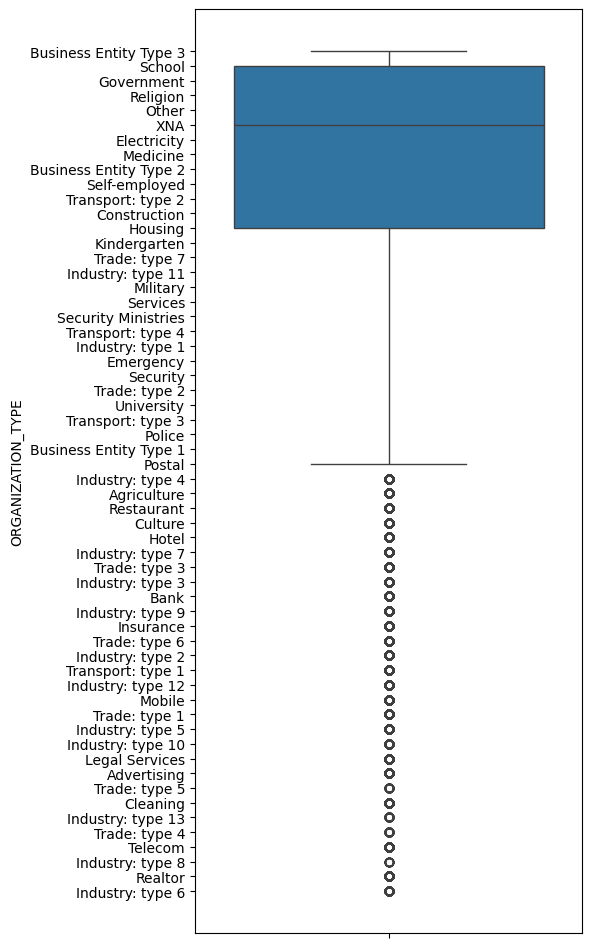

In [ ]:
#outliers
#create a box plot for ORGANIZATION TYPE variable
plt.figure(figsize=[5,12])
sns.boxplot( ad.ORGANIZATION_TYPE)
plt.show()

In [ ]:
ad.ORGANIZATION_TYPE.value_counts().head()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Name: ORGANIZATION_TYPE, dtype: int64

In [ ]:
ad.NAME_INCOME_TYPE.value_counts().head()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Name: NAME_INCOME_TYPE, dtype: int64

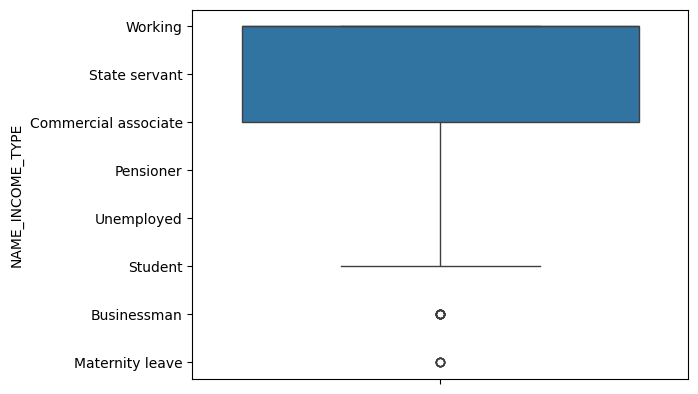

In [ ]:
#create a box plot for NAME_INCOME_TYPE variable
sns.boxplot(ad.NAME_INCOME_TYPE)
plt.show()

In [ ]:
ad[['ORGANIZATION_TYPE','NAME_INCOME_TYPE']].head(30)

ORGANIZATION_TYPE      NAME_INCOME_TYPE
0   Business Entity Type 3               Working
1                   School         State servant
2               Government               Working
3   Business Entity Type 3               Working
4                 Religion               Working
5                    Other         State servant
6   Business Entity Type 3  Commercial associate
7                    Other         State servant
8                      XNA             Pensioner
9              Electricity               Working
10                Medicine               Working
11                     XNA             Pensioner
12  Business Entity Type 2               Working
13           Self-employed               Working
14       Transport: type 2               Working
15  Business Entity Type 2               Working
16              Government               Working
17            Construction               Working
18                 Housing               Working
19            Kindergarten         State servant
20           Self-employed               Working
21           Trade: type 7  Commercial associate
22           Self-employed               Working
23                     XNA             Pensioner
24  Business Entity Type 3               Working
25  Business Entity Type 3               Working
26  Business Entity Type 3               Working
27       Industry: type 11               Working
28                Military         State servant
29  Business Entity Type 3               Working

In [ ]:
ad['ORGANIZATION_TYPE'] = ad['ORGANIZATION_TYPE'].replace('XNA', 'Pensioner')
ad['OCCUPATION_TYPE'].fillna('Pensioner' , inplace = True)

In [ ]:
ad[['ORGANIZATION_TYPE','NAME_INCOME_TYPE','OCCUPATION_TYPE']].head(30)

ORGANIZATION_TYPE      NAME_INCOME_TYPE OCCUPATION_TYPE
0   Business Entity Type 3               Working        Laborers
1                   School         State servant      Core staff
2               Government               Working        Laborers
3   Business Entity Type 3               Working        Laborers
4                 Religion               Working      Core staff
5                    Other         State servant        Laborers
6   Business Entity Type 3  Commercial associate     Accountants
7                    Other         State servant        Managers
8                Pensioner             Pensioner       Pensioner
9              Electricity               Working        Laborers
10                Medicine               Working      Core staff
11               Pensioner             Pensioner       Pensioner
12  Business Entity Type 2               Working        Laborers
13           Self-employed               Working         Drivers
14       Transport: type 2               Working        Laborers
15  Business Entity Type 2               Working        Laborers
16              Government               Working         Drivers
17            Construction               Working        Laborers
18                 Housing               Working        Laborers
19            Kindergarten         State servant      Core staff
20           Self-employed               Working        Laborers
21           Trade: type 7  Commercial associate     Sales staff
22           Self-employed               Working     Sales staff
23               Pensioner             Pensioner       Pensioner
24  Business Entity Type 3               Working         Drivers
25  Business Entity Type 3               Working  Cleaning staff
26  Business Entity Type 3               Working   Cooking staff
27       Industry: type 11               Working        Laborers
28                Military         State servant       Pensioner
29  Business Entity Type 3               Working        Laborers

In [ ]:
ad.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 73 columns]

In [ ]:
#check data type
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [ ]:
#let's change the data type
ad['NAME_CONTRACT_TYPE'] = ad['NAME_CONTRACT_TYPE'].astype('category')
ad['NAME_EDUCATION_TYPE'] = ad['NAME_EDUCATION_TYPE'].astype('category')
ad['NAME_FAMILY_STATUS'] = ad['NAME_FAMILY_STATUS'].astype('category')
ad['NAME_HOUSING_TYPE'] = ad['NAME_HOUSING_TYPE'].astype('category')
ad['CODE_GENDER'] = ad['CODE_GENDER'].astype('category')
ad['NAME_TYPE_SUITE'] = ad['NAME_TYPE_SUITE'].astype('category')
ad['NAME_INCOME_TYPE'] = ad['NAME_INCOME_TYPE'].astype('category')
ad['NAME_EDUCATION_TYPE'] = ad['NAME_EDUCATION_TYPE'].astype('category')
ad['NAME_FAMILY_STATUS'] = ad['NAME_FAMILY_STATUS'].astype('category')
ad['NAME_HOUSING_TYPE'] = ad['NAME_HOUSING_TYPE'].astype('category')
ad['OCCUPATION_TYPE'] = ad['OCCUPATION_TYPE'].astype('category')
ad['ORGANIZATION_TYPE'] = ad['ORGANIZATION_TYPE'].astype('category')

In [ ]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

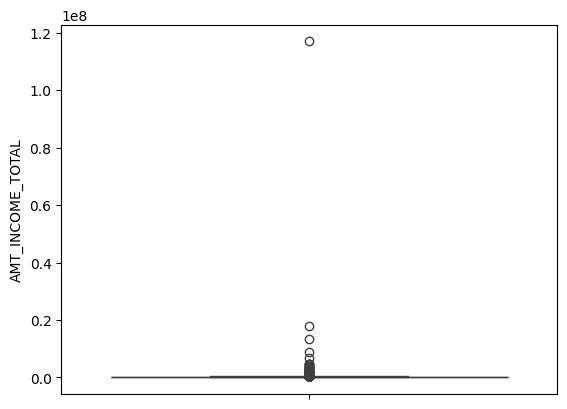

In [ ]:
#boxplot for AMT_INCOME_TOTAL
sns.boxplot( ad.AMT_INCOME_TOTAL )
plt.show()

Here IQR is very flat and there are lots of outliers

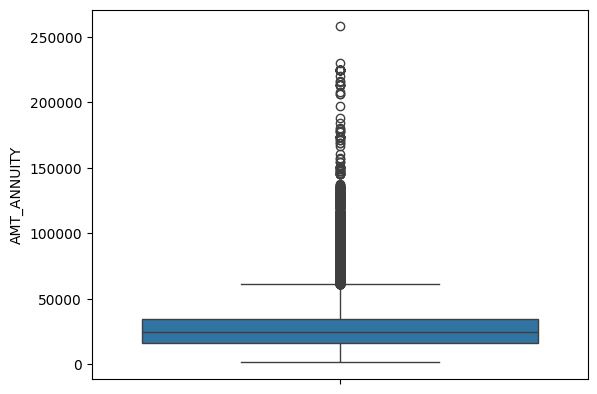

In [ ]:
#boxplot for AMT_ANNUITY
sns.boxplot(ad.AMT_ANNUITY)
plt.show()

Large number of outliers present and the third quartile is larger than the first quartile

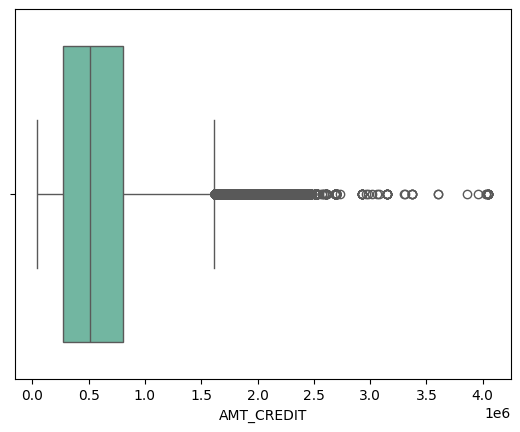

In [ ]:
#boxplot for AMT_CREDIT
sns.boxplot(x='AMT_CREDIT', data=ad, palette='Set2')
plt.show()

 Third quartile is larger than the first quartile and there are large number of outliers present in AMT_CREDIT.

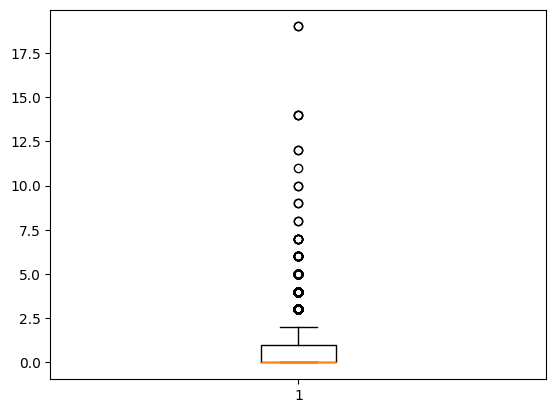

In [ ]:
#boxplot for CNT_CHILDREN
plt.boxplot(ad.CNT_CHILDREN)
plt.show()

CNT_CHILDREN have outlier values having children more than 5.

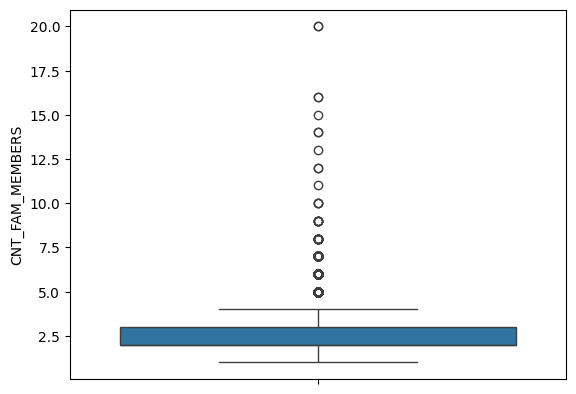

In [ ]:
#boxplot for CNT_FAM_MEMBERS
sns.boxplot(ad.CNT_FAM_MEMBERS)
plt.show()

Most of the clients have 4 family members and there are some outliers present.

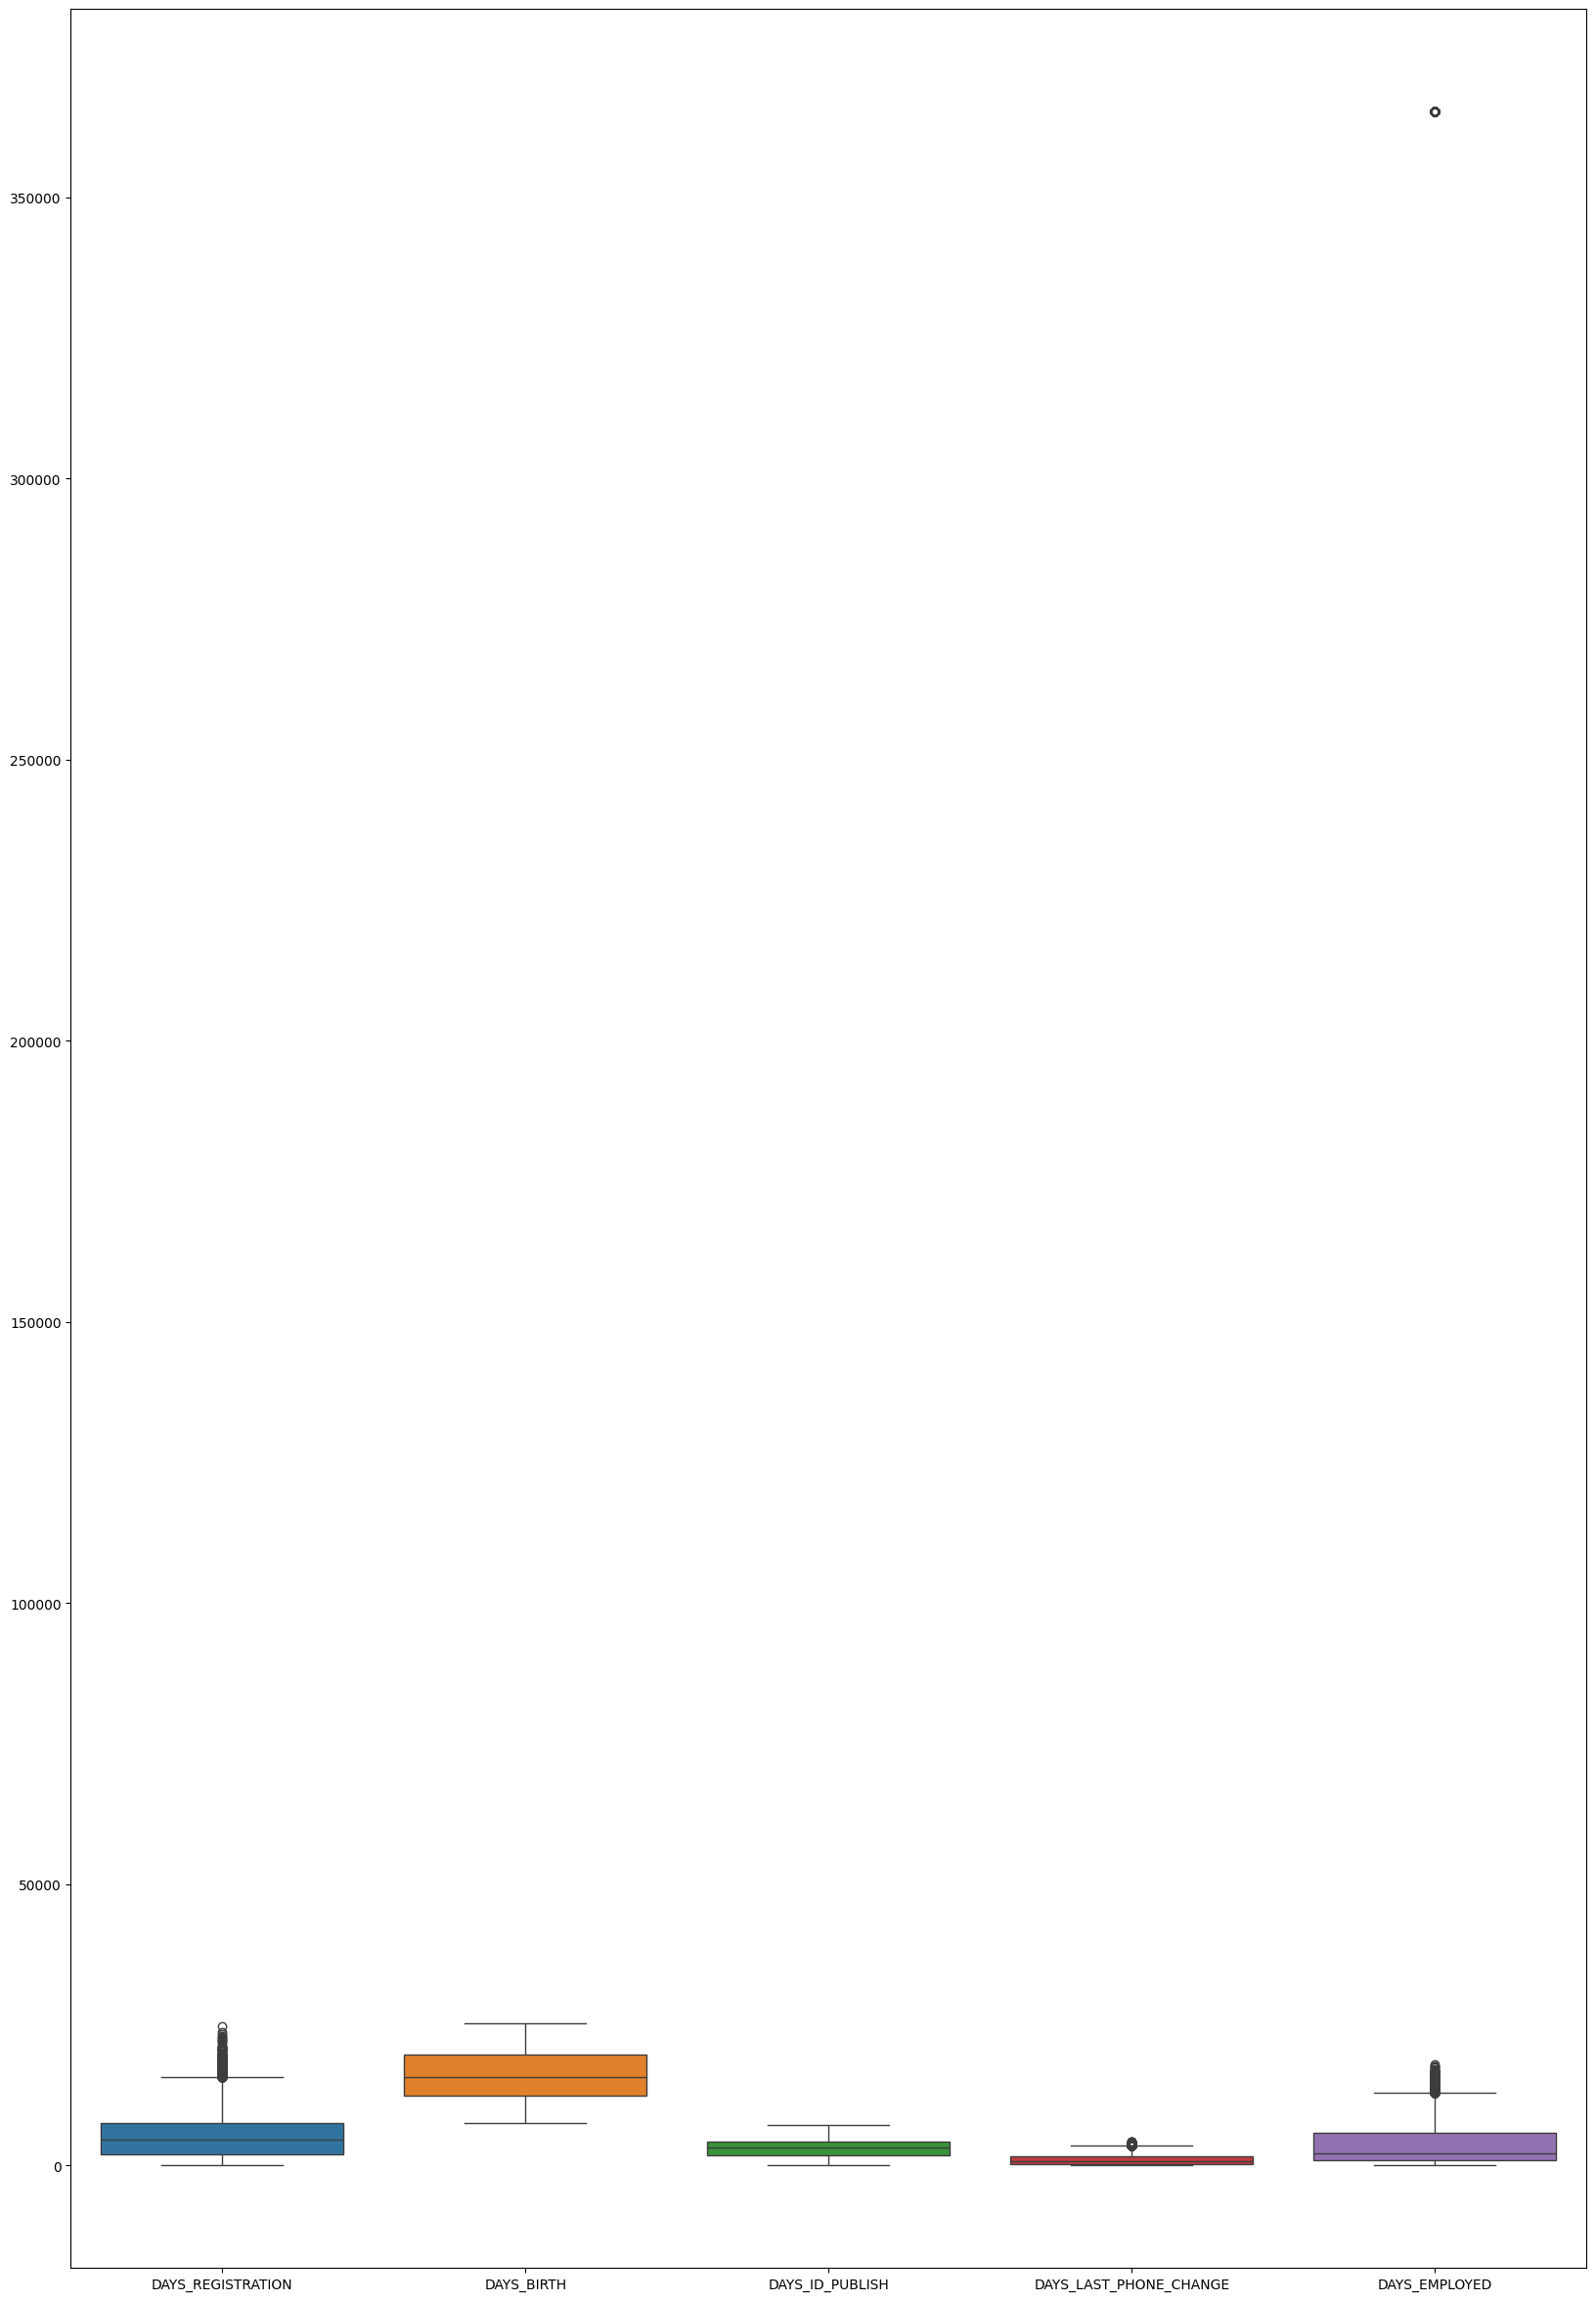

In [ ]:
#boxplot for 'DAYS_REGISTRATION','DAYS_BIRTH' ,'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_EMPLOYED'
plt.figure(figsize=[20,30])
columns_plot = ['DAYS_REGISTRATION','DAYS_BIRTH' ,'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_EMPLOYED']
sns.boxplot(data=ad[columns_plot])
plt.show()

In comparison to the first quartile, the third quartiles of DAYS_REGISTRATION and DAYS_LAST_PHONE_CHANGE are larger and contain a greater number of outliers.
DAYS_ID_PUBLISH and DAYS_BIRTH do not include any outliers. DAYS EMPLOYED has a very low IQR and an outlier is present at 350000. The most of the outliers can be found below 25000.


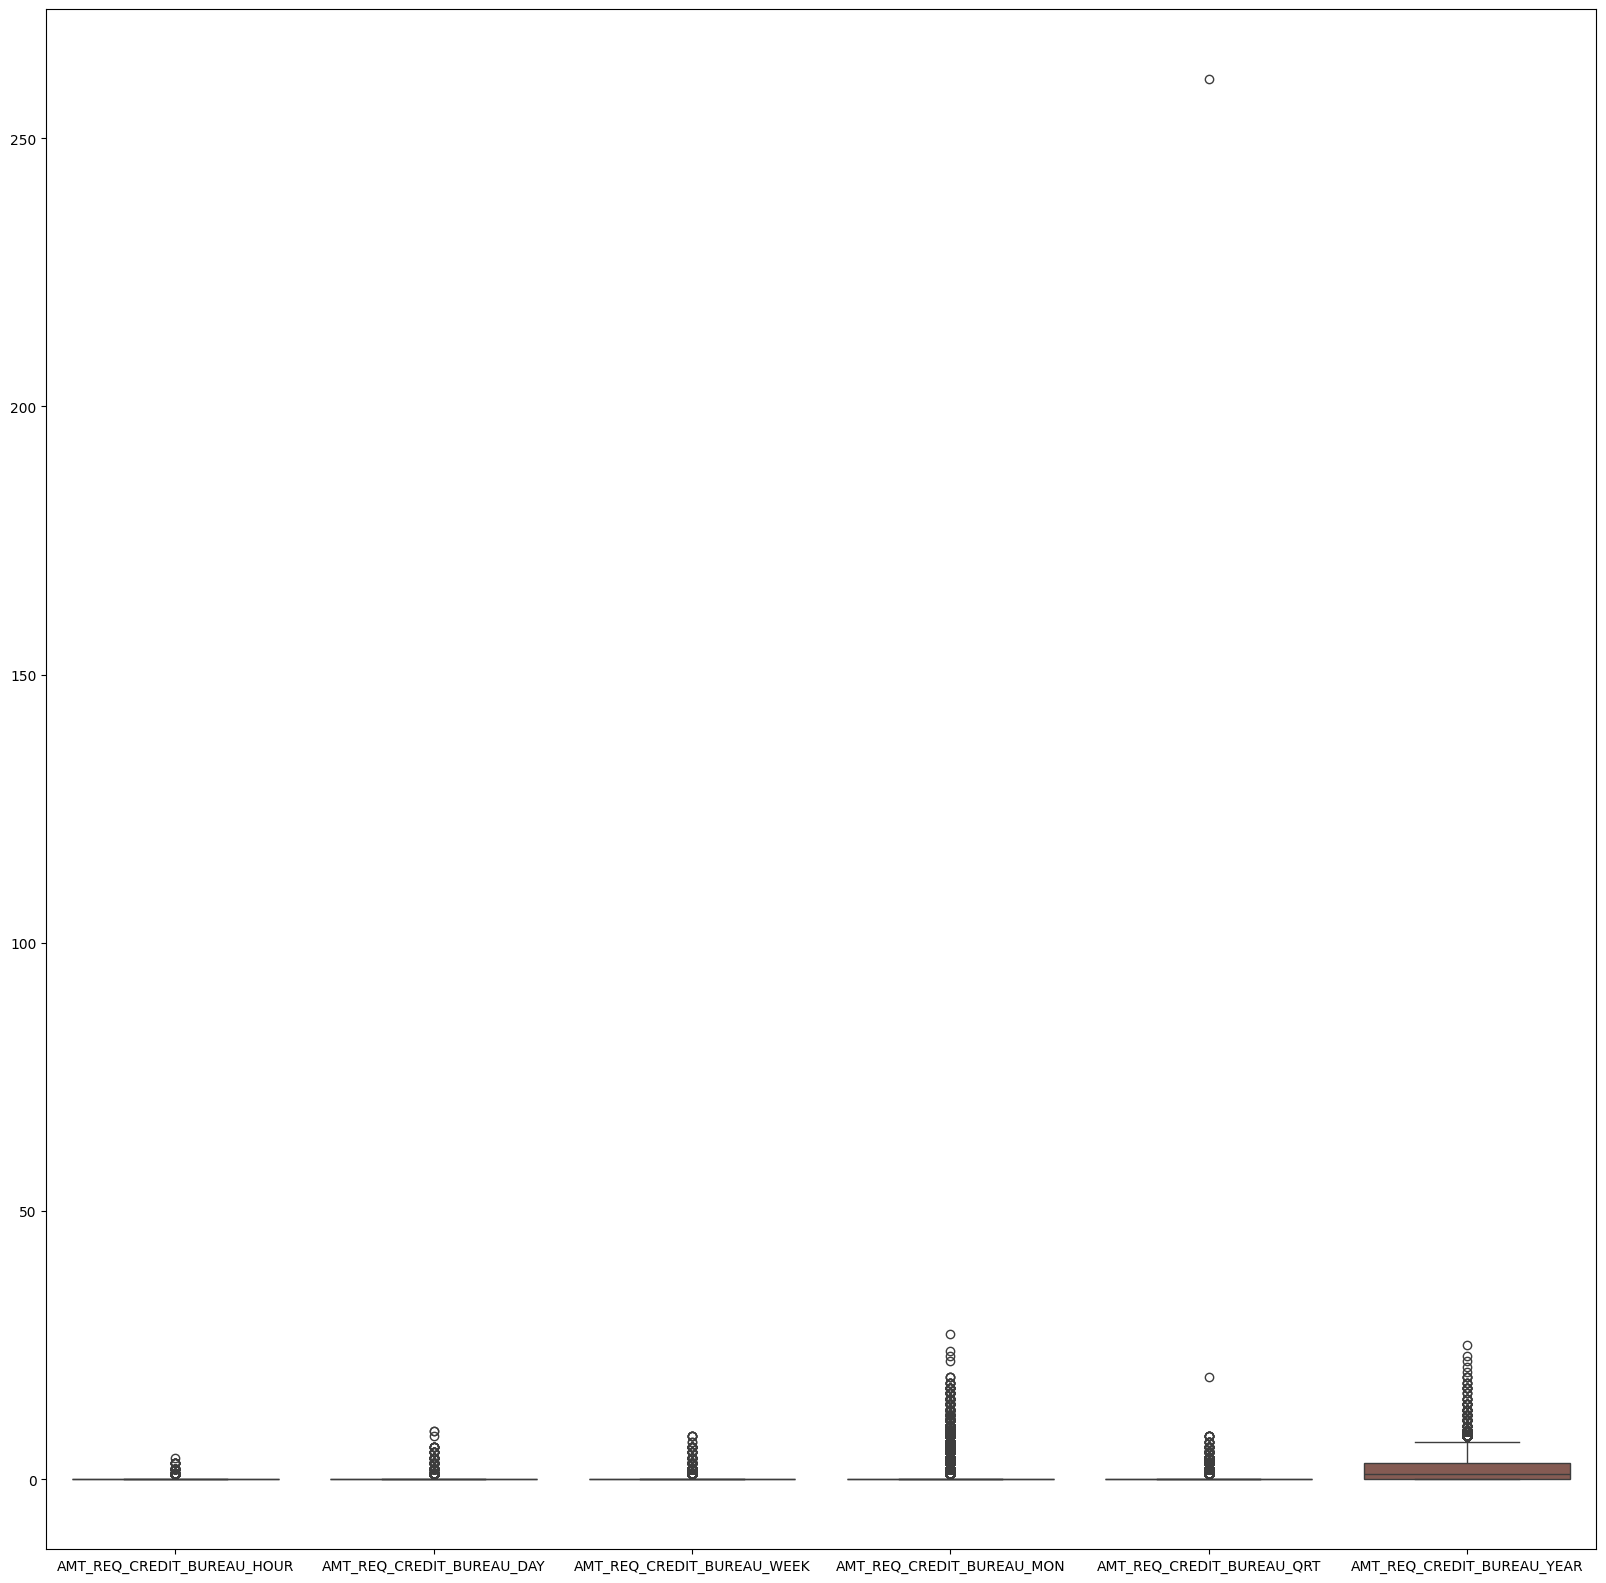

In [ ]:
#boxplot for 'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'
plt.figure(figsize=[20,20])
columns_plot2 = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
sns.boxplot(data=ad[columns_plot2])
plt.show()

It is clear that box plot of those columns are very slim and have a large number of outliers.

0    282686
1     24825
Name: TARGET, dtype: int64


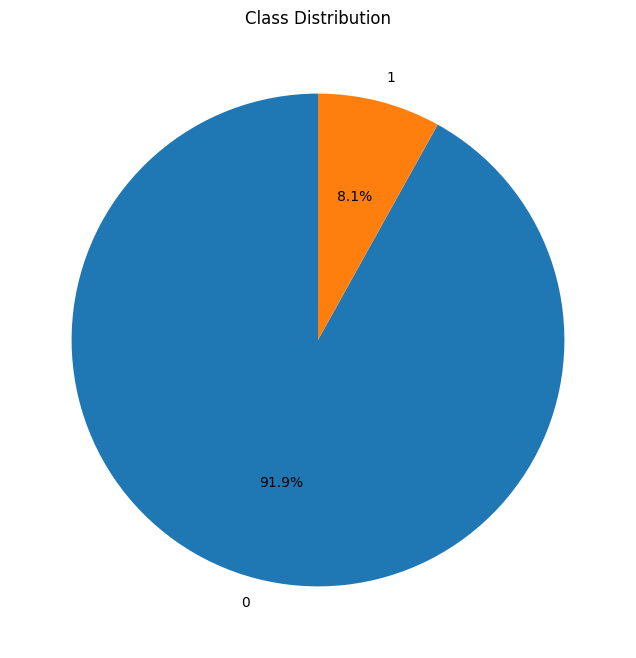

Imbalance Ratio: 11.387150050352467


In [ ]:
#analysing data imbalance
counts = pd.value_counts(ad['TARGET'])
print(counts)
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution')
plt.show()
imbalance_ratio = counts.max() / counts.min()
print("Imbalance Ratio:", imbalance_ratio)


The application data(ad) is highly imbalanced.

In [ ]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

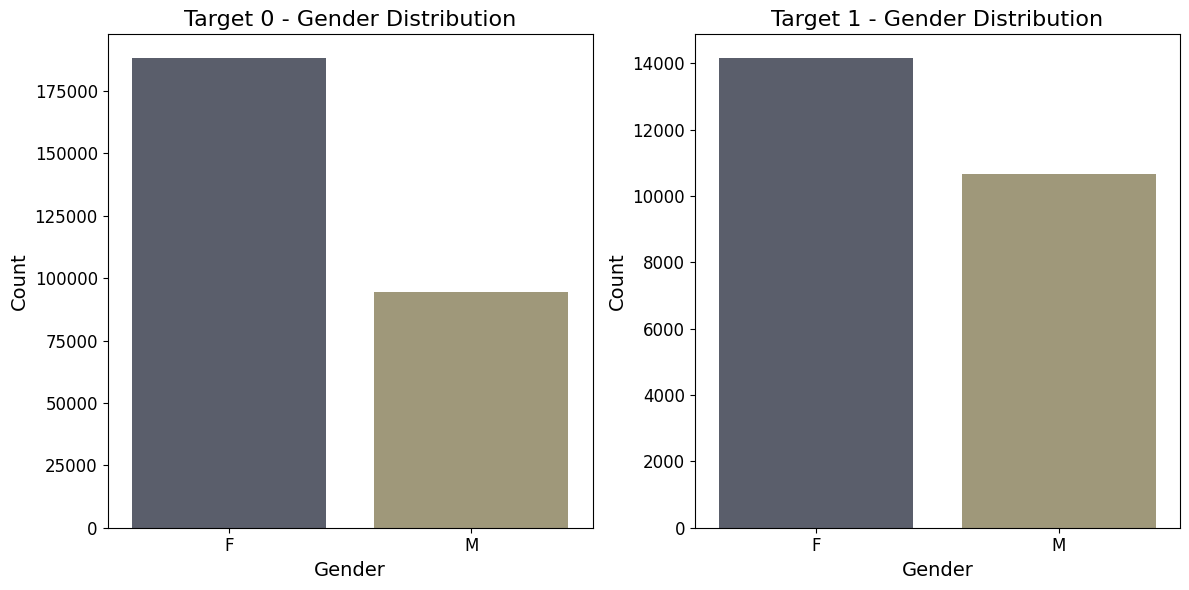

In [ ]:
#Gender distribution by TARGET
plt.figure(figsize=(12, 6))

#Gender Distribution in Target 0
plt.subplot(121)
sns.countplot(x='CODE_GENDER', data=ad[ad['TARGET'] == 0], palette=sns.color_palette("cividis", 2))
plt.title("Target 0 - Gender Distribution", fontsize=16)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#Gender Distribution in Target 1
plt.subplot(122)
sns.countplot(x='CODE_GENDER', data=ad[ad['TARGET'] == 1], palette=sns.color_palette("cividis", 2))
plt.title("Target 1 - Gender Distribution", fontsize=16)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.tight_layout()
plt.show()

It appears that more female clients than male consumers applied for loans.


CODE_GENDER          F          M
TARGET                           
0            66.604643  33.395357
1            57.079557  42.920443


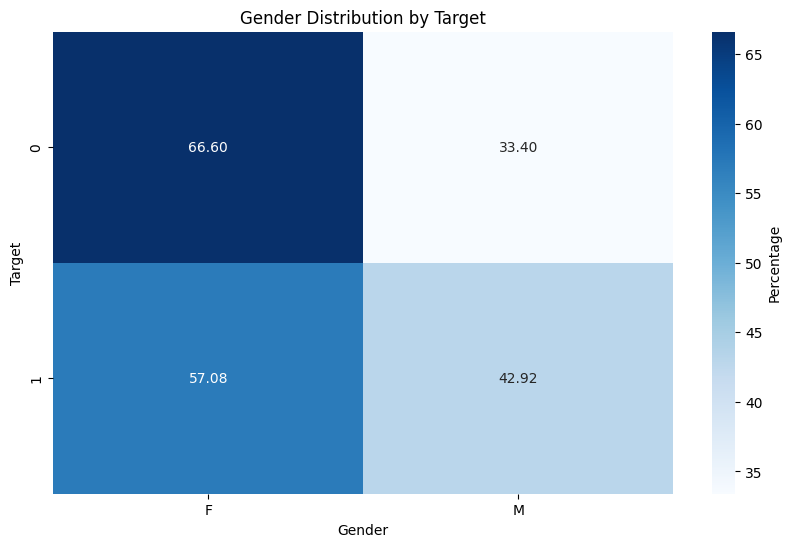

In [ ]:
#Heatmap of Gender Distribution by Target
cross_tab = pd.crosstab(ad['TARGET'], ad['CODE_GENDER'], normalize='index') * 100
print(cross_tab)

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt=".2f", cbar_kws={'label': 'Percentage'})
plt.title('Gender Distribution by Target')
plt.xlabel('Gender')
plt.ylabel('Target')
plt.show()

33.4% of male clients and 66.6% of female clients are non-defaulters. 42% of male clients default, compared to 57% of female clients.

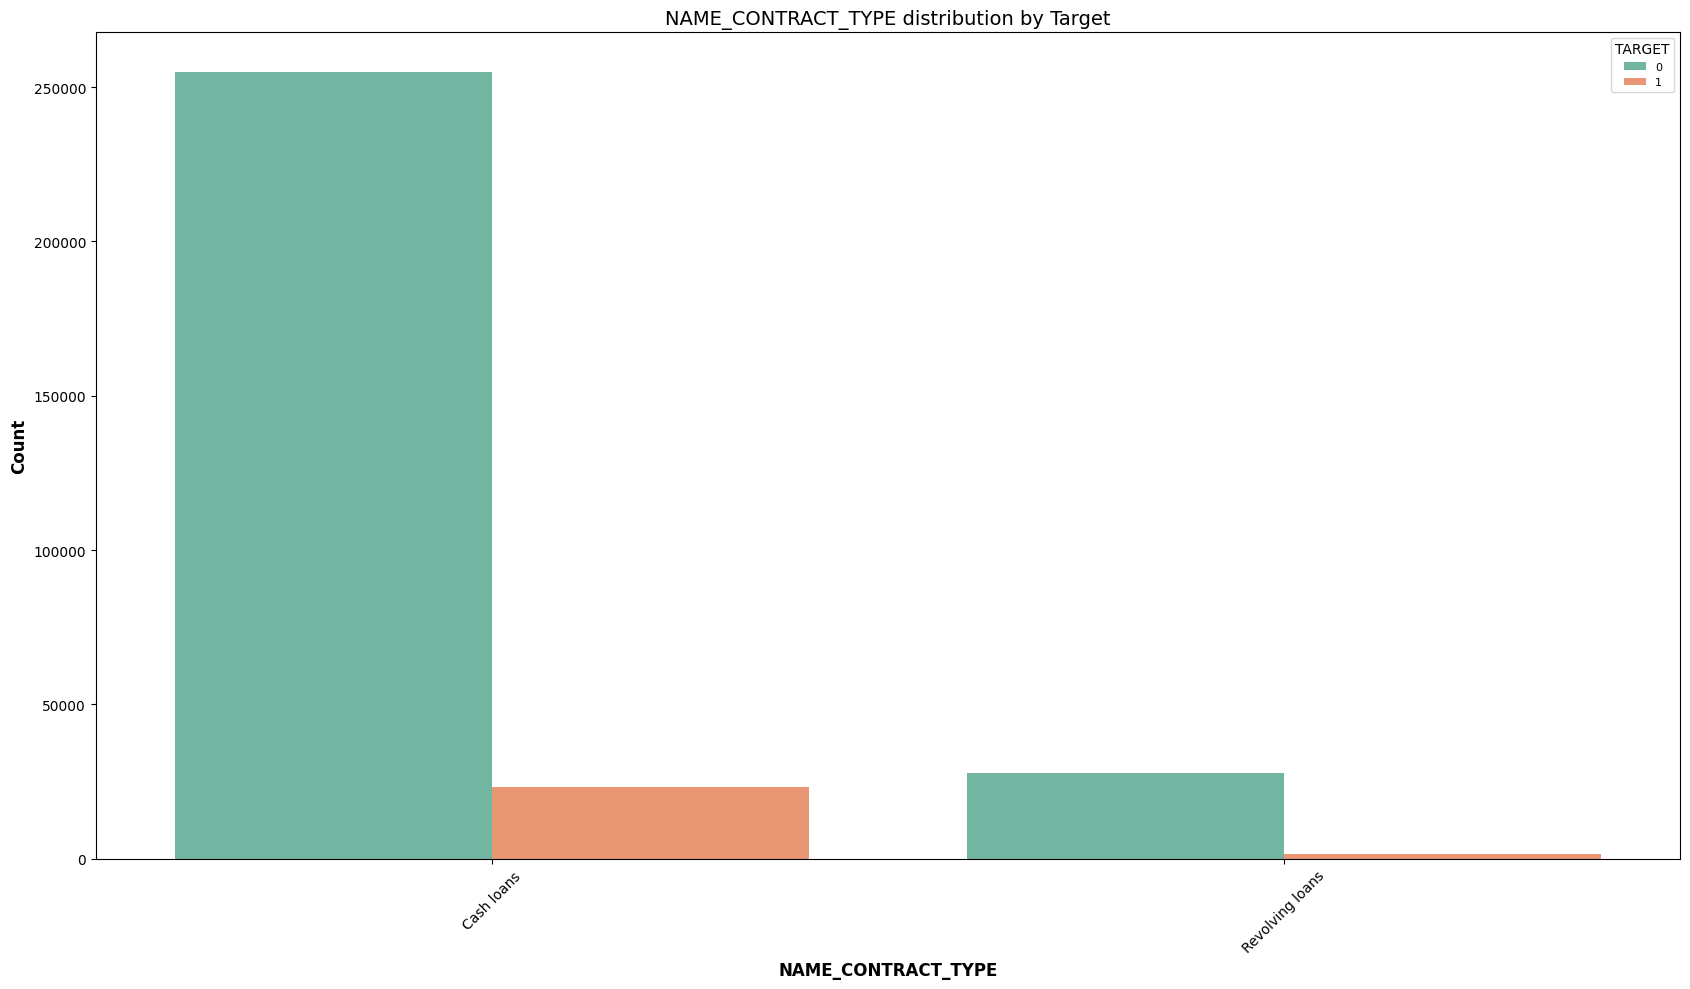

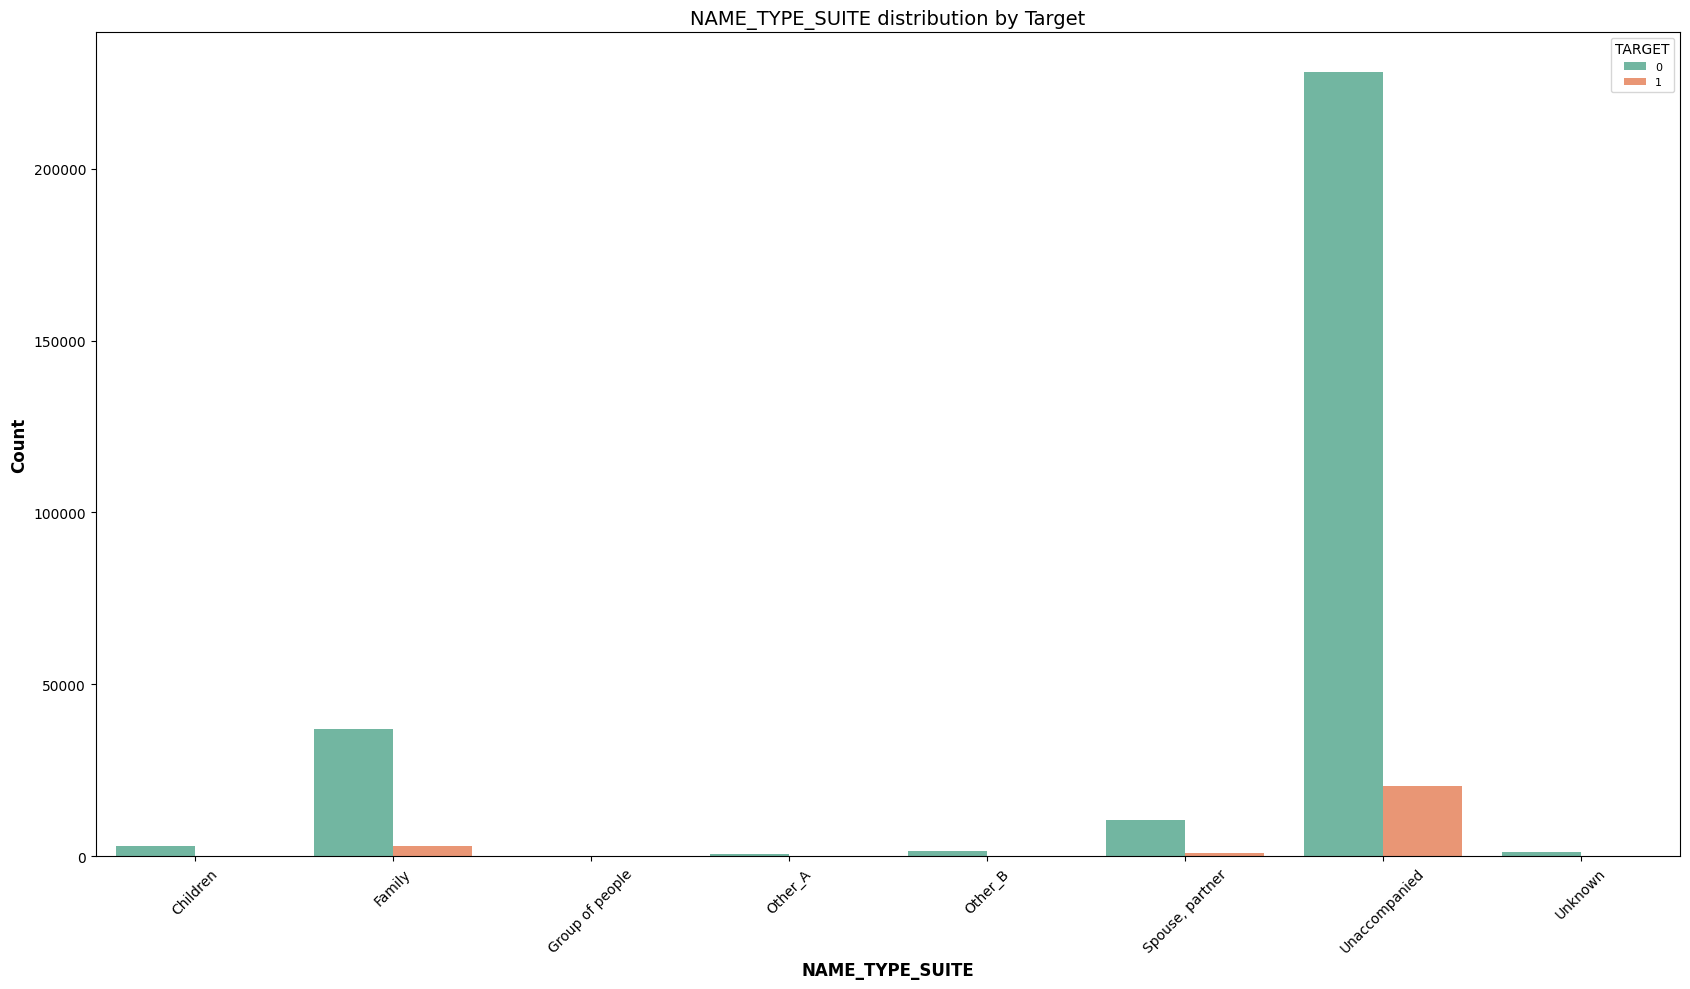

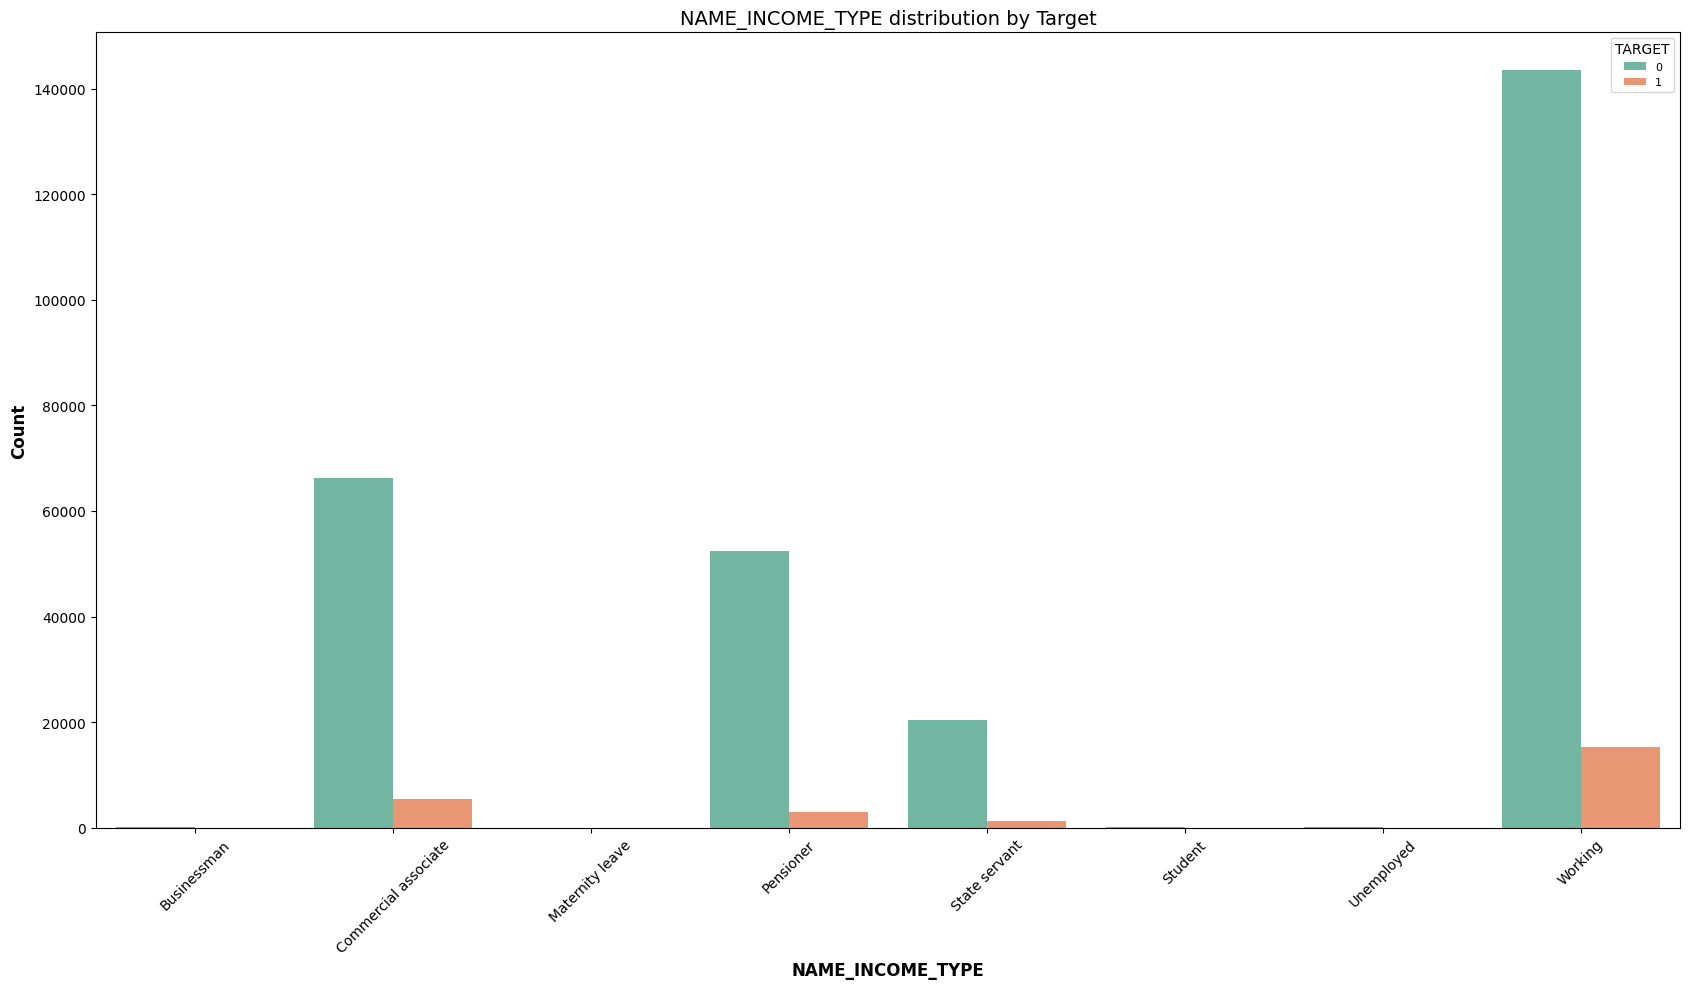

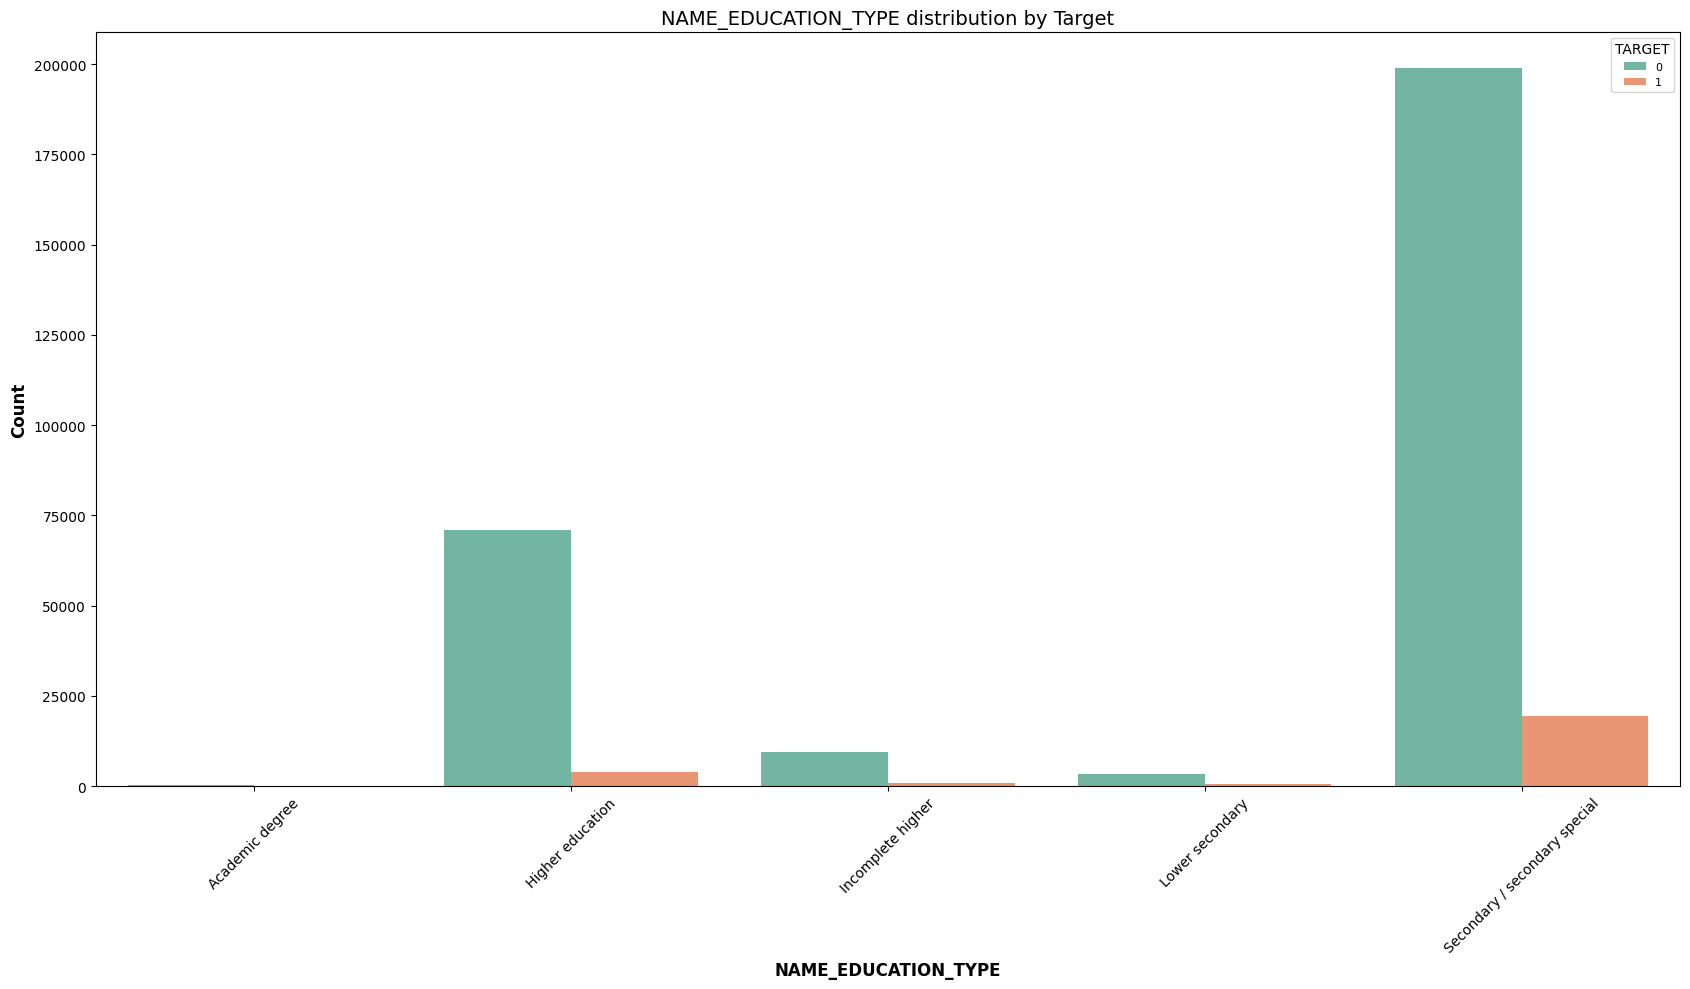

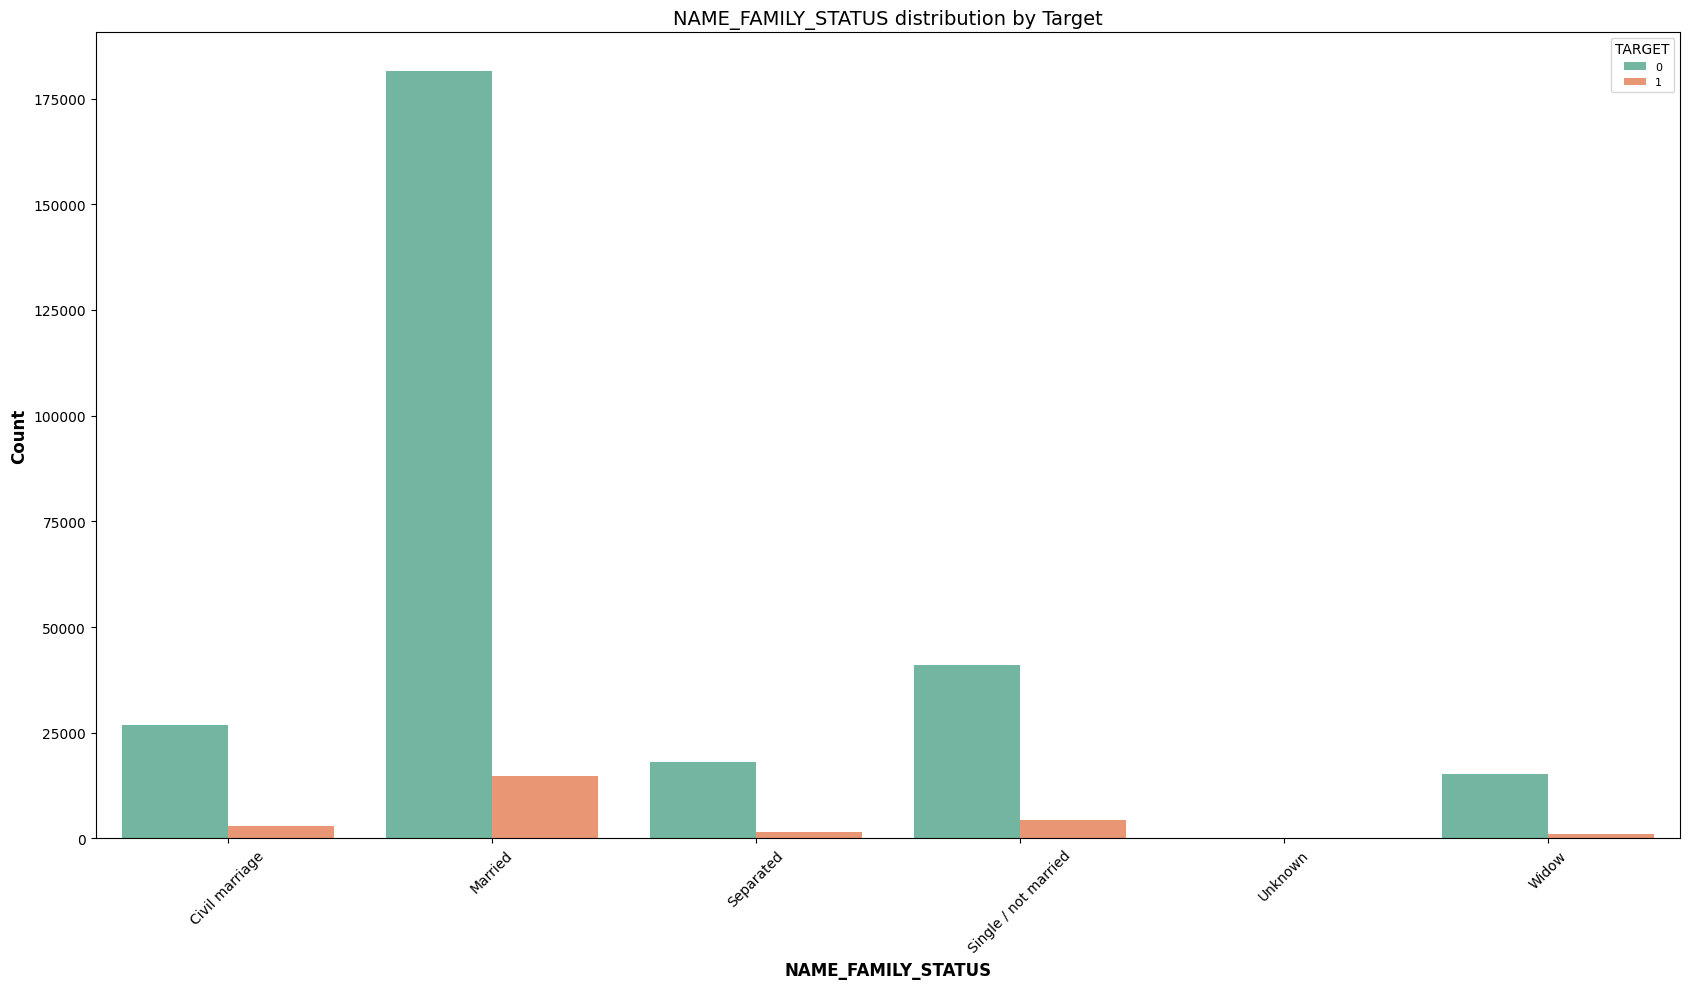

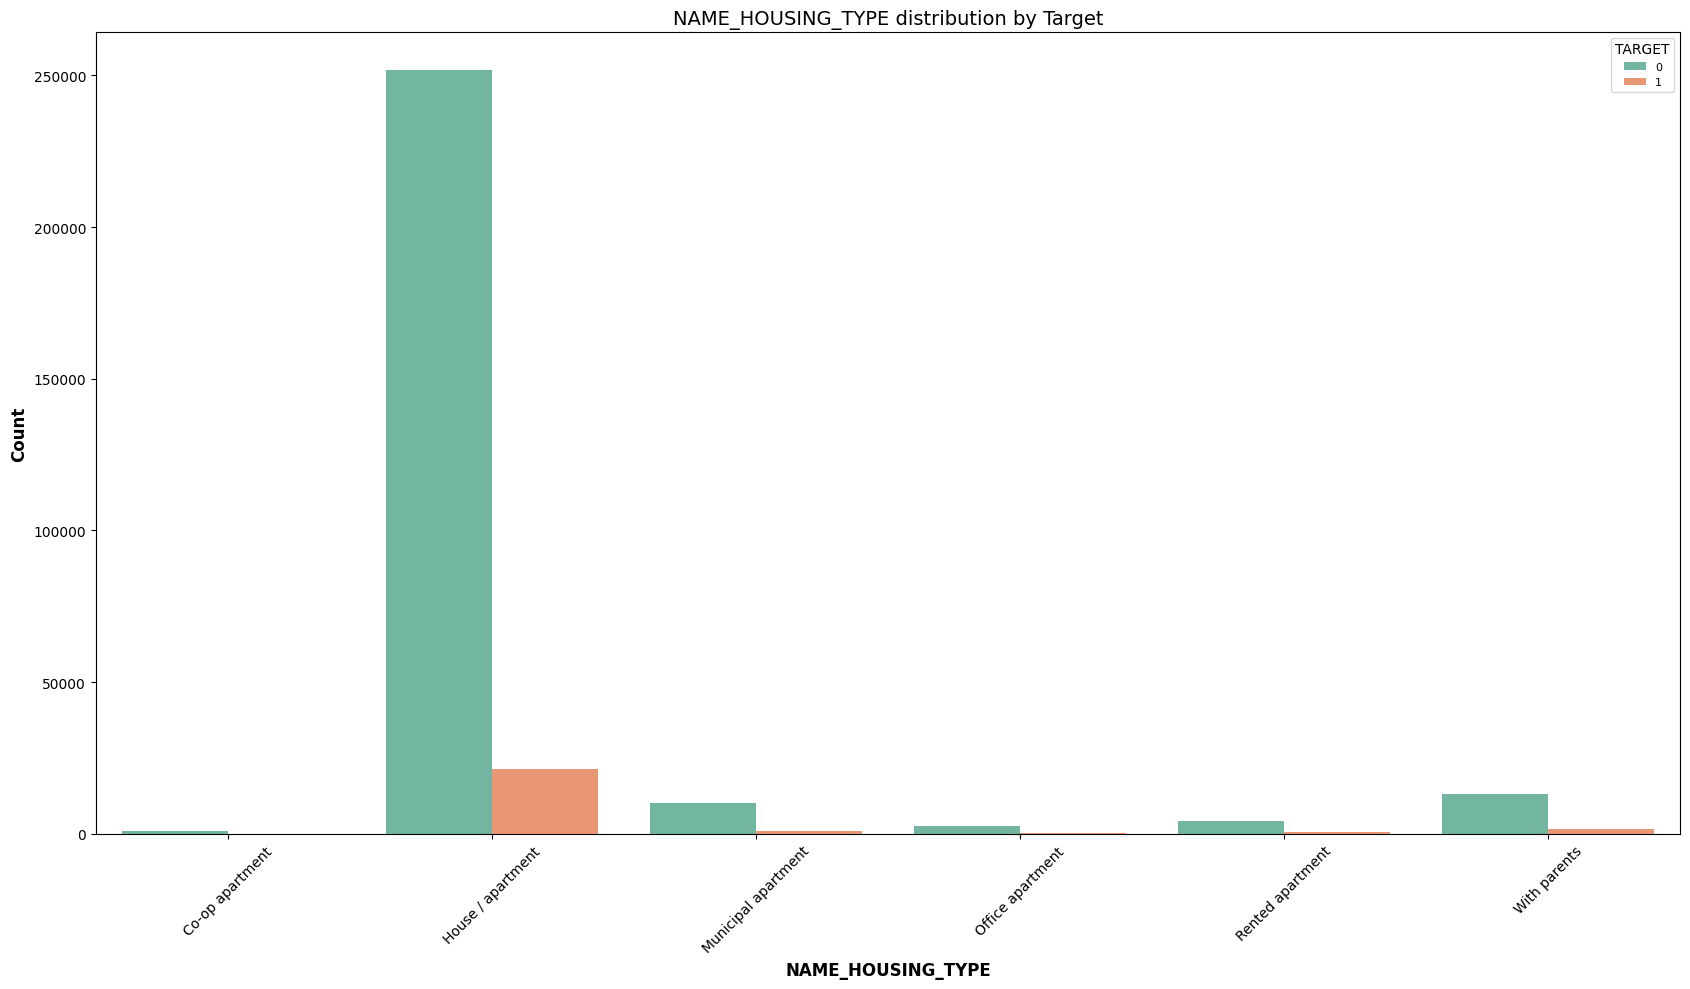

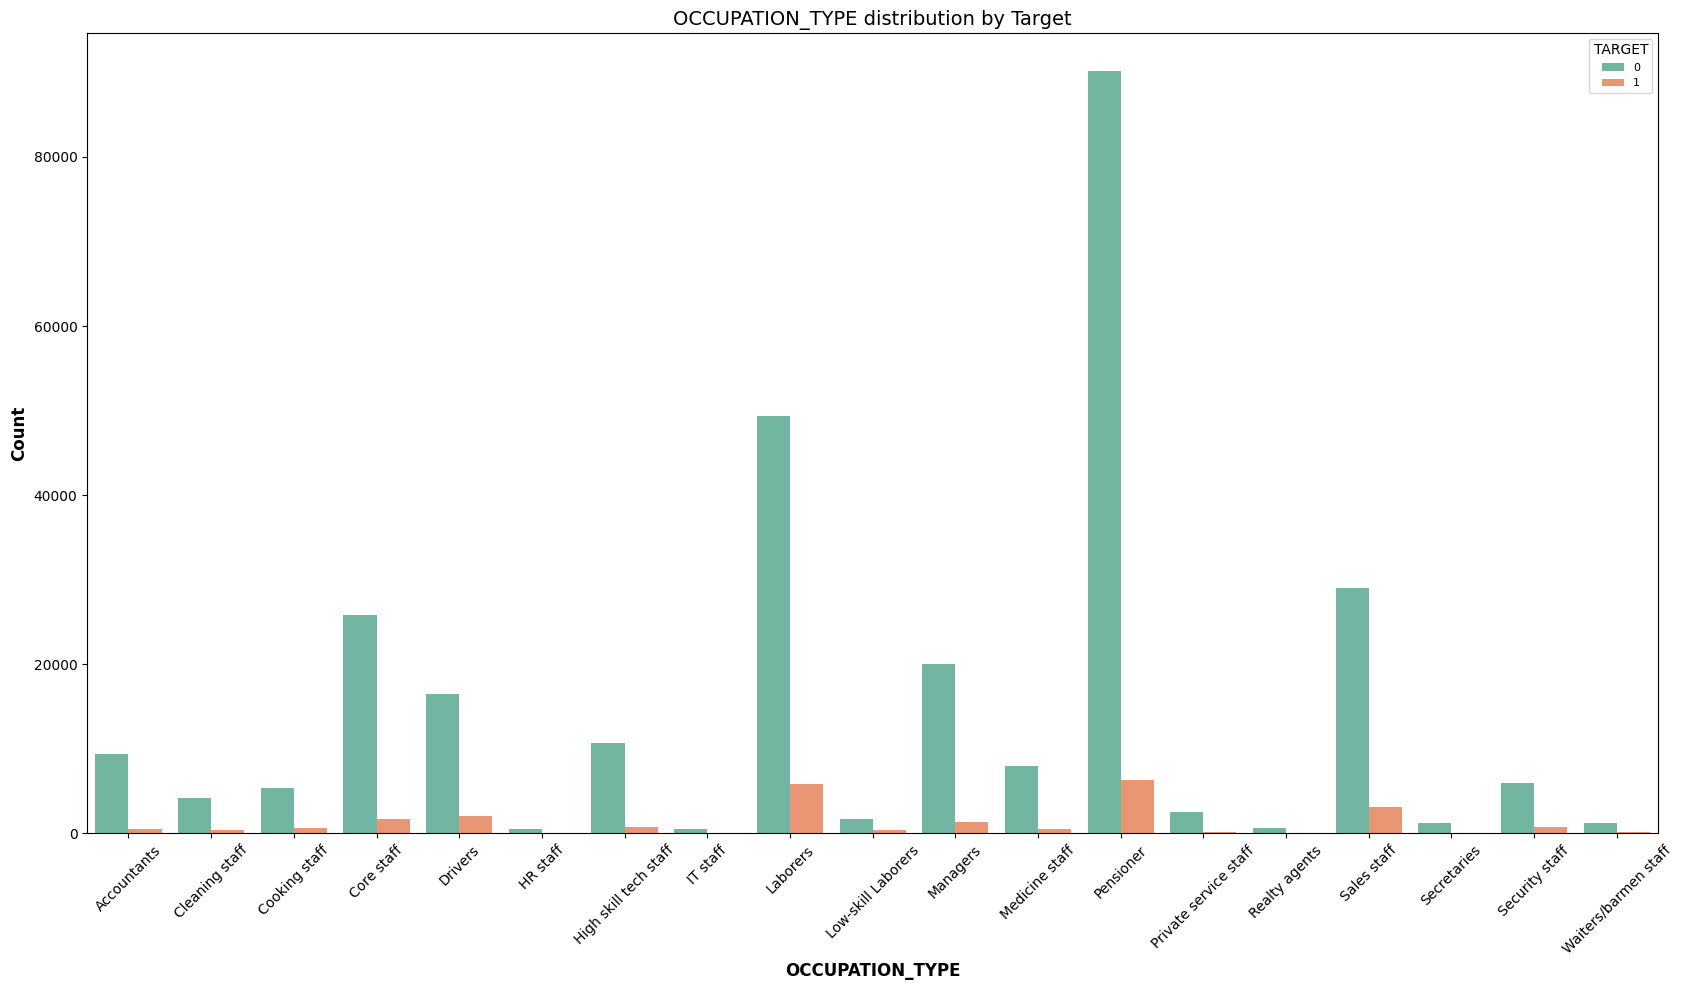

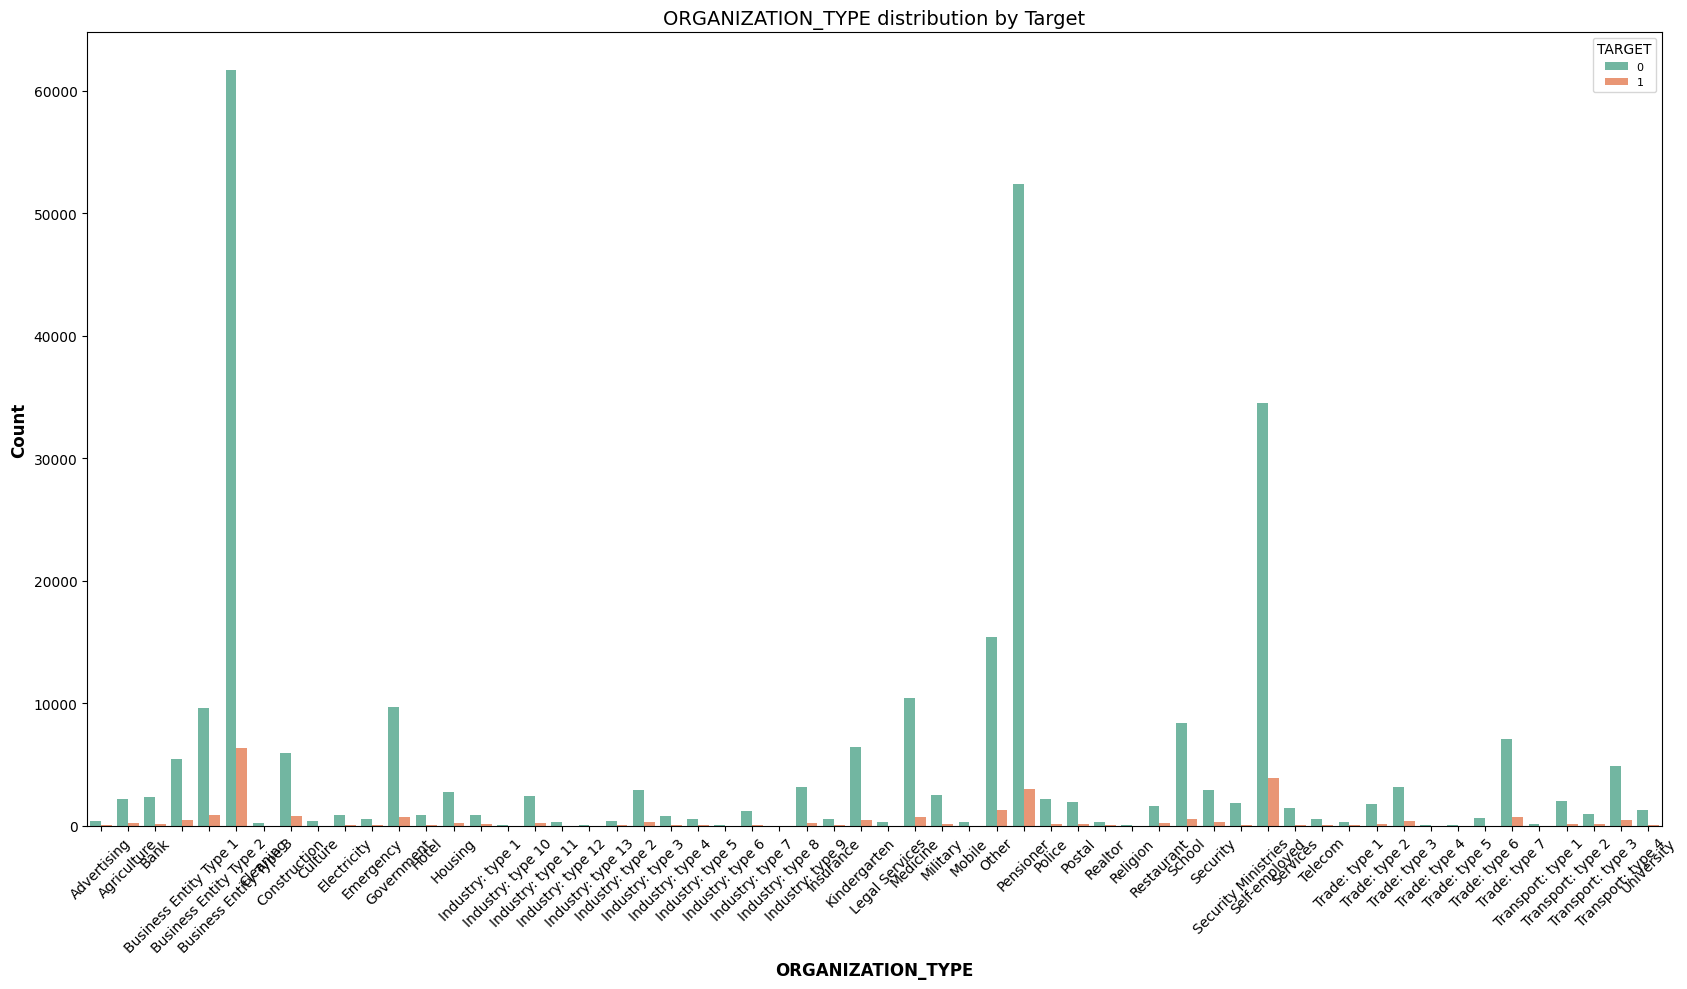

In [ ]:
#countplot of categorical variable- distribution by TARGET
def cat_plot(ad, cat_column):
    plt.figure(figsize=(17,10))

    sns.countplot(x=cat_column, data=ad, palette='Set2', hue='TARGET')
    plt.xlabel(cat_column, fontsize=12, fontweight="bold")
    plt.ylabel('Count', fontsize=12, fontweight="bold")
    plt.title(f'{cat_column} distribution by Target', fontsize=14)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.legend(title='TARGET', labels=['0', '1'], title_fontsize='10', fontsize='8')
    plt.tight_layout()
    plt.show()

cat_column = list(ad.select_dtypes(include= 'category').columns)
cat_column.remove('CODE_GENDER')

for column in cat_column:
    cat_plot(ad, column)

NAME_CONTRACT_TYPE :
While a relatively small percentage of clients have asked for revolving loans for both defaulters and non-defaulters, the majority of clients have requested for cash loans.

NAME_INCOME_TYPE:
Individuals who sought for loans and reported their income as working class, pensioners, and commercial associates were the most likely to do so. Business owners, learners, and jobless people are more likely to ask for loans. The working category has a significant default risk. State Servant's default risk is negligible.

NAME_EDUCATION_TYPE:
It is more likely that clients with Secondary or Secondary Special education will apply for the loan. Clients with Secondary or Secondary Special education are more likely to default.Other forms of schooling carry less danger.

NAME_FAMILY_STATUS :
When it comes to both defaulters and non-defaulters, married clients appear to apply for loans more frequently than other clientele.
Single clients are less dangerous in the event of defaulters.
Widows exhibit very less risk when it comes to defaulters.

NAME_HOUSING_TYPE:
From the bar chart, it is clear that Most of the clients own a house or living in a apartment for both Defaulters and Non-Defaulters.

OCCUPATION_TYPE:
The majority of loan applications, both from defaulters and non-defaulters, have come from pensioners. The largest group, pensioners, are most likely to default, followed by workers.

WEEKDAY_APPR_PROCESS_START:
The number of days for both defaulters and non-defaulters does not differ much.

AMT_INCOME_TYPE:
Customers in the middle of the pay scale are more likely to apply for a loan, whether they are non-defaulters or defaulters. Low- and middle-class clients are more likely to default.

AMT_CREDIT_TYPE:
For both defaulters and non-defaulters, the majority of clients asked for loans with a medium credit amount. There is a significant default risk for clients applying for both high and low credit.'''

<Figure size 1000x600 with 0 Axes>

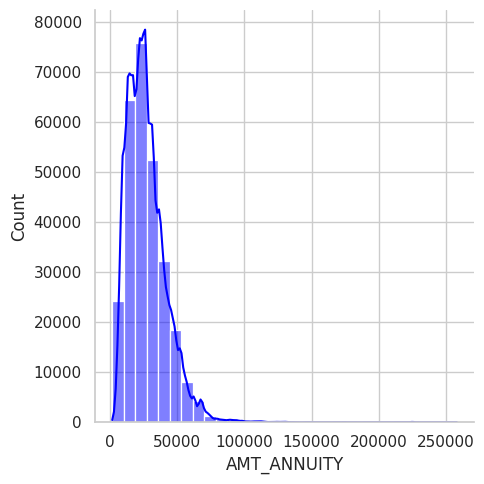

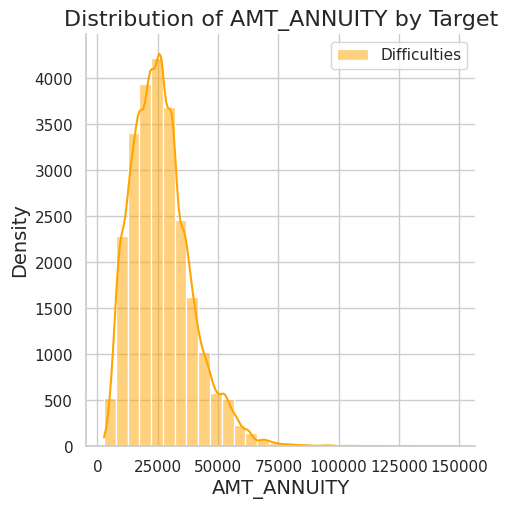

<Figure size 1000x600 with 0 Axes>

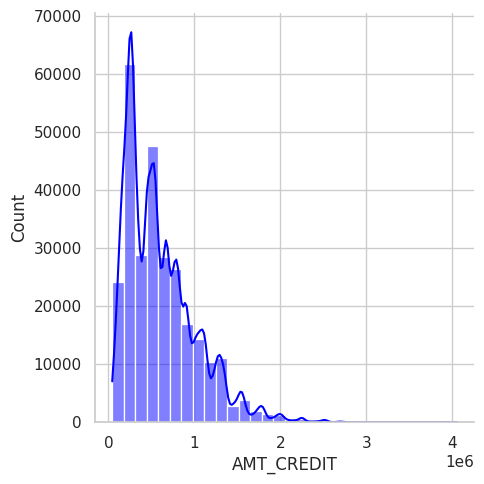

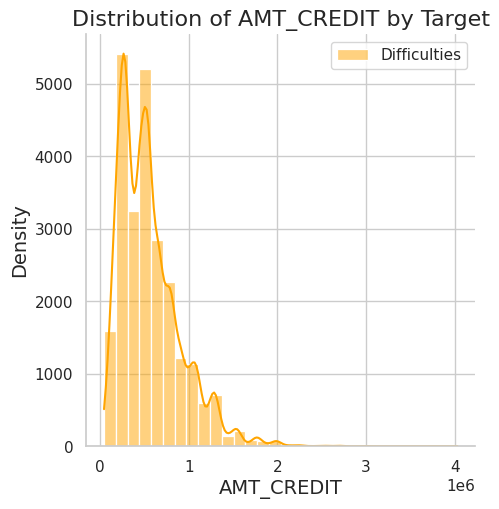

<Figure size 1000x600 with 0 Axes>

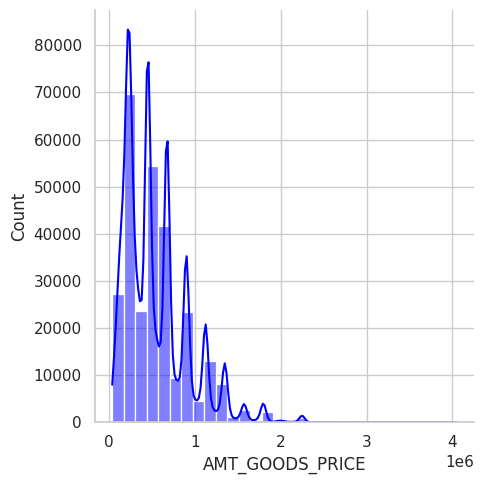

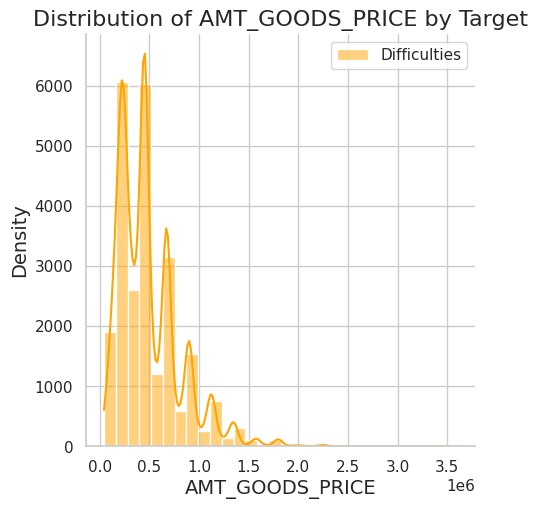

<Figure size 1000x600 with 0 Axes>

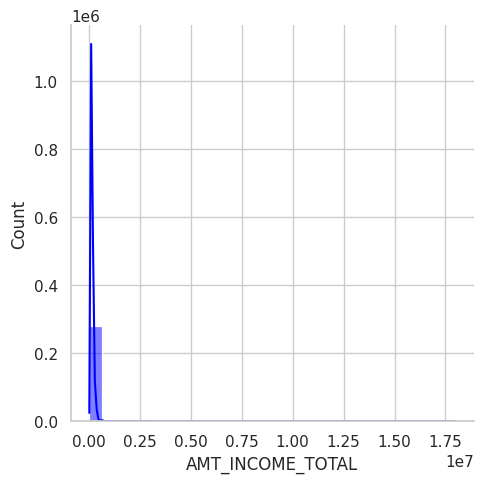

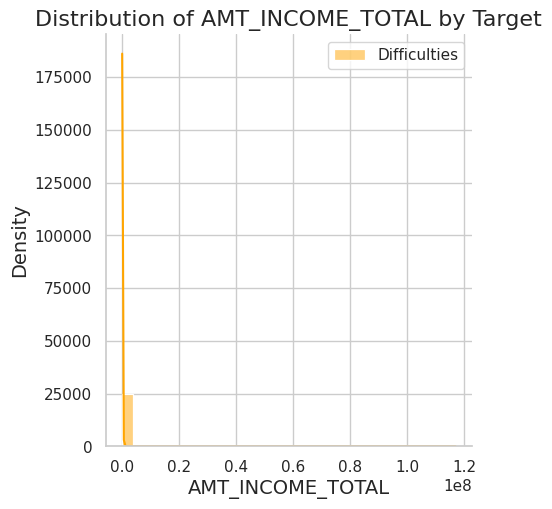

In [ ]:
# Plotting displots for each AMT_columns

AMT_columns = ['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL']

sns.set(style="whitegrid")

for column in AMT_columns:
    plt.figure(figsize=(10, 6))

    sns.displot(ad[ad['TARGET'] == 0][column], kde=True, color='blue', label='Non-Difficulties', bins=30)
    sns.displot(ad[ad['TARGET'] == 1][column], kde=True, color='orange', label='Difficulties', bins=30)

    plt.title(f'Distribution of {column} by Target', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.legend()
    plt.show()

Target zero individuals have a more evenly distributed income than target one individuals. The income total, annuity, credit, and good price shapes are clearly identical for Target 0 and Target 1, as the graphic makes evident.
Additionally, the plots show those who struggle to repay loans in relation to their income, the amount borrowed, the cost of the assets used as collateral, and annuities.With respect to Target 0, which is narrower and has more defined borders, Distplot shows the curve form for Target 1, which is wider.

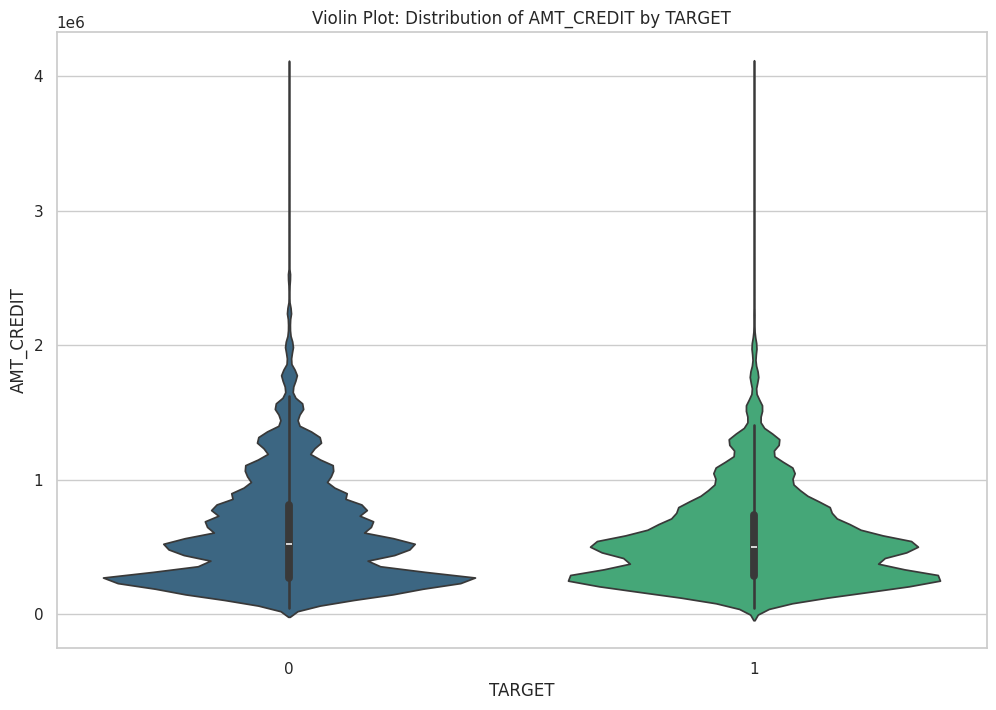

In [ ]:
# Violin Plot: Distribution of 'AMT_CREDIT' by 'TARGET'
plt.figure(figsize=(12, 8))
sns.violinplot(x='TARGET', y='AMT_CREDIT', data=ad, palette='viridis')
plt.title('Violin Plot: Distribution of AMT_CREDIT by TARGET')
plt.show()

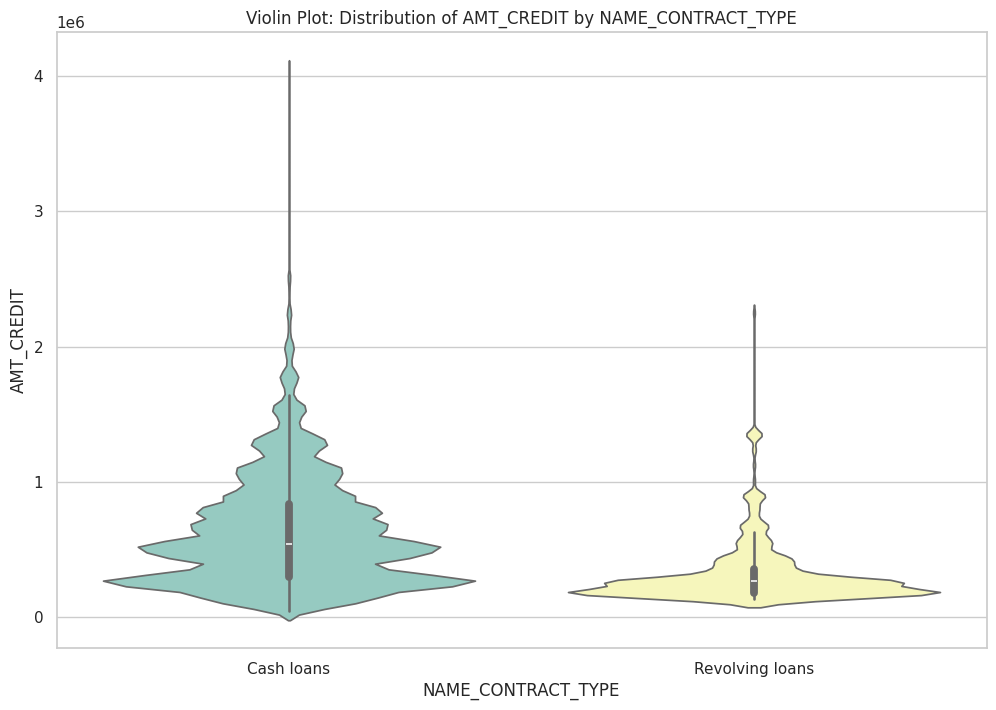

In [ ]:
# Violin Plot: Distribution of AMT_CREDIT by NAME_CONTRACT_TYPE
plt.figure(figsize=(12, 8))
sns.violinplot(x='NAME_CONTRACT_TYPE', y='AMT_CREDIT', data=ad, palette='Set3')
plt.title('Violin Plot: Distribution of AMT_CREDIT by NAME_CONTRACT_TYPE')
plt.show()

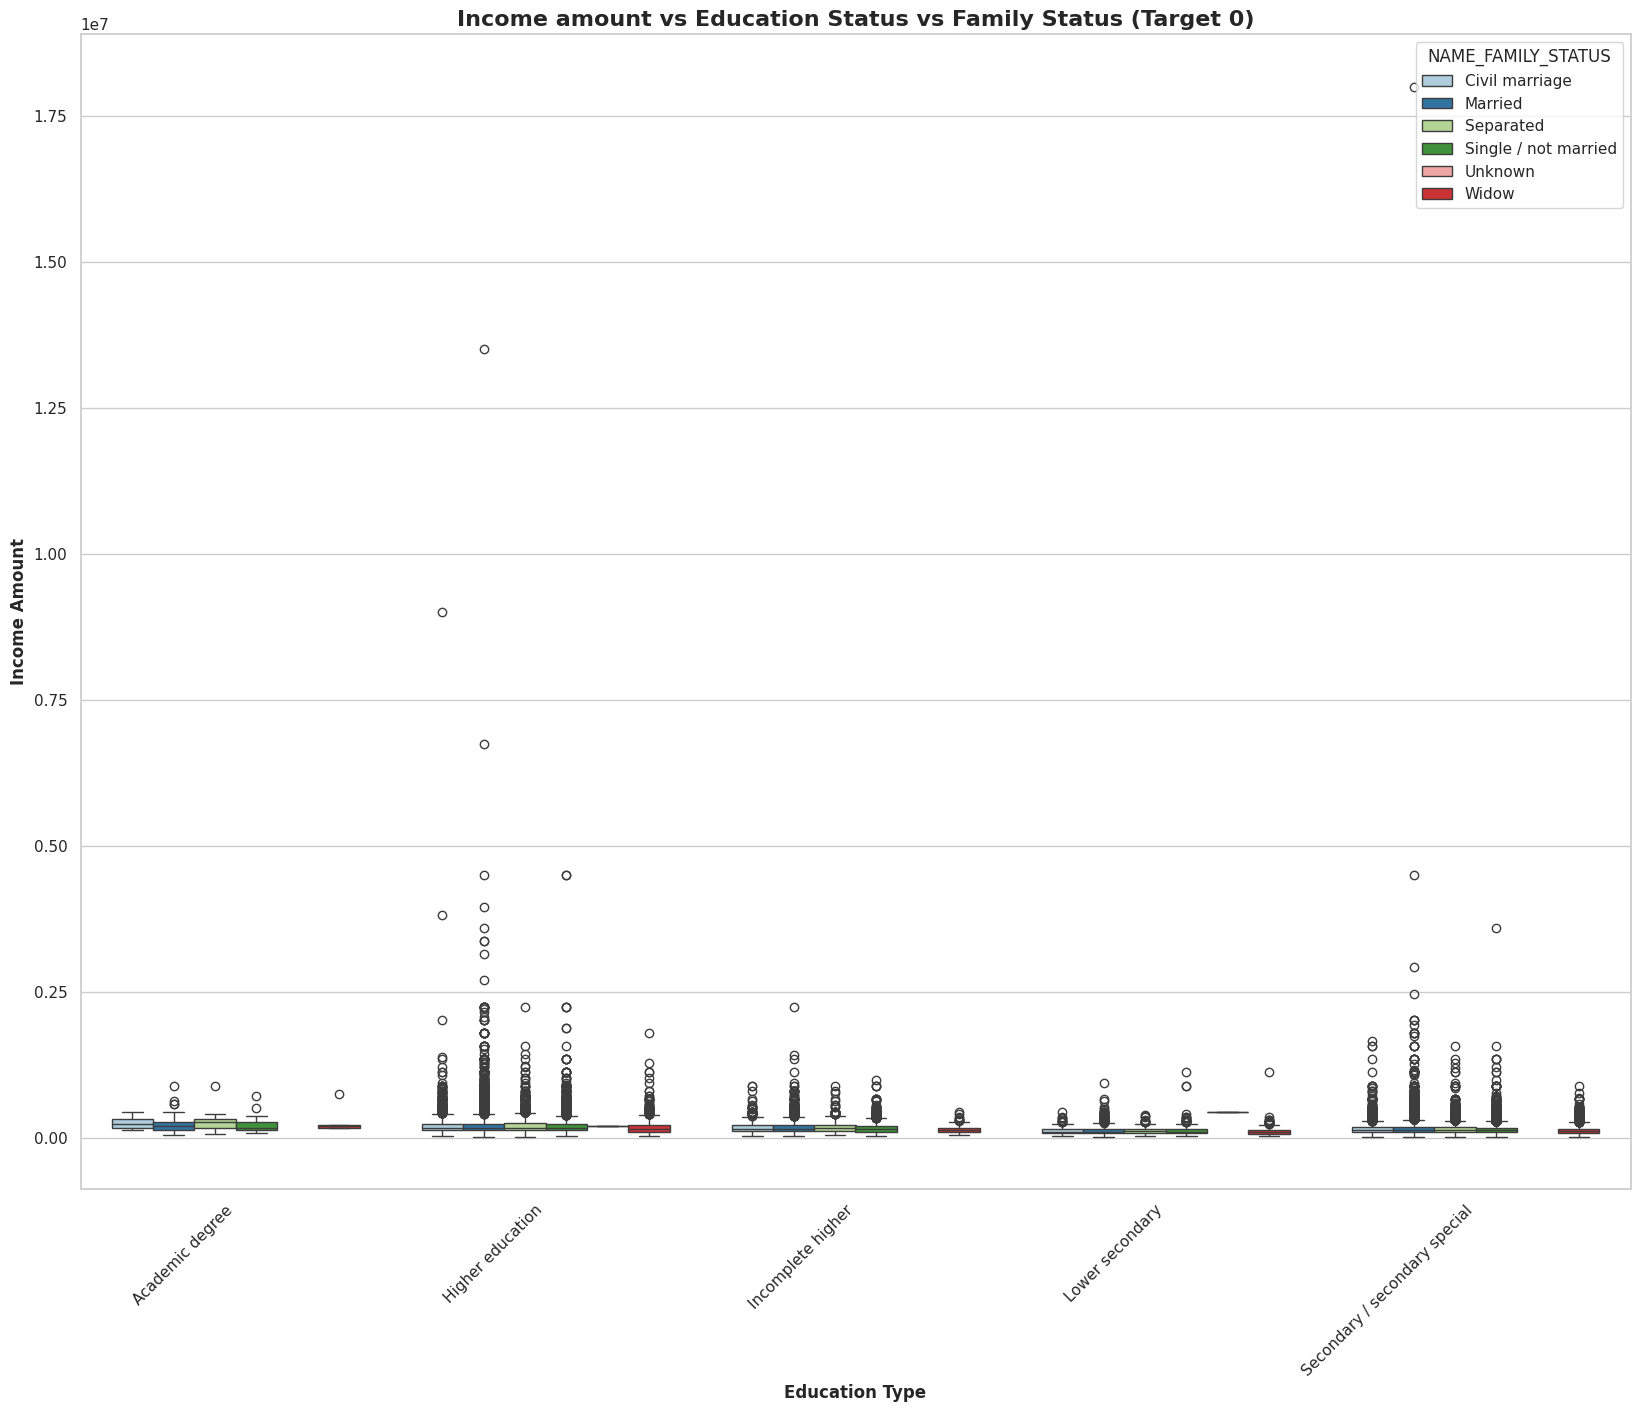

In [ ]:
#boxplot for AMT_INCOME_TOTAL vs NAME_EDUCATION_TYPE vs NAME_FAMILY_STATUS (Target 0)
sns.set(style="whitegrid")


fig, ax = plt.subplots(figsize=(20, 15))

set1 = ad[ad['TARGET'] == 0][['NAME_EDUCATION_TYPE', 'AMT_INCOME_TOTAL', 'NAME_FAMILY_STATUS']]

sns.boxplot(x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL', hue='NAME_FAMILY_STATUS', data=set1, palette='Paired', ax=ax)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Education Type", fontsize=12, fontweight="bold")
plt.ylabel("Income Amount", fontsize=12, fontweight="bold")
plt.title('Income amount vs Education Status vs Family Status (Target 0)', fontsize=16, fontweight="bold")
plt.show()


Widow client with academic degree lacks the first and third quartile and has relatively few outliers. Additionally, compared to other forms of schooling, clients with academic degrees from all family backgrounds have comparatively few outliers.
The income of clients with all family status kinds and the other types of schooling falls below the first quartile, or 25%.
There are more outliers among clients with higher education, incomplete higher education, lower secondary education, and secondary/special education.
Based on the following graph, we may conclude that clients with higher education typically earn more than other clients.
Despite this, there are some consumers with higher earnings who haven't finished their higher education.
There is a tendency for some clients receiving Secondary/Secondary Special Education to earn more money.

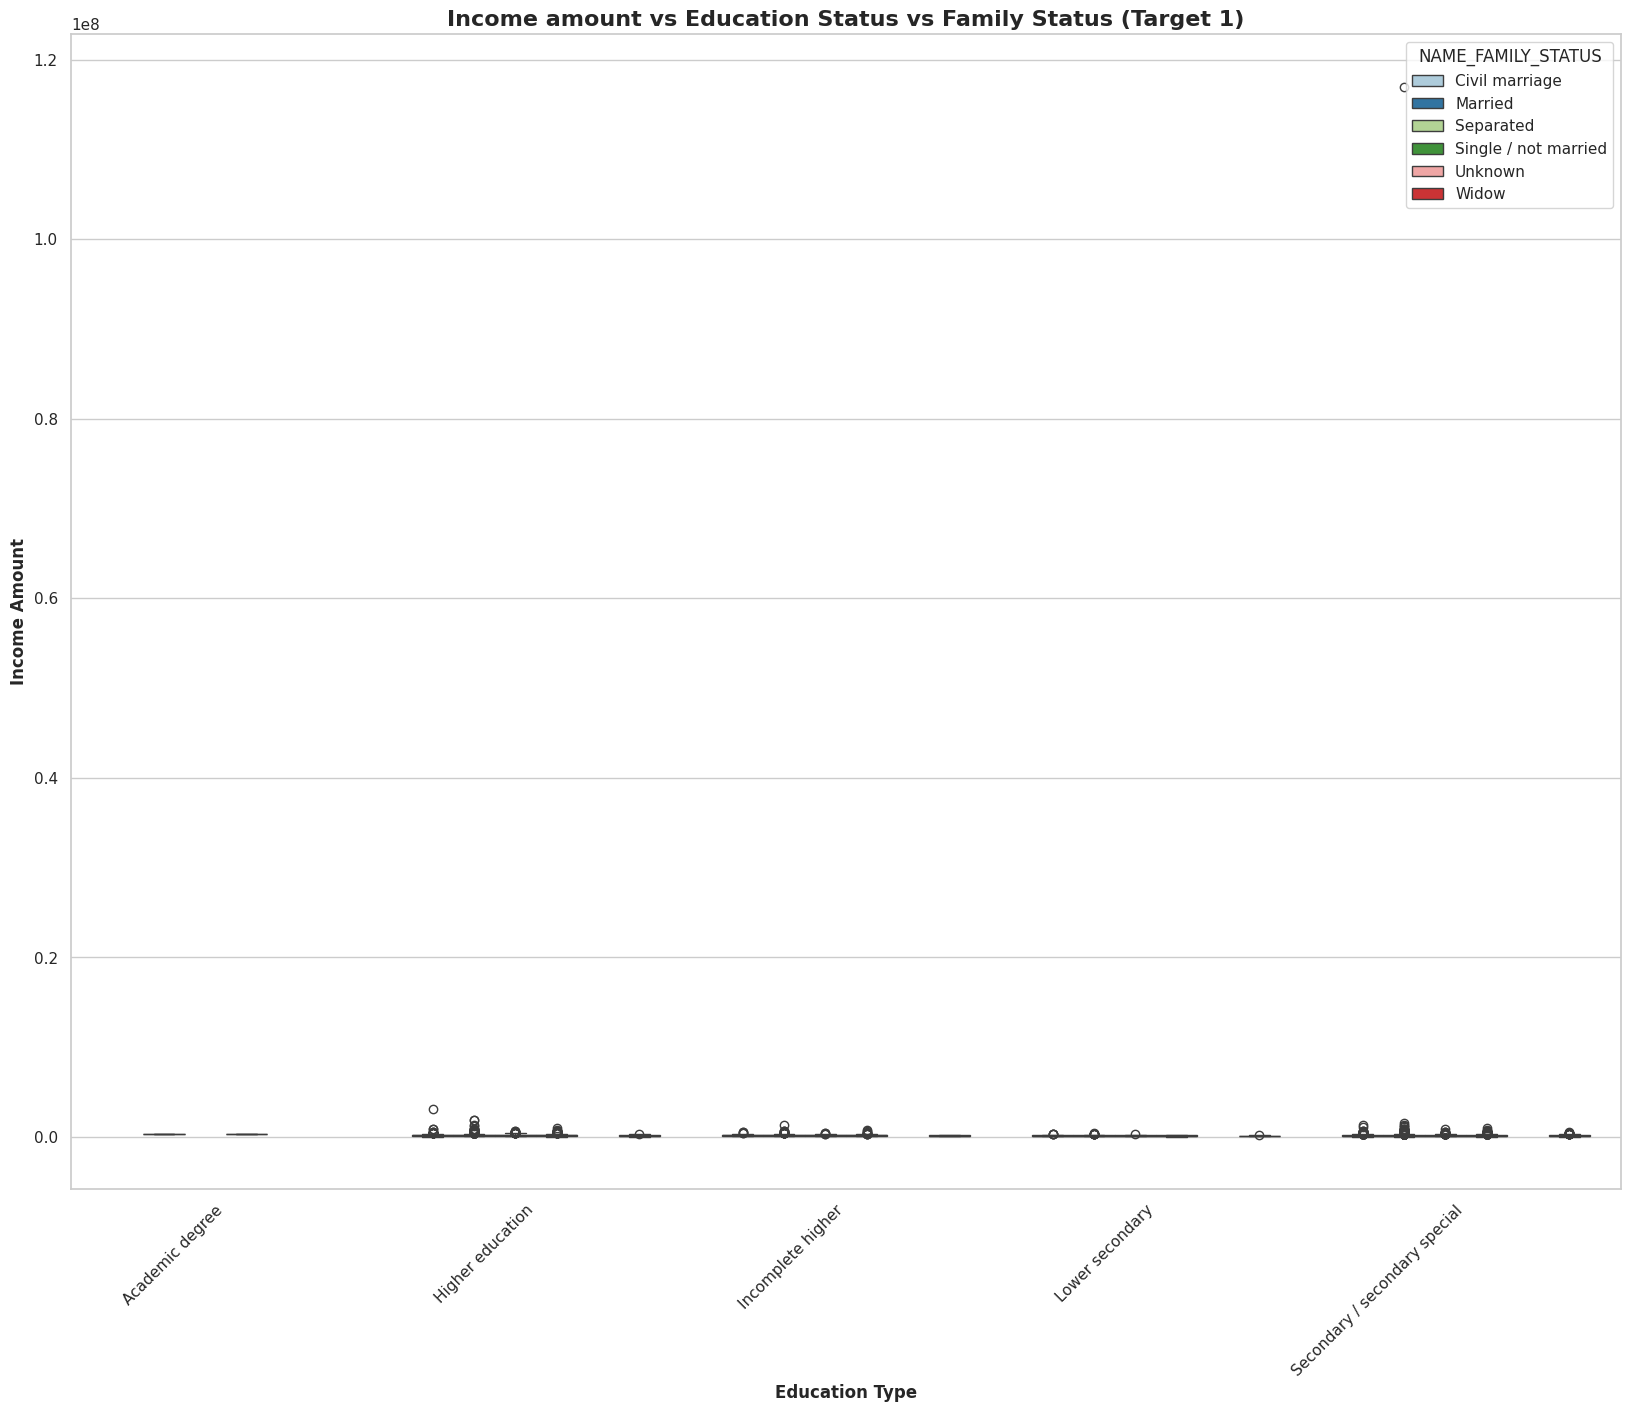

In [ ]:
#boxplot for AMT_INCOME_TOTAL vs NAME_EDUCATION_TYPE vs NAME_FAMILY_STATUS (Target 1)

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(20, 15))

set2 = ad[ad['TARGET'] == 1][['NAME_EDUCATION_TYPE', 'AMT_INCOME_TOTAL', 'NAME_FAMILY_STATUS']]

sns.boxplot(x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL', hue='NAME_FAMILY_STATUS', data=set2, palette='Paired', ax=ax)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel("Education Type", fontsize=12, fontweight="bold")
plt.ylabel("Income Amount", fontsize=12, fontweight="bold")
plt.title('Income amount vs Education Status vs Family Status (Target 1)', fontsize=16, fontweight="bold")
plt.show()


When compared to other clients, married clients with academic degrees earn significantly less money. In comparison to non-defaulters, clients that are in default earn comparatively less money.

Maximum Percentage of Clients with Loan-Payment Difficulties: 100.00%
Categories: ['Pensioner' 'Maternity leave' 'Businessman' 'Working']


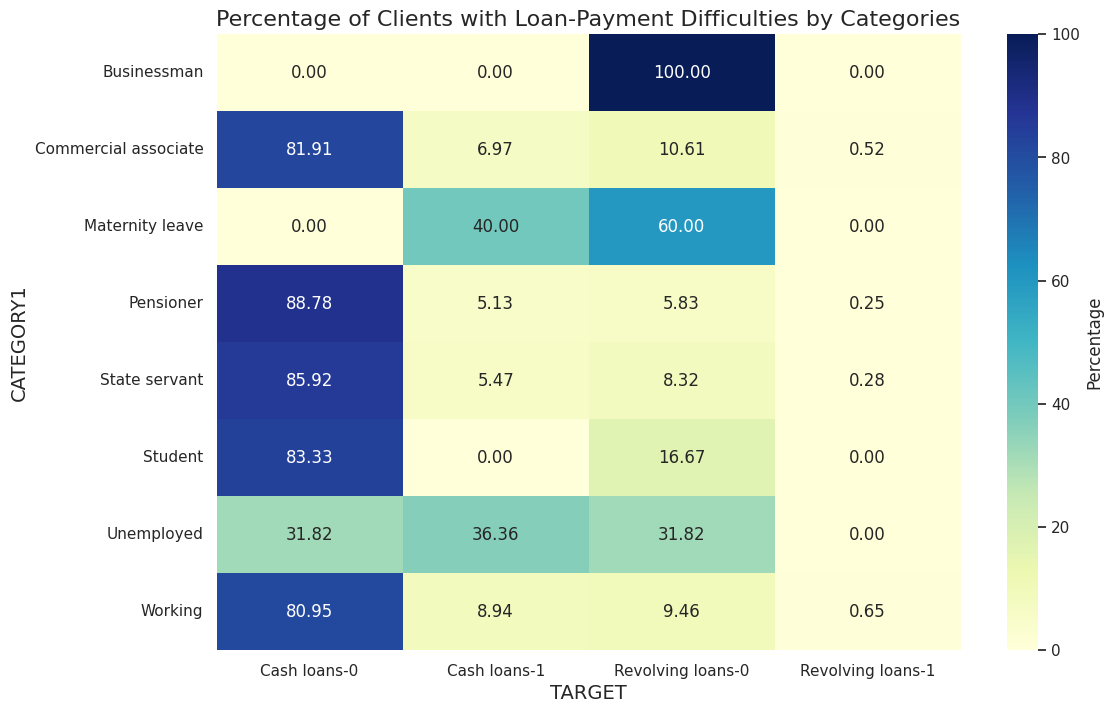

In [ ]:
# Heatmap showing Percentage of Clients with Loan-Payment Difficulties by Categories

cross_tab = pd.crosstab(ad['NAME_INCOME_TYPE'], [ad['NAME_CONTRACT_TYPE'], ad['TARGET']], normalize='index') * 100
max_percentage = cross_tab.max().max()
max_percentage_categories = cross_tab.idxmax().values

print(f'Maximum Percentage of Clients with Loan-Payment Difficulties: {max_percentage:.2f}%')
print(f'Categories: {max_percentage_categories}')

plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt=".2f", cbar_kws={'label': 'Percentage'})
plt.title('Percentage of Clients with Loan-Payment Difficulties by Categories', fontsize=16)
plt.xlabel('TARGET', fontsize=14)
plt.ylabel('CATEGORY1', fontsize=14)
plt.show()


Maximum Percentage of Clients with Loan-Payment Difficulties: 10.93%
Education Type with Maximum Loan-Payment Difficulties: Lower secondary


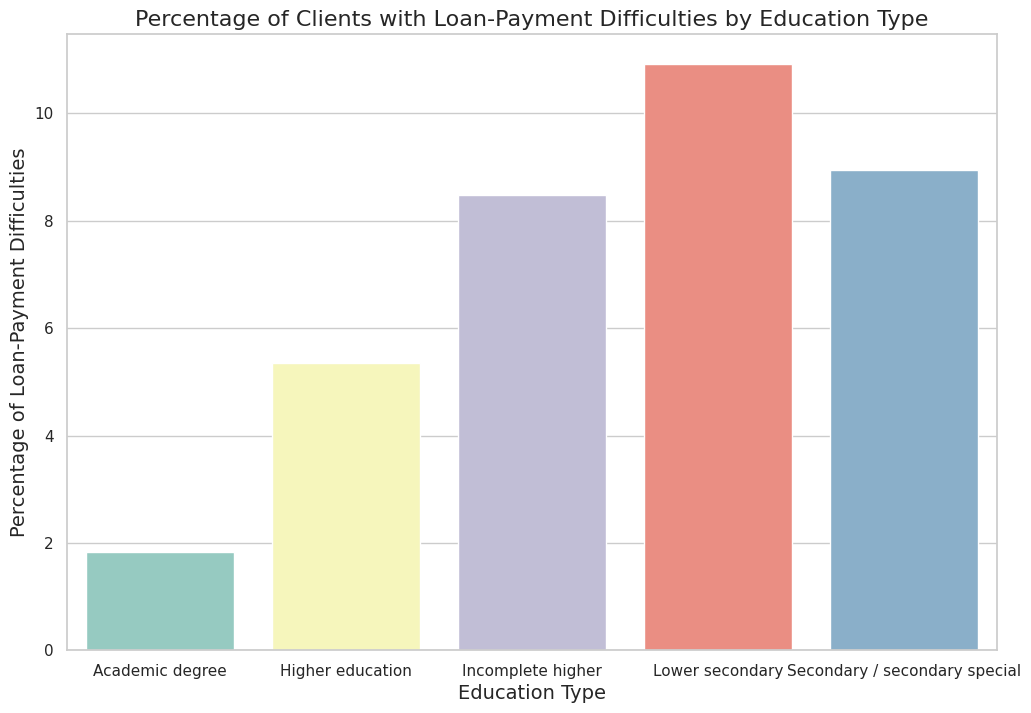

In [ ]:
#barplot of Clients with Loan-Payment Difficulties by Education Type

education_cross_tab = pd.crosstab(ad['NAME_EDUCATION_TYPE'], ad['TARGET'], normalize='index') * 100
max_difficulty_category = education_cross_tab[1].idxmax()
max_difficulty_percentage = education_cross_tab[1].max()

print(f'Maximum Percentage of Clients with Loan-Payment Difficulties: {max_difficulty_percentage:.2f}%')
print(f'Education Type with Maximum Loan-Payment Difficulties: {max_difficulty_category}')

plt.figure(figsize=(12, 8))
sns.barplot(x='NAME_EDUCATION_TYPE', y='TARGET', data=ad,palette='Set3', estimator=lambda x: (x==1).sum() / len(x) * 100, ci=None)
plt.title('Percentage of Clients with Loan-Payment Difficulties by Education Type', fontsize=16)
plt.xlabel('Education Type', fontsize=14)
plt.ylabel('Percentage of Loan-Payment Difficulties', fontsize=14)
plt.show()


Maximum Percentage of Clients with Loan-Payment Difficulties: 12.31%
Housing Type with Maximum Loan-Payment Difficulties: Rented apartment


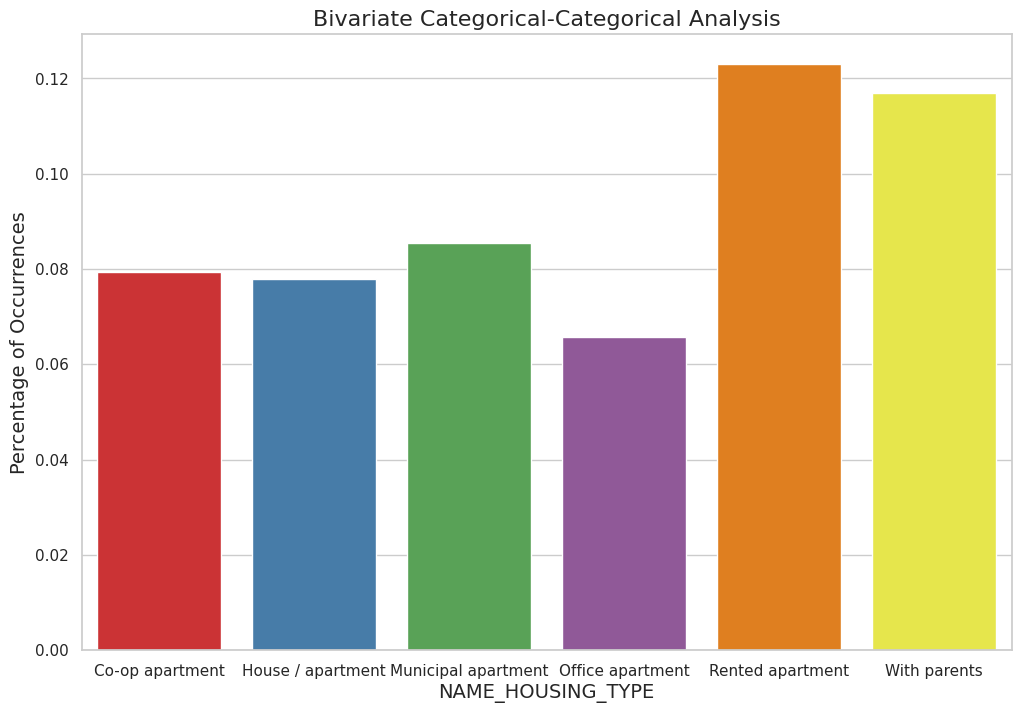

In [ ]:
#barplot of Clients with Loan-Payment Difficulties by Housing Type

housing_cross_tab = pd.crosstab(ad['NAME_HOUSING_TYPE'], ad['TARGET'], normalize='index') * 100
max_difficulty_category = housing_cross_tab[1].idxmax()
max_difficulty_percentage = housing_cross_tab[1].max()

print(f'Maximum Percentage of Clients with Loan-Payment Difficulties: {max_difficulty_percentage:.2f}%')
print(f'Housing Type with Maximum Loan-Payment Difficulties: {max_difficulty_category}')

plt.figure(figsize=(12, 8))
sns.barplot(x='NAME_HOUSING_TYPE', y='TARGET', data=ad, palette='Set1', ci=None)
plt.title('Bivariate Categorical-Categorical Analysis', fontsize=16)
plt.xlabel('NAME_HOUSING_TYPE', fontsize=14)
plt.ylabel('Percentage of Occurrences', fontsize=14)
plt.show()

Maximum Percentage of Clients with Loan-Payment Difficulties: 8.62%
Income Range with Maximum Loan-Payment Difficulties: 100k-150k


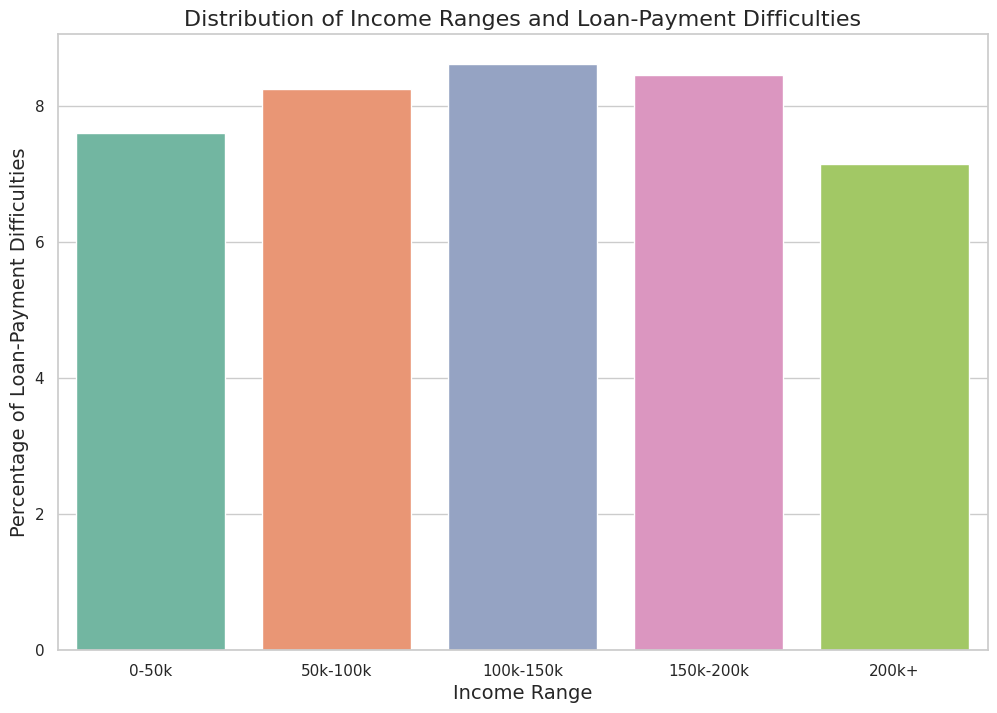

In [ ]:
#Clients with Loan-Payment Difficulties by Income Range

income_bins = [0, 50000, 100000, 150000, 200000, float('inf')]
income_labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k+']

ad['INCOME_RANGE'] = pd.cut(ad['AMT_INCOME_TOTAL'], bins=income_bins, labels=income_labels)
income_cross_tab = pd.crosstab(ad['INCOME_RANGE'], ad['TARGET'], normalize='index') * 100

max_difficulty_category = income_cross_tab[1].idxmax()
max_difficulty_percentage = income_cross_tab[1].max()

print(f'Maximum Percentage of Clients with Loan-Payment Difficulties: {max_difficulty_percentage:.2f}%')
print(f'Income Range with Maximum Loan-Payment Difficulties: {max_difficulty_category}')

plt.figure(figsize=(12, 8))
sns.barplot(x='INCOME_RANGE', y=1, data=income_cross_tab.reset_index(),palette='Set2', ci=None)
plt.title('Distribution of Income Ranges and Loan-Payment Difficulties', fontsize=16)
plt.xlabel('Income Range', fontsize=14)
plt.ylabel('Percentage of Loan-Payment Difficulties', fontsize=14)
plt.show()

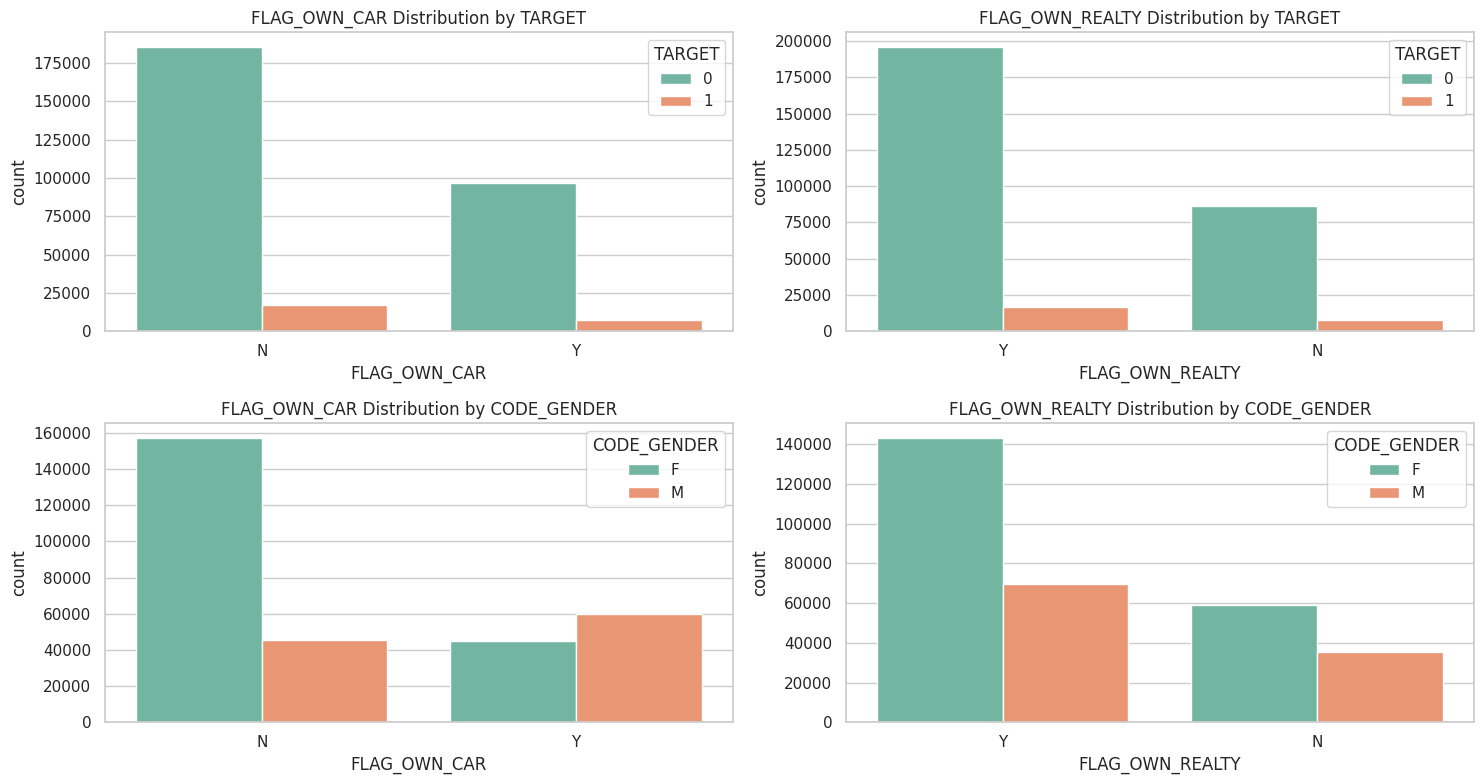

In [ ]:
# count plots for 'FLAG_OWN_CAR' and 'FLAG_OWN_REALTY' with respect to 'TARGET'

plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
sns.countplot(x='FLAG_OWN_CAR', hue='TARGET', data=ad, palette='Set2')
plt.title('FLAG_OWN_CAR Distribution by TARGET')

plt.subplot(2, 2, 2)
sns.countplot(x='FLAG_OWN_REALTY', hue='TARGET', data=ad, palette='Set2')
plt.title('FLAG_OWN_REALTY Distribution by TARGET')

# Plotting count plots for 'FLAG_OWN_CAR' and 'FLAG_OWN_REALTY' with respect to 'CODE_GENDER'
plt.subplot(2, 2, 3)
sns.countplot(x='FLAG_OWN_CAR', hue='CODE_GENDER', data=ad, palette='Set2')
plt.title('FLAG_OWN_CAR Distribution by CODE_GENDER')

plt.subplot(2, 2, 4)
sns.countplot(x='FLAG_OWN_REALTY', hue='CODE_GENDER', data=ad, palette='Set2')
plt.title('FLAG_OWN_REALTY Distribution by CODE_GENDER')

plt.tight_layout()
plt.show()

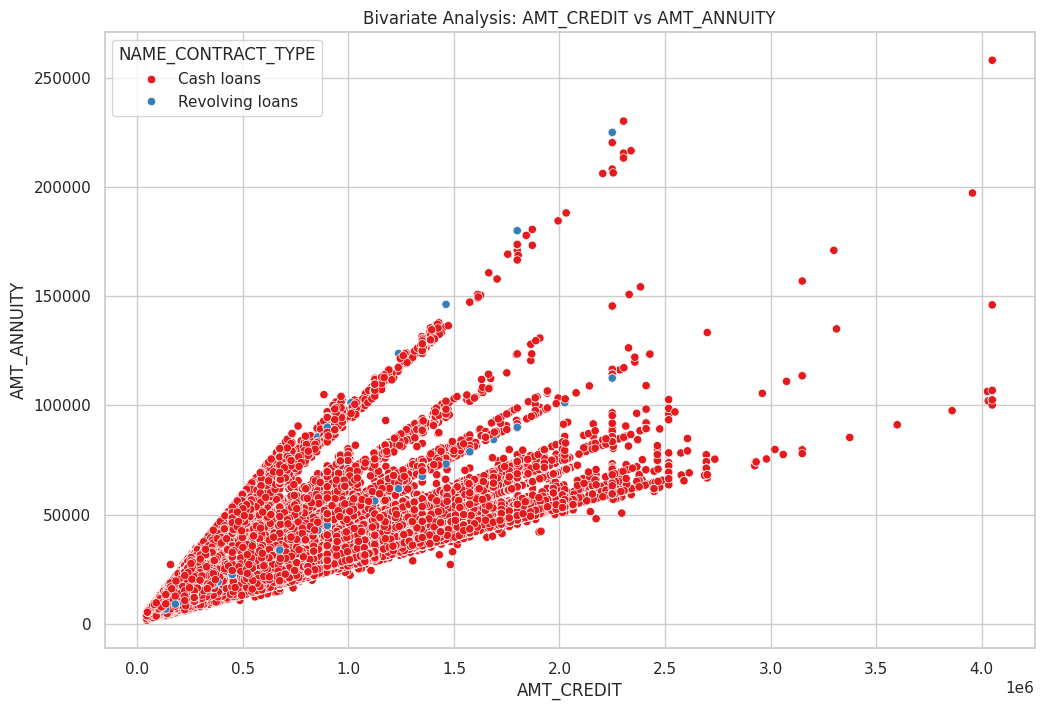

In [ ]:
#AMT_CREDIT vs AMT_ANNUITY using scatterplot

plt.figure(figsize=(12, 8))
sns.scatterplot(x='AMT_CREDIT', y='AMT_ANNUITY', data=ad, hue='NAME_CONTRACT_TYPE', palette='Set1')
plt.title('Bivariate Analysis: AMT_CREDIT vs AMT_ANNUITY')
plt.xlabel('AMT_CREDIT')
plt.ylabel('AMT_ANNUITY')
plt.legend(title='NAME_CONTRACT_TYPE')
plt.show()

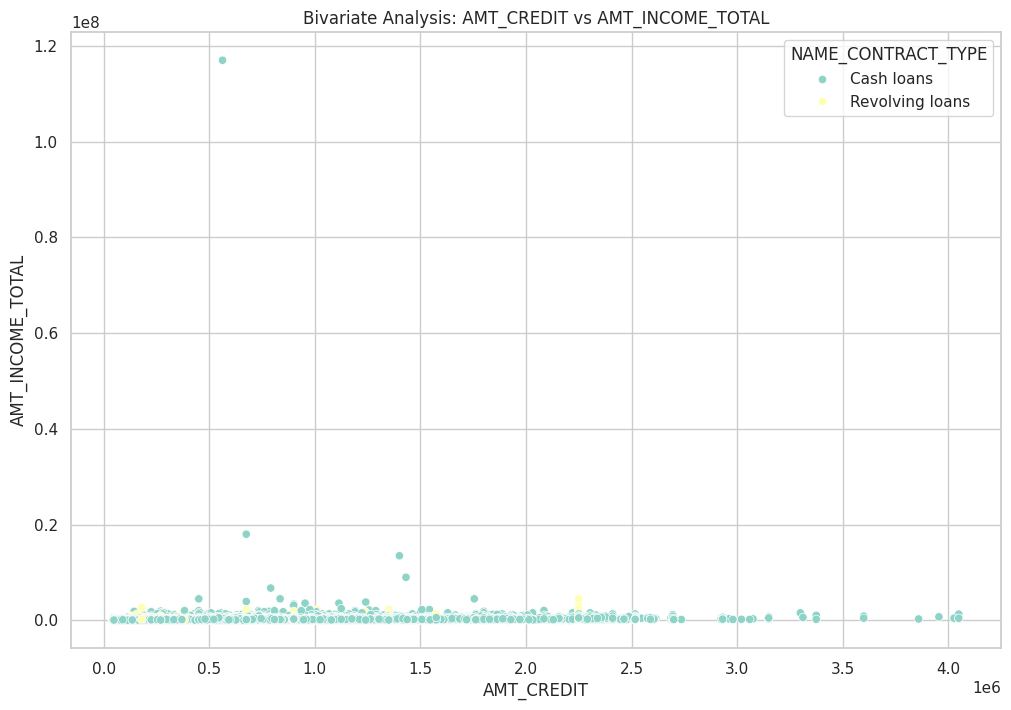

In [ ]:
#Bivariate Analysis: AMT_CREDIT vs AMT_INCOME_TOTAL using scatter plot

plt.figure(figsize=(12, 8))
sns.scatterplot(x='AMT_CREDIT', y='AMT_INCOME_TOTAL', data=ad, hue='NAME_CONTRACT_TYPE', palette='Set3')
plt.title('Bivariate Analysis: AMT_CREDIT vs AMT_INCOME_TOTAL')
plt.xlabel('AMT_CREDIT')
plt.ylabel('AMT_INCOME_TOTAL')
plt.legend(title='NAME_CONTRACT_TYPE')
plt.show()

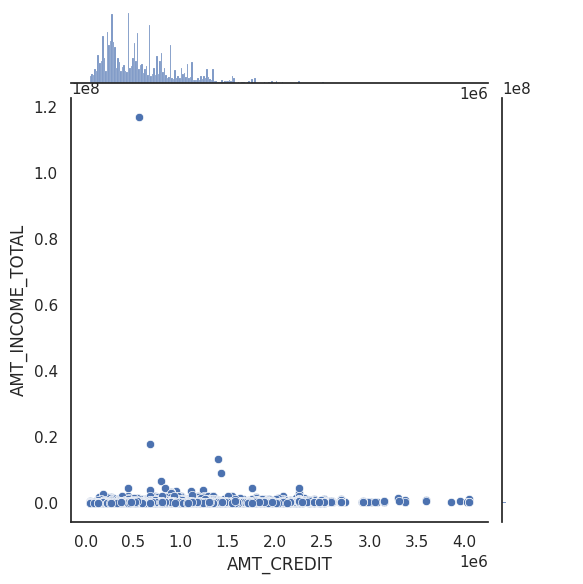

In [ ]:
#jointplot for AMT_CREDIT and AMT_INCOME_TOTAL

sns.set_style("white")
sns.jointplot(x='AMT_CREDIT', y='AMT_INCOME_TOTAL', data=ad)
plt.show()

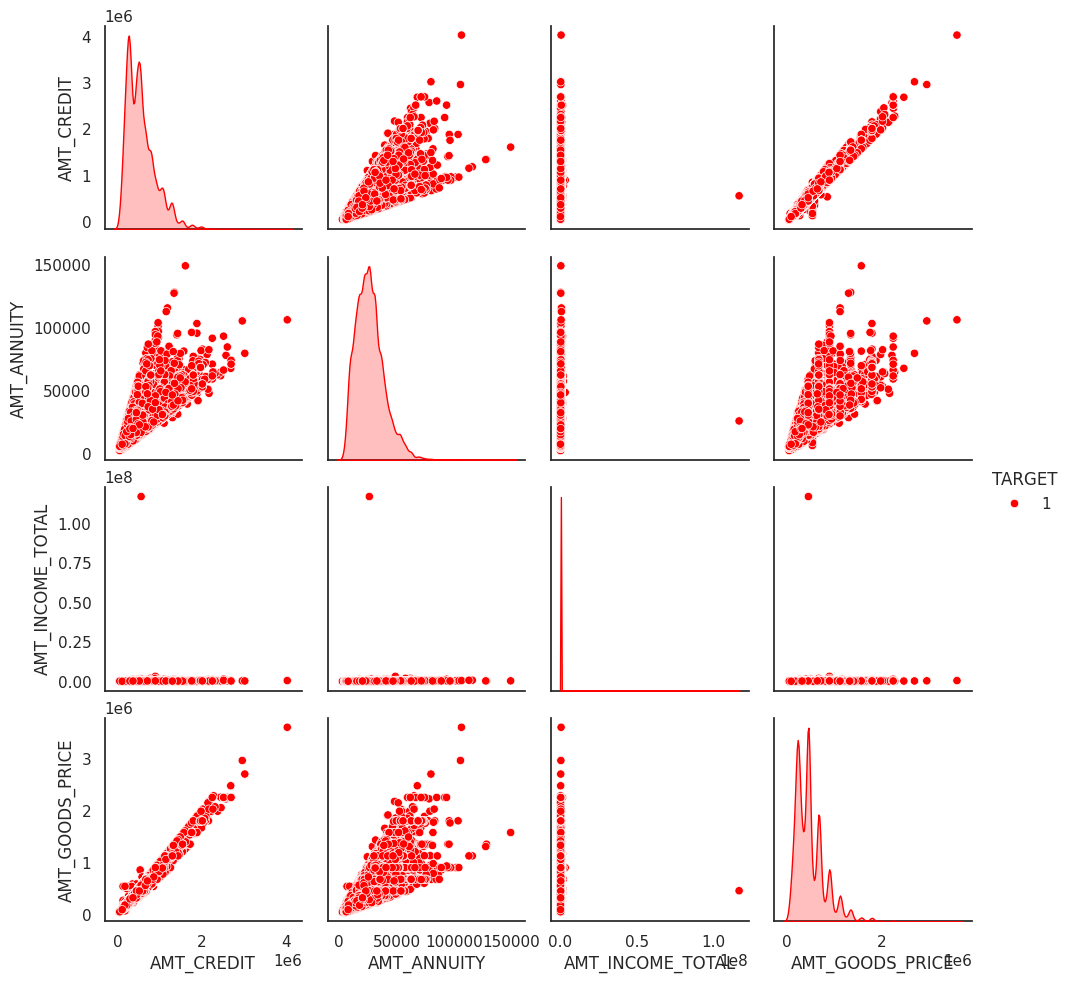

In [ ]:
# correlations- pairplot for TARGET 1

pair = ad[ad['TARGET'] == 1][['TARGET','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE']].fillna(0)
sns.pairplot(pair, hue='TARGET', palette={'red'}, markers=["o"])
plt.show()

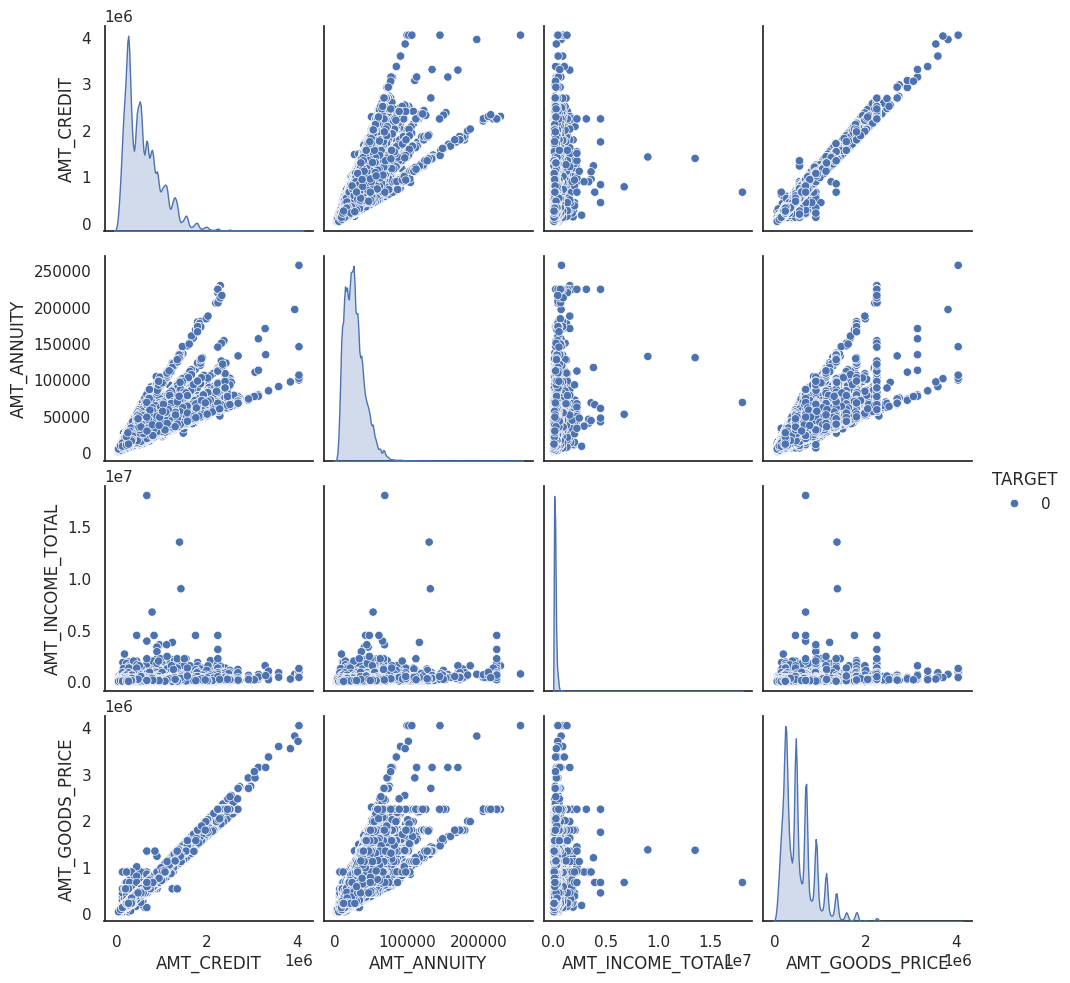

In [ ]:
# correlations- pairplot for TARGET

pair = ad[ad['TARGET'] == 0][['TARGET','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE']].fillna(0)
sns.pairplot(pair, hue='TARGET', markers=["o"])
plt.show()

The variables AMT_CREDIT and AMT_GOODS_PRICE exhibit a strong correlation with both defaulters and non-defaulters. Thus, the loan amount rises in tandem with the price of the residence.
For both defaulters and non-defaulters, there is a strong correlation between the variables AMT_CREDIT and AMT_ANNUITY (EMI). Thus, it makes sense that when the price of a home rises, so does the EMI amount.
The strong correlation between the three variables—AMT_CREDIT, AMT_GOODS_PRICE, and AMT_ANNUITY—for both defaulters and non-defaulters suggests that they may not be useful for identifying defaulters.

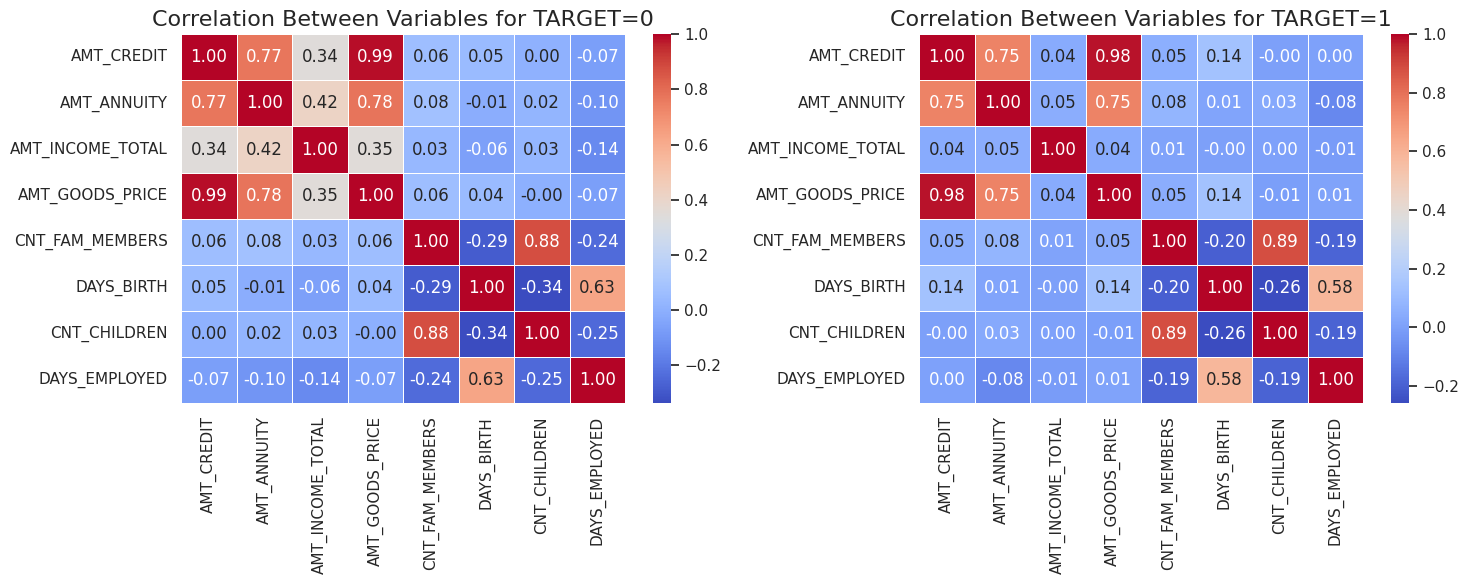

In [ ]:
#plotting heatmap of different variables wrt TARGET

variables = ['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS' , 'DAYS_BIRTH', 'CNT_CHILDREN', 'DAYS_EMPLOYED']

correlation_target0 = ad[ad['TARGET'] == 0][variables]
correlation_target1 = ad[ad['TARGET'] == 1][variables]

correlation_matrix_target0 = correlation_target0.corr()
correlation_matrix_target1 = correlation_target1.corr()

plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1)
sns.heatmap(correlation_matrix_target0, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Between Variables for TARGET=0', fontsize=16)

plt.subplot(1, 2, 2)
sns.heatmap(correlation_matrix_target1, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Between Variables for TARGET=1', fontsize=16)

plt.tight_layout()
plt.show()

AMT_CREDIT is inversely correlated with DAYS_BIRTH; individuals in the lower age group tend to take out larger credit amounts, and vice versa. Because AMT_CREDIT and CNT_CHILDREN are negatively correlated, clients with fewer children have larger credit amounts, and vice versa. Since AMT_INCOME_TOTAL and CNT_CHILDREN are inversely correlated, clients with fewer children will have higher incomes, and vice versa.

**Now let's see the previous application data set**

In [ ]:
pa.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [ ]:
pa.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       ...  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  \
count  ...               5951.000000   1.670214e+06      1.670214e+06   
mean   ...                  0.773503  -8.806797e+02      3.139511e+02   
std    ...                  0.100879   7.790997e+02      7.127443e+03   
min    ...                  0.373150  -2.922000e+03     -1.000000e+00   
25%    ...                  0.715645  -1.300000e+03     -1.000000e+00   
50%    ...                  0.835095  -5.810000e+02      3.000000e+00   
75%    ...                  0.852537  -2.800000e+02      8.200000e+01   
max    ...                  1.000000  -1.000000e+00      4.000000e+06   

        CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  1.297984e+06       997149.000000   997149.000000   
mean   1.605408e+01       342209.855039    13826.269337   
std    1.456729e+01        88916.115833    72444.869708   
min    0.000000e+00        -2922.000000    -2892.000000   
25%    6.000000e+00       365243.000000    -1628.000000   
50%    1.200000e+01       365243.000000     -831.000000   
75%    2.400000e+01       365243.000000     -411.000000   
max    8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000  

[8 rows x 21 columns]

In [ ]:
pa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [ ]:
pa.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [ ]:
# dealing with missing values
#dropping those columns where missing percentage is greater than 35
missing_values = (pa.isnull().sum() / pa.shape[0]) * 100
drop_columns = missing_values[missing_values > 35].index
pa = pa.drop(columns=drop_columns)

In [ ]:
pa.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION               346
dtype: int64

In [ ]:
pa['AMT_ANNUITY'].fillna(pa['AMT_ANNUITY'].mean(), inplace=True)

In [ ]:
pa['AMT_GOODS_PRICE'].fillna(pa['AMT_GOODS_PRICE'].mean(), inplace=True)

In [ ]:
pa['CNT_PAYMENT'].fillna(pa['CNT_PAYMENT'].mean(), inplace=True)

In [ ]:
pa['AMT_CREDIT'].fillna(pa['AMT_CREDIT'].mean(), inplace=True)

In [ ]:
pa.isnull().sum()

SK_ID_PREV                       0
SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
AMT_ANNUITY                      0
AMT_APPLICATION                  0
AMT_CREDIT                       0
AMT_GOODS_PRICE                  0
WEEKDAY_APPR_PROCESS_START       0
HOUR_APPR_PROCESS_START          0
FLAG_LAST_APPL_PER_CONTRACT      0
NFLAG_LAST_APPL_IN_DAY           0
NAME_CASH_LOAN_PURPOSE           0
NAME_CONTRACT_STATUS             0
DAYS_DECISION                    0
NAME_PAYMENT_TYPE                0
CODE_REJECT_REASON               0
NAME_CLIENT_TYPE                 0
NAME_GOODS_CATEGORY              0
NAME_PORTFOLIO                   0
NAME_PRODUCT_TYPE                0
CHANNEL_TYPE                     0
SELLERPLACE_AREA                 0
NAME_SELLER_INDUSTRY             0
CNT_PAYMENT                      0
NAME_YIELD_GROUP                 0
PRODUCT_COMBINATION            346
dtype: int64

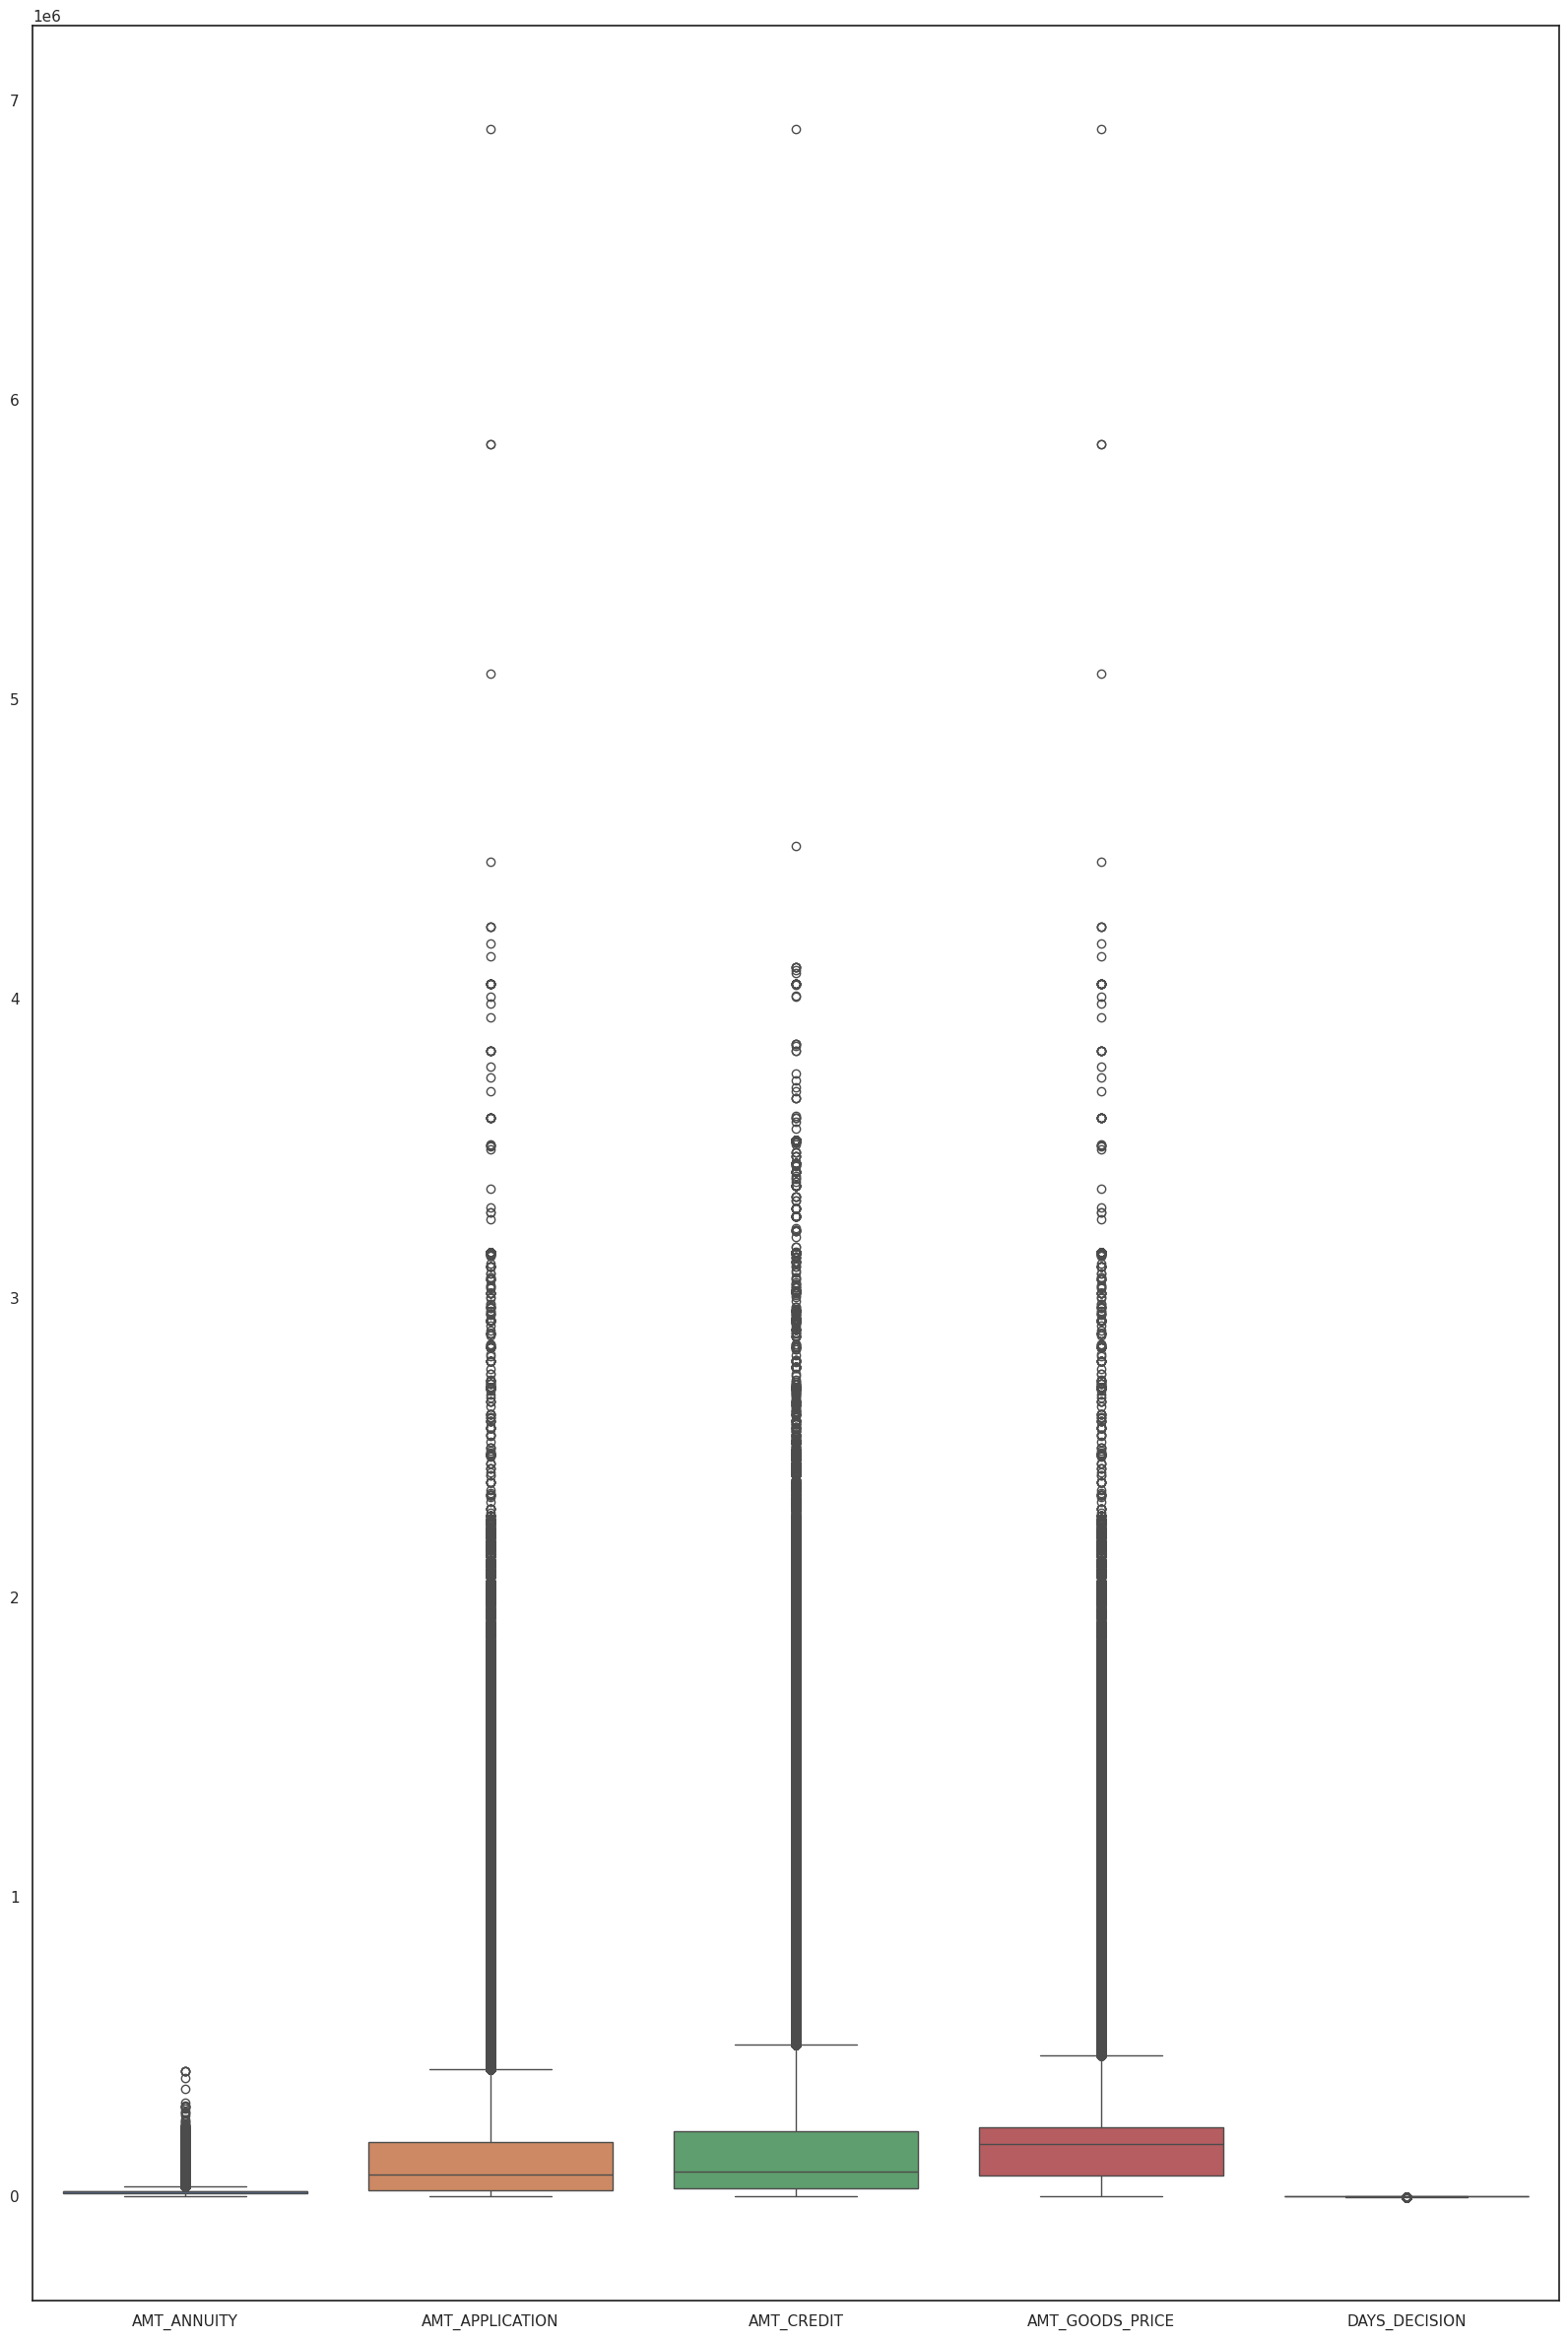

In [ ]:
#boxplot for 'AMT_ANNUITY','AMT_APPLICATION' ,'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_DECISION'

plt.figure(figsize=[20,30])
pa_col = ['AMT_ANNUITY','AMT_APPLICATION' ,'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_DECISION']
sns.boxplot(data=pa[pa_col])
plt.show()

As we can see there are lot of outliers.

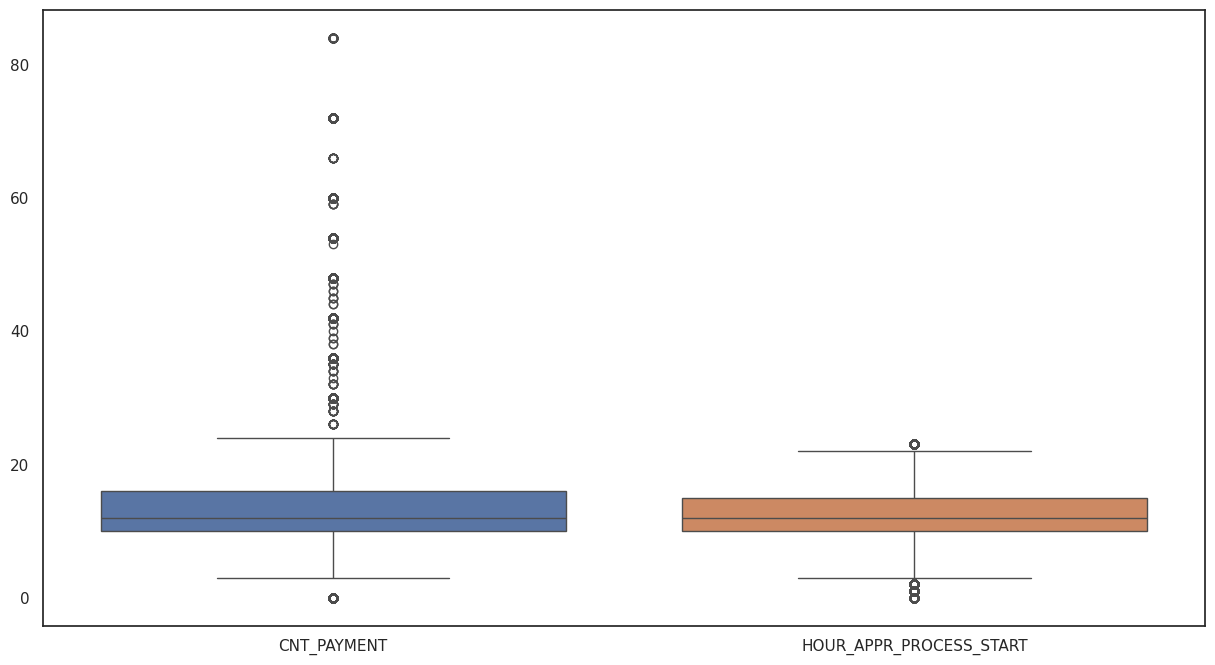

In [ ]:
#boxplot for 'CNT_PAYMENT','HOUR_APPR_PROCESS_START'

plt.figure(figsize=[15,8])
pas_col = ['CNT_PAYMENT','HOUR_APPR_PROCESS_START' ]
sns.boxplot(data=pa[pas_col])
plt.show()

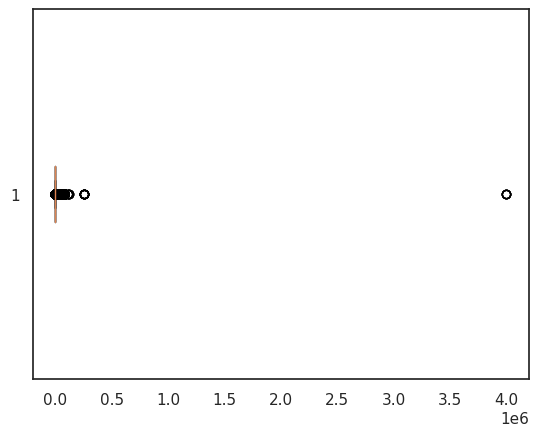

In [ ]:
#boxplot for SELLERPLACE_AREA
plt.boxplot(pa.SELLERPLACE_AREA, vert=False)
plt.show()

In [ ]:
#changing the dtype to category

pa['NAME_CONTRACT_TYPE'] = pa['NAME_CONTRACT_TYPE'].astype('category')
pa['NAME_CASH_LOAN_PURPOSE'] = pa['NAME_CASH_LOAN_PURPOSE'].astype('category')
pa['NAME_CONTRACT_STATUS'] = pa['NAME_CONTRACT_STATUS'].astype('category')
pa['NAME_PAYMENT_TYPE'] = pa['NAME_PAYMENT_TYPE'].astype('category')
pa['CODE_REJECT_REASON'] = pa['CODE_REJECT_REASON'].astype('category')
pa['NAME_CLIENT_TYPE'] = pa['NAME_CLIENT_TYPE'].astype('category')
pa['NAME_SELLER_INDUSTRY'] = pa['NAME_SELLER_INDUSTRY'].astype('category')
pa['NAME_GOODS_CATEGORY'] = pa['NAME_GOODS_CATEGORY'].astype('category')
pa['NAME_YIELD_GROUP'] = pa['NAME_YIELD_GROUP'].astype('category')
pa['PRODUCT_COMBINATION'] = pa['PRODUCT_COMBINATION'].astype('category')

In [ ]:
pa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_PREV                   1670214 non-null  int64   
 1   SK_ID_CURR                   1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE           1670214 non-null  category
 3   AMT_ANNUITY                  1670214 non-null  float64 
 4   AMT_APPLICATION              1670214 non-null  float64 
 5   AMT_CREDIT                   1670214 non-null  float64 
 6   AMT_GOODS_PRICE              1670214 non-null  float64 
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object  
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64   
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object  
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64   
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  category
 12  NAME_CONTRACT_STATUS        

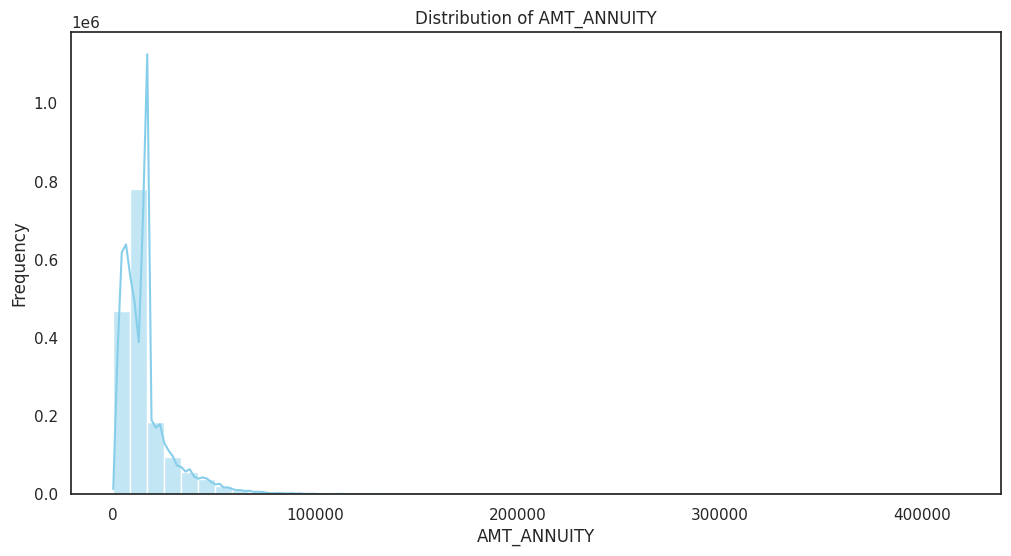

In [ ]:
#Distribution of 'AMT_ANNUITY'

plt.figure(figsize=(12, 6))
sns.histplot(pa['AMT_ANNUITY'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of AMT_ANNUITY')
plt.xlabel('AMT_ANNUITY')
plt.ylabel('Frequency')
plt.show()

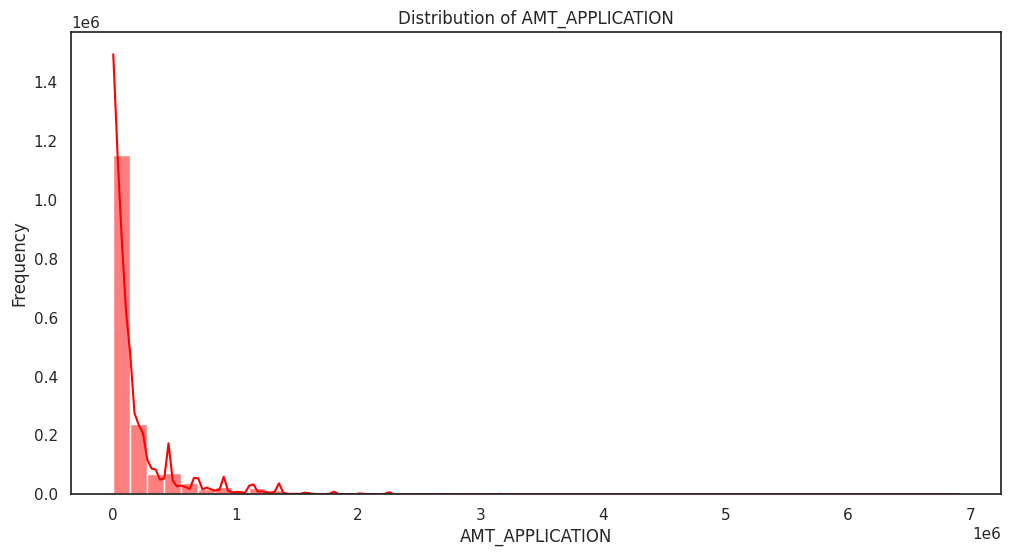

In [ ]:
#Distribution of AMT_APPLICATION

plt.figure(figsize=(12, 6))
sns.histplot(pa['AMT_APPLICATION'], bins=50, kde=True, color='red')
plt.title('Distribution of AMT_APPLICATION')
plt.xlabel('AMT_APPLICATION')
plt.ylabel('Frequency')
plt.show()

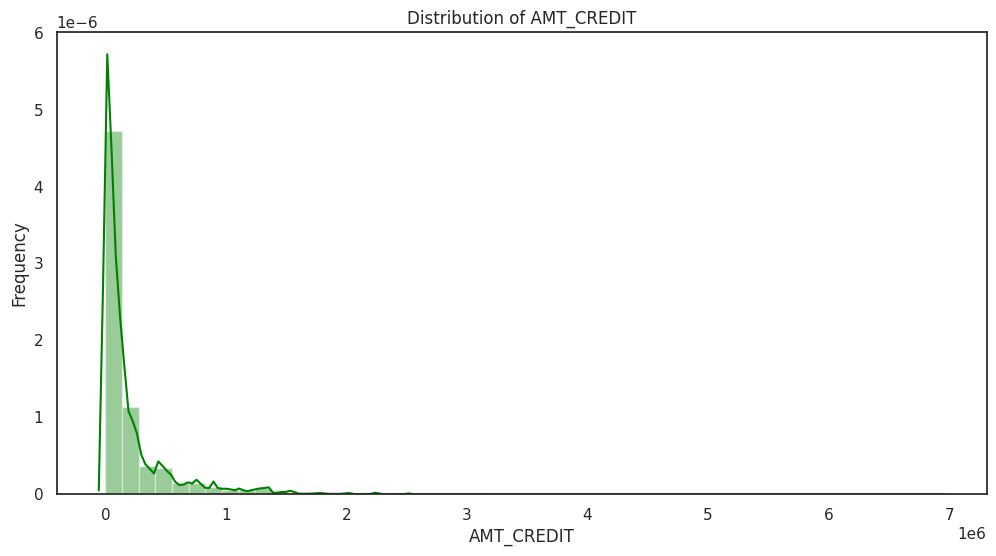

In [ ]:
#Distribution of AMT_CREDIT

plt.figure(figsize=(12, 6))
sns.distplot(pa['AMT_CREDIT'], bins=50, kde=True, color='green')
plt.title('Distribution of AMT_CREDIT')
plt.xlabel('AMT_CREDIT')
plt.ylabel('Frequency')
plt.show()

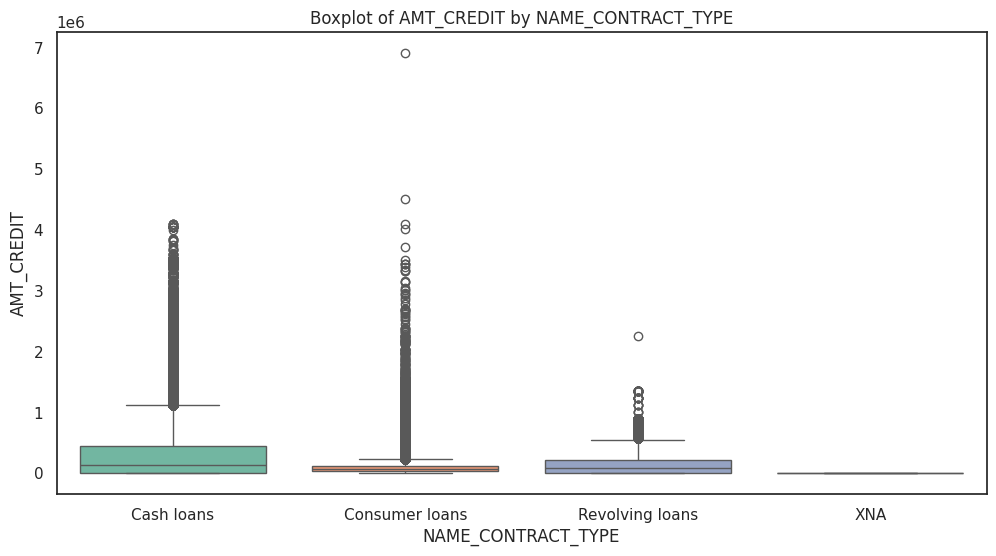

In [ ]:
#Boxplot for 'AMT_CREDIT' by 'NAME_CONTRACT_TYPE'

plt.figure(figsize=(12, 6))
sns.boxplot(x='NAME_CONTRACT_TYPE', y='AMT_CREDIT', data=pa, palette='Set2')
plt.title('Boxplot of AMT_CREDIT by NAME_CONTRACT_TYPE')
plt.show()

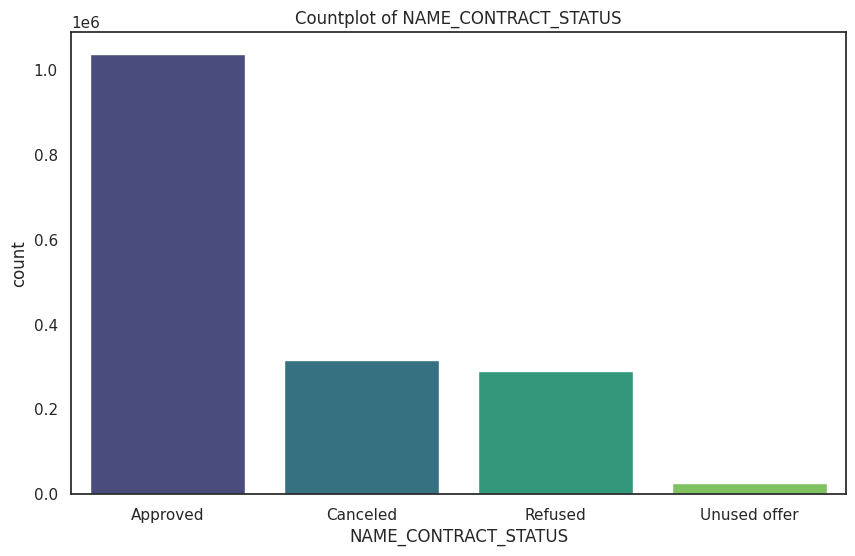

In [ ]:
#Countplot for 'NAME_CONTRACT_STATUS'

plt.figure(figsize=(10, 6))
sns.countplot(x='NAME_CONTRACT_STATUS', data=pa, palette='viridis')
plt.title('Countplot of NAME_CONTRACT_STATUS')
plt.show()

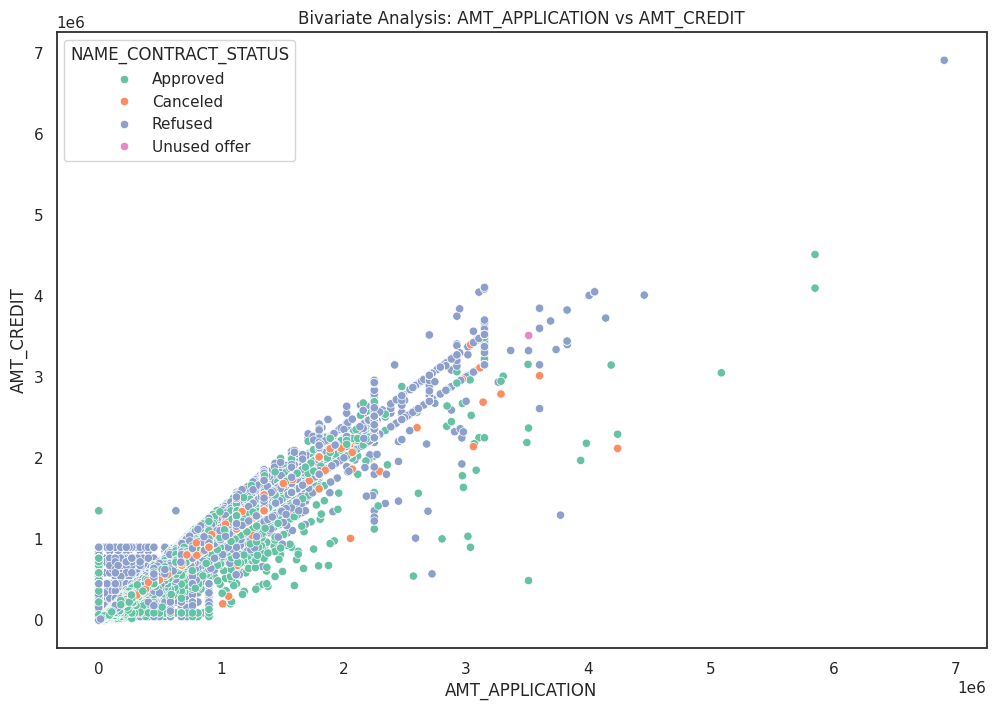

In [ ]:
#Scatter plot for 'AMT_APPLICATION' vs 'AMT_CREDIT'

plt.figure(figsize=(12, 8))
sns.scatterplot(x='AMT_APPLICATION', y='AMT_CREDIT', data=pa, hue='NAME_CONTRACT_STATUS', palette='Set2')
plt.title('Bivariate Analysis: AMT_APPLICATION vs AMT_CREDIT')
plt.xlabel('AMT_APPLICATION')
plt.ylabel('AMT_CREDIT')
plt.legend(title='NAME_CONTRACT_STATUS')
plt.show()

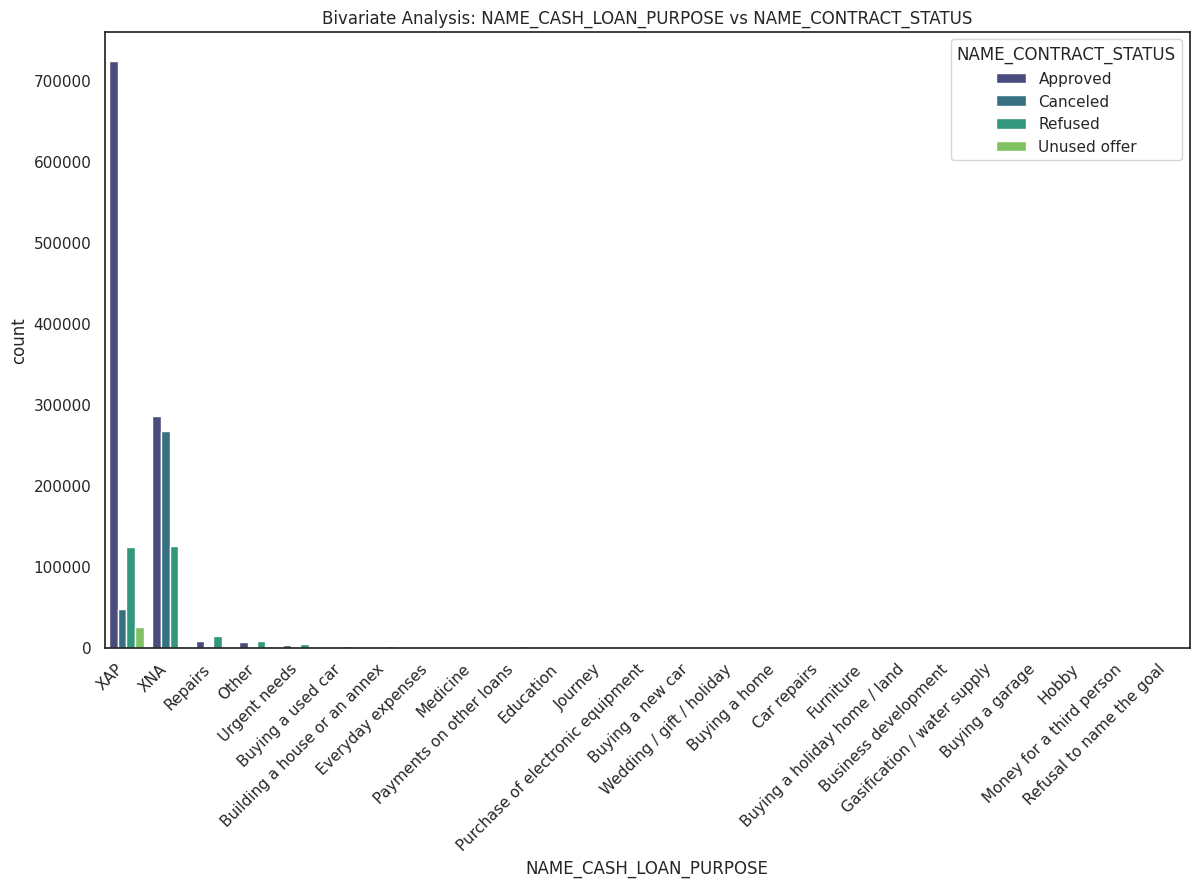

In [ ]:
#Countplot for 'NAME_CONTRACT_STATUS' by 'NAME_CASH_LOAN_PURPOSE'

plt.figure(figsize=(14, 8))
sns.countplot(x='NAME_CASH_LOAN_PURPOSE', hue='NAME_CONTRACT_STATUS', data=pa, palette='viridis', order=pa['NAME_CASH_LOAN_PURPOSE'].value_counts().index)
plt.title('Bivariate Analysis: NAME_CASH_LOAN_PURPOSE vs NAME_CONTRACT_STATUS')
plt.xticks(rotation=45, ha='right')
plt.show()

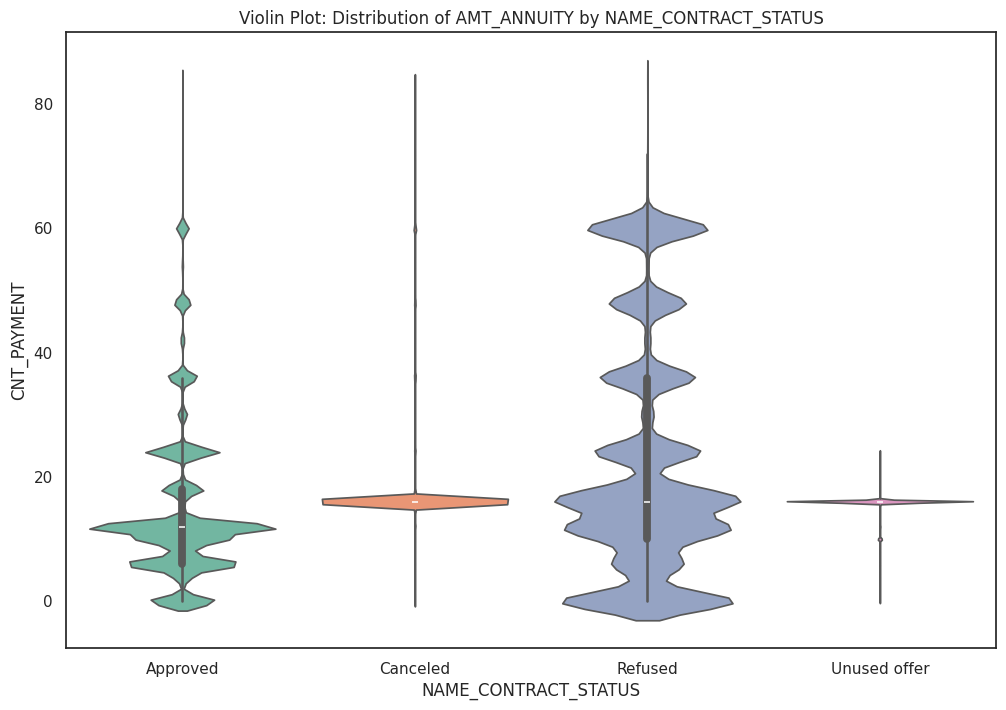

In [ ]:
#Violin Plot: Distribution of AMT_ANNUITY by NAME_CONTRACT_STATUS

plt.figure(figsize=(12, 8))
sns.violinplot(x='NAME_CONTRACT_STATUS', y='CNT_PAYMENT', data=pa, palette='Set2')
plt.title('Violin Plot: Distribution of AMT_ANNUITY by NAME_CONTRACT_STATUS')
plt.show()

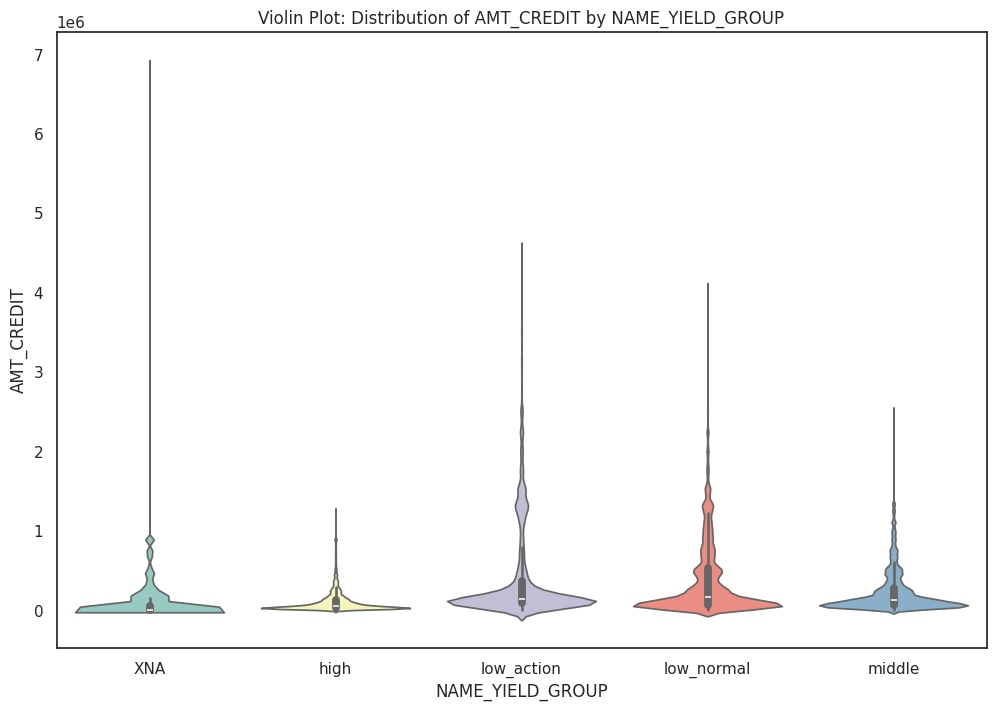

In [ ]:
# Violin Plot: Distribution of 'AMT_CREDIT' by 'NAME_YIELD_GROUP'

plt.figure(figsize=(12, 8))
sns.violinplot(x='NAME_YIELD_GROUP', y='AMT_CREDIT', data=pa, palette='Set3')
plt.title('Violin Plot: Distribution of AMT_CREDIT by NAME_YIELD_GROUP')
plt.show()

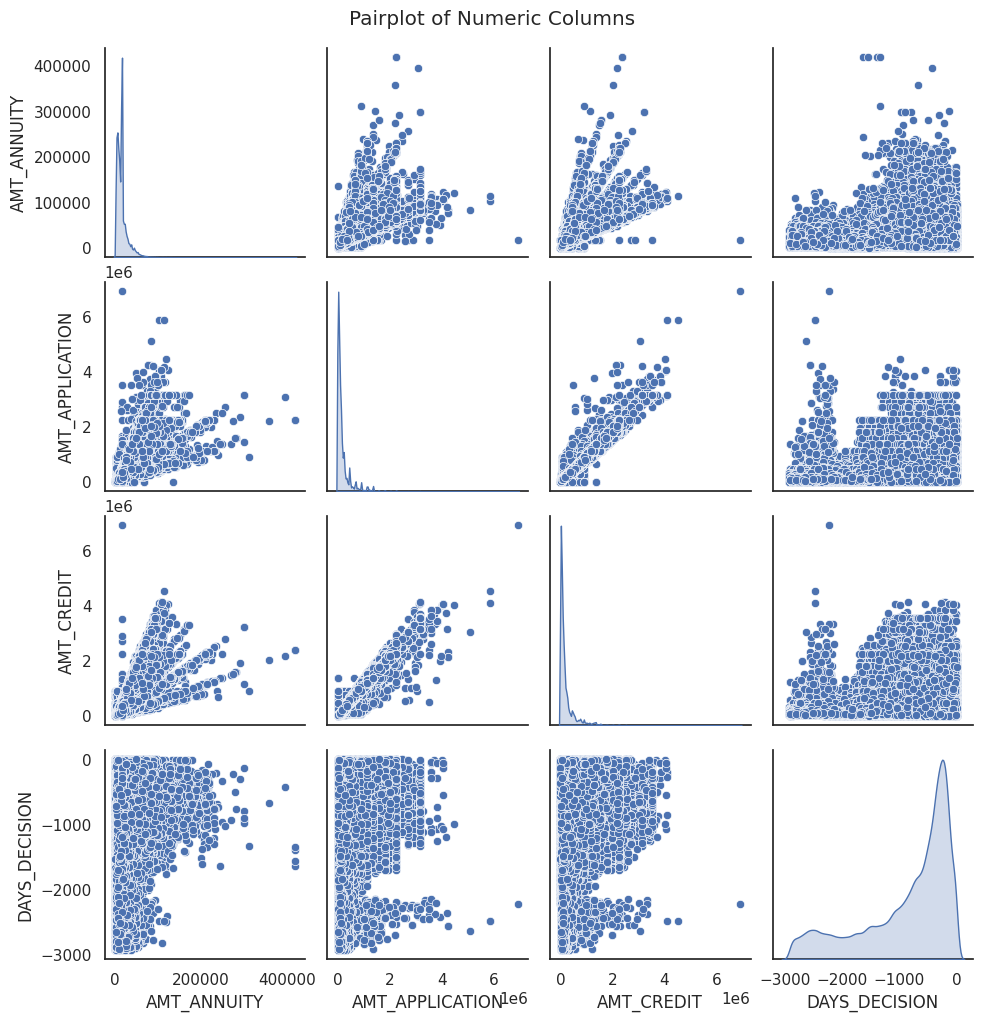

In [ ]:
#pairplot of selected numeric columns

numeric_cols = ['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'DAYS_DECISION']
sns.pairplot(pa[numeric_cols], diag_kind='kde')
plt.suptitle('Pairplot of Numeric Columns', y=1.02)
plt.show()

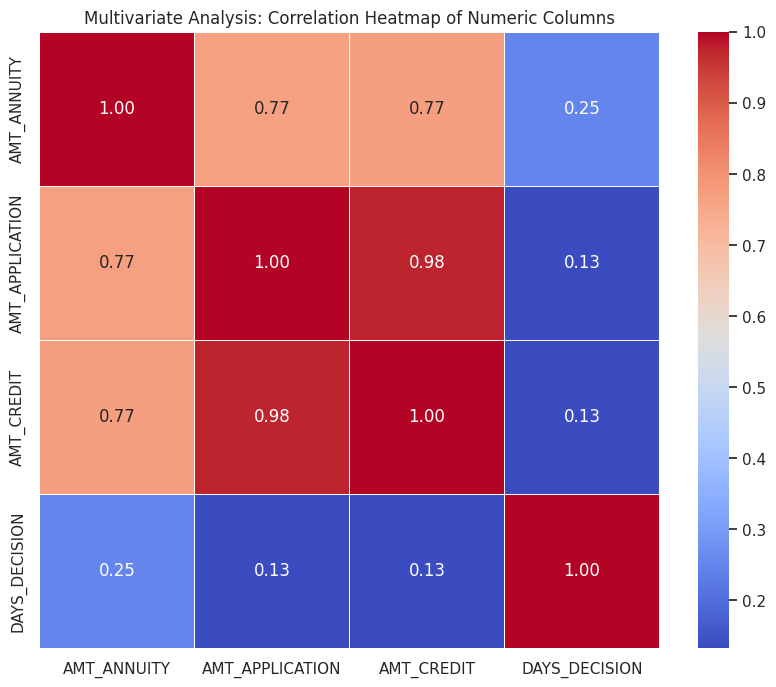

In [ ]:
#Heatmap for correlation matrix of selected numeric columns

numeric_cols = ['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'DAYS_DECISION']
corr_matrix = pa[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Multivariate Analysis: Correlation Heatmap of Numeric Columns')
plt.show()

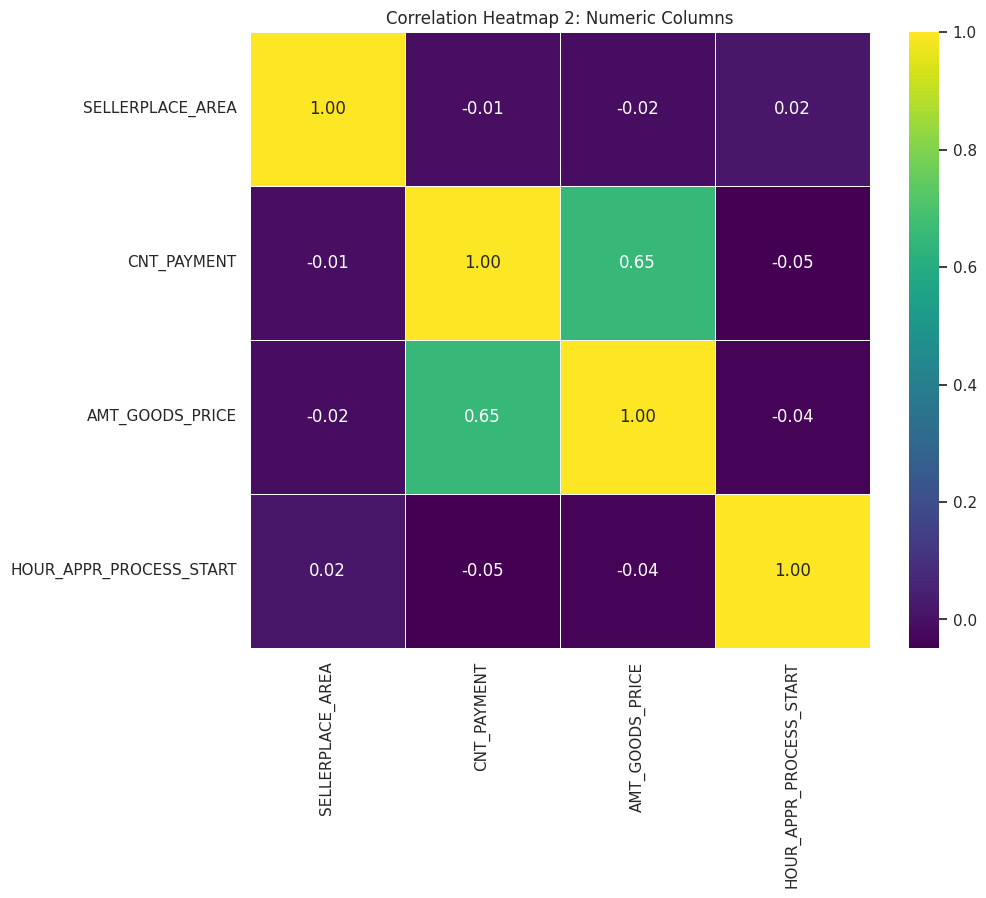

In [ ]:
#Heatmap for selected numeric columns

numeric_cols_2 = ['SELLERPLACE_AREA', 'CNT_PAYMENT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START']
corr_matrix_2 = pa[numeric_cols_2].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_2, annot=True, cmap='viridis', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap 2: Numeric Columns')
plt.show()

**Let's merged the both dataframe and named it merged_df**

In [ ]:
merged_df = pd.merge(ad, pa, on='SK_ID_CURR', how='inner')

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 99 columns):
 #   Column                        Non-Null Count    Dtype   
---  ------                        --------------    -----   
 0   SK_ID_CURR                    1413701 non-null  int64   
 1   TARGET                        1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_x          1413701 non-null  category
 3   CODE_GENDER                   1413701 non-null  category
 4   FLAG_OWN_CAR                  1413701 non-null  object  
 5   FLAG_OWN_REALTY               1413701 non-null  object  
 6   CNT_CHILDREN                  1413701 non-null  int64   
 7   AMT_INCOME_TOTAL              1413701 non-null  float64 
 8   AMT_CREDIT_x                  1413701 non-null  float64 
 9   AMT_ANNUITY_x                 1413701 non-null  float64 
 10  AMT_GOODS_PRICE_x             1413701 non-null  float64 
 11  NAME_TYPE_SUITE               1413701 non-null  category
 12  NAME_INCOME_TY

In [ ]:
merged_df.isnull().sum()

SK_ID_CURR                0
TARGET                    0
NAME_CONTRACT_TYPE_x      0
CODE_GENDER               0
FLAG_OWN_CAR              0
                       ... 
SELLERPLACE_AREA          0
NAME_SELLER_INDUSTRY      0
CNT_PAYMENT               0
NAME_YIELD_GROUP          0
PRODUCT_COMBINATION     313
Length: 99, dtype: int64

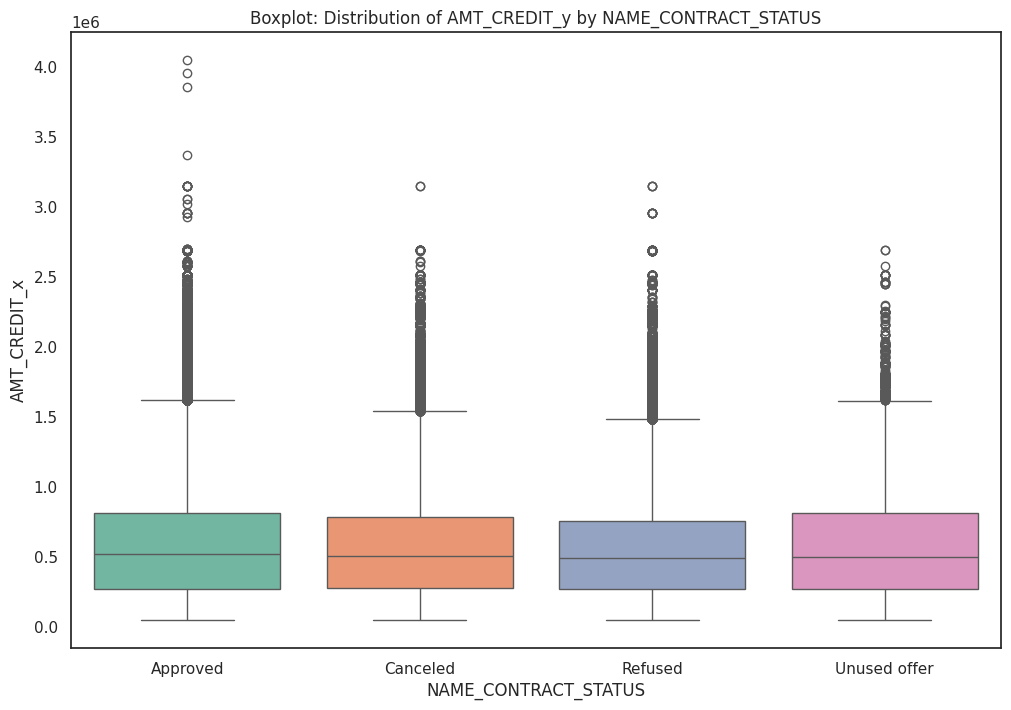

In [ ]:
#boxplot for AMT_CREDIT_y by NAME_CONTRACT_STATUS
plt.figure(figsize=(12, 8))
sns.boxplot(x='NAME_CONTRACT_STATUS', y='AMT_CREDIT_x', data=merged_df, palette='Set2')
plt.title('Boxplot: Distribution of AMT_CREDIT_y by NAME_CONTRACT_STATUS')
plt.show()

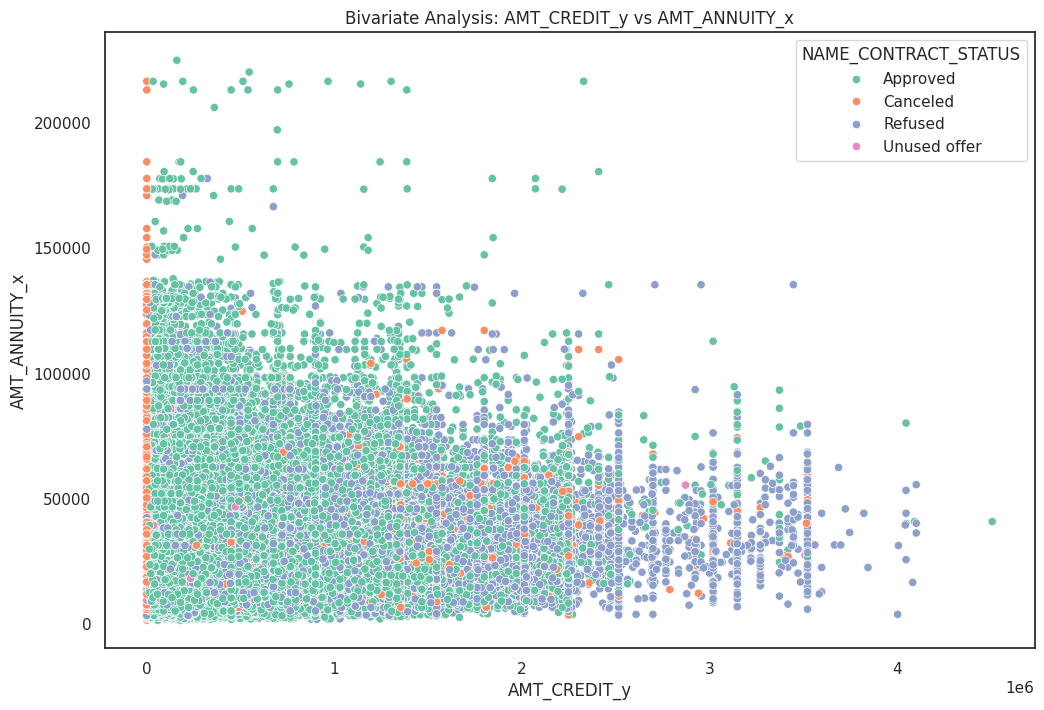

In [ ]:
#Bivariate Analysis: AMT_CREDIT_y vs AMT_ANNUITY_x using scatter plot

plt.figure(figsize=(12, 8))
sns.scatterplot(x='AMT_CREDIT_y', y='AMT_ANNUITY_x', data=merged_df, hue='NAME_CONTRACT_STATUS', palette='Set2')
plt.title('Bivariate Analysis: AMT_CREDIT_y vs AMT_ANNUITY_x')
plt.xlabel('AMT_CREDIT_y')
plt.ylabel('AMT_ANNUITY_x')
plt.legend(title='NAME_CONTRACT_STATUS')
plt.show()

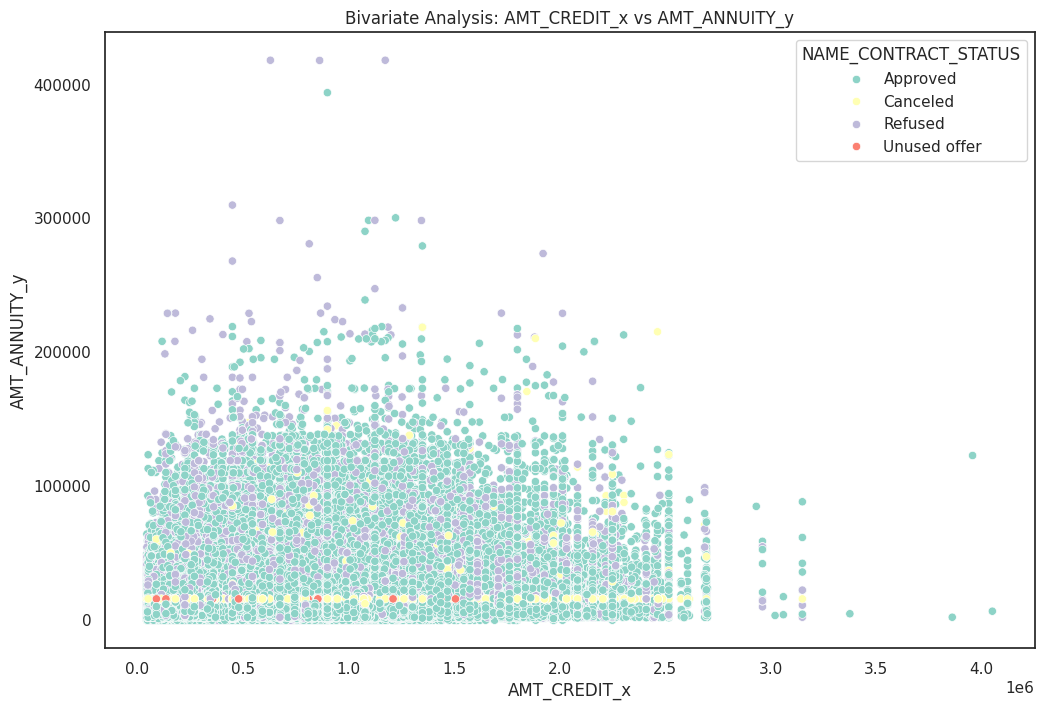

In [ ]:
#Bivariate Analysis: AMT_CREDIT_x vs AMT_ANNUITY_y using scatter plot

plt.figure(figsize=(12, 8))
sns.scatterplot(x='AMT_CREDIT_x', y='AMT_ANNUITY_y', data=merged_df, hue='NAME_CONTRACT_STATUS', palette='Set3')
plt.title('Bivariate Analysis: AMT_CREDIT_x vs AMT_ANNUITY_y')
plt.xlabel('AMT_CREDIT_x')
plt.ylabel('AMT_ANNUITY_y')
plt.legend(title='NAME_CONTRACT_STATUS')
plt.show()

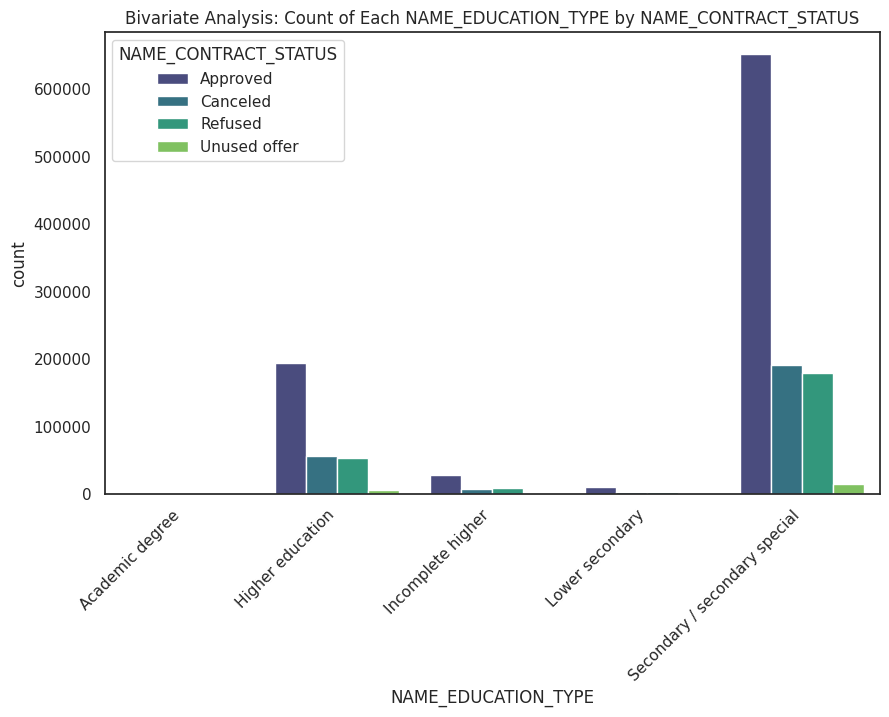

In [ ]:
# Barplot: Count of each 'NAME_EDUCATION_TYPE' category for different 'NAME_CONTRACT_STATUS' categories

plt.figure(figsize=(10, 6))
sns.countplot(x='NAME_EDUCATION_TYPE', hue='NAME_CONTRACT_STATUS', data=merged_df, palette='viridis')
plt.title('Bivariate Analysis: Count of Each NAME_EDUCATION_TYPE by NAME_CONTRACT_STATUS')
plt.xticks(rotation=45, ha='right')
plt.show()

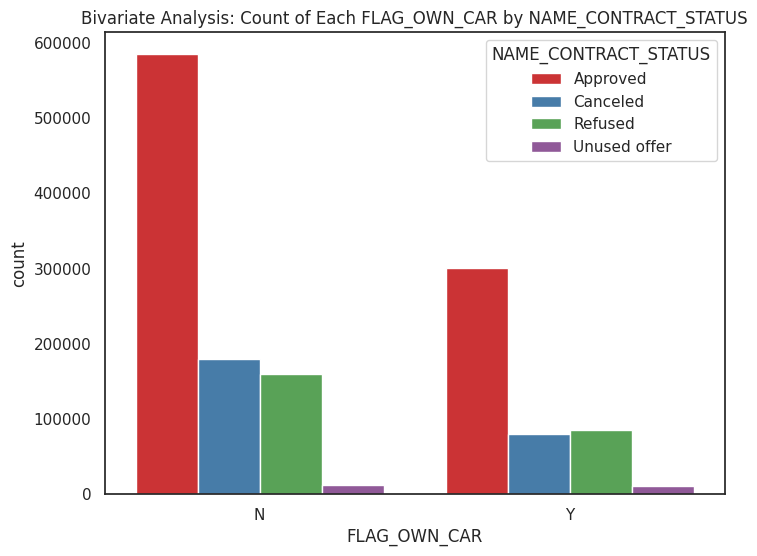

In [ ]:
# Barplot: Count of each 'FLAG_OWN_CAR' category for different 'NAME_CONTRACT_STATUS' categories

plt.figure(figsize=(8, 6))
sns.countplot(x='FLAG_OWN_CAR', hue='NAME_CONTRACT_STATUS', data=merged_df, palette='Set1')
plt.title('Bivariate Analysis: Count of Each FLAG_OWN_CAR by NAME_CONTRACT_STATUS')
plt.show()

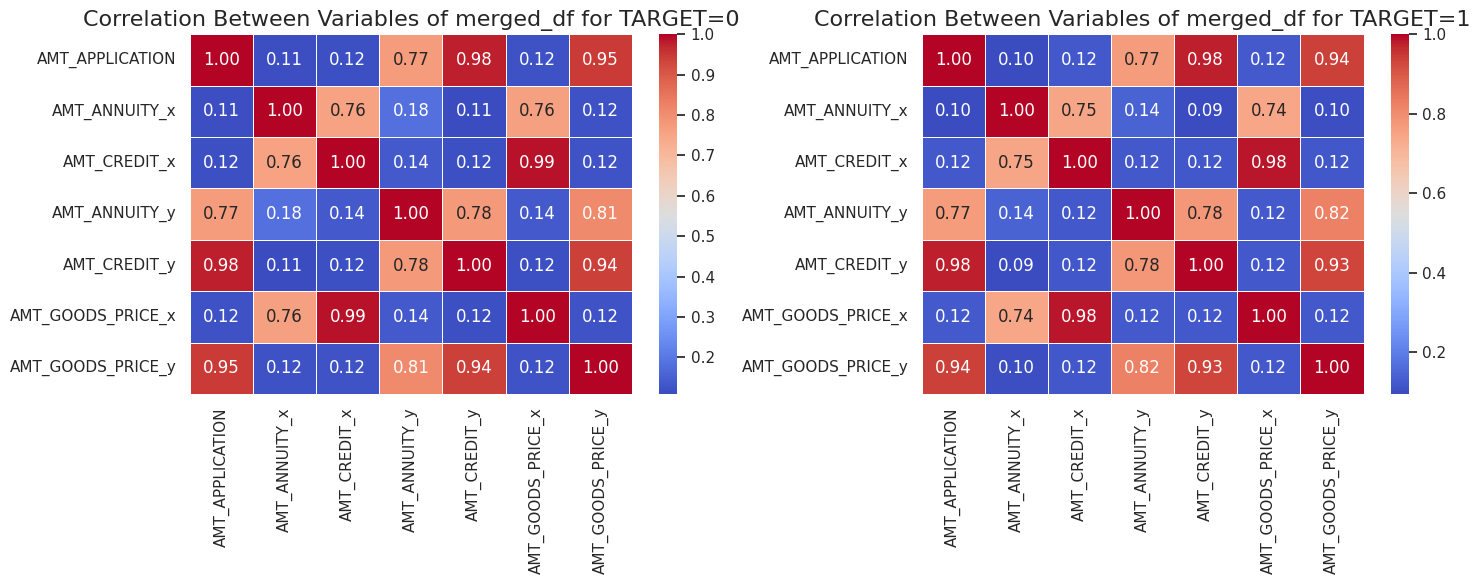

In [ ]:
#Heatmap of selected variables

variables = ['AMT_APPLICATION', 'AMT_ANNUITY_x', 'AMT_CREDIT_x', 'AMT_ANNUITY_y', 'AMT_CREDIT_y' , 'AMT_GOODS_PRICE_x', 'AMT_GOODS_PRICE_y']

correlation_target0 = merged_df[merged_df['TARGET'] == 0][variables]
correlation_target1 = merged_df[merged_df['TARGET'] == 1][variables]

correlation_matrix_target0 = correlation_target0.corr()
correlation_matrix_target1 = correlation_target1.corr()


plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1)
sns.heatmap(correlation_matrix_target0, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Between Variables of merged_df for TARGET=0', fontsize=16)

plt.subplot(1, 2, 2)
sns.heatmap(correlation_matrix_target1, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Between Variables of merged_df for TARGET=1', fontsize=16)

plt.tight_layout()
plt.show()